In [316]:
# Importing the libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
# Wordcloud
from wordcloud import WordCloud
import seaborn as sns 
sns.set_theme(style="whitegrid")
sns.dark_palette((20, 60, 50), input="husl")
# import interactive libraries
import ipywidgets
# library to create sankey charts.
from pySankey.sankey import sankey 
# Library to ignore warning 
import warnings                     # enable this once the code is finalized.
warnings.filterwarnings("ignore")
# Os library is imported to work with files 
import os 

### IMPORTING DATA

- Here we are importing the data about the donors and recivers. 

- I am Considering the donor data as sponsor and receiver data as recipient.

- we have collected the bank data from the website only few  branches of  Sbi have the authority to issue the bonds and encashment of bonds.

In [317]:
# Importing donors data as a dataframe: 
sponsor_data = pd.read_csv("RawData/donor_data.csv")

In [318]:
# Importing reciver data as a data frame:
recipient_data = pd.read_csv("RawData/receiver_data.csv")

In [319]:
# Importing bank details.
sbi_bankdata = pd.read_excel("RawData/bank_data.xlsx")

In [320]:
sbi_bankdata.head(2)

Sl. No.                           State  \
0        1                           Delhi   
1        2  Haryana, Punjab and Chandigarh   

                        Name Of The Branch & Address  Branch Code No.  \
0  New Delhi Main Branch,11, Parliament Street, N...              691   
1  Chandigarh Main Branch,SCO 43-48, Banking Squa...              628   

  Branch City  
0   New Delhi  
1  Chandigarh

In [321]:
sbi_bankdata.columns

Index(['Sl. No.', 'State', 'Name Of The Branch & Address', 'Branch Code No.',
       'Branch City'],
      dtype='object')

In [322]:
sbi_bankdata.shape

(29, 5)

In [323]:
sbi_bankdata.rename(columns={'Branch Code No.':'Branch code'},inplace=True,)

### BANK DATA
- I am removing the address from bank data, further to join the data precisely 

In [324]:
sbi_bankdata.drop(['Name Of The Branch & Address','Sl. No.'], axis=1,inplace=True,)

In [325]:
sbi_bankdata.head(2)

State  Branch code Branch City
0                           Delhi          691   New Delhi
1  Haryana, Punjab and Chandigarh          628  Chandigarh

In [326]:
# removing the spaces from the columns ..aranging in the order
sbi_bankdata['State'] = sbi_bankdata['State'].str.strip()
sbi_bankdata['Branch City'] = sbi_bankdata['Branch City'].str.strip()

### SPONSOR DATA

In [327]:
sponsor_data.head(2)

SNo           Urn JournalDate PurchaseDate ExpiryDate            Purchaser  \
0    1  1.201900e+18   4/12/2019    4/12/2019  4/26/2019  A B C INDIA LIMITED   
1    2  1.201900e+18   4/12/2019    4/12/2019  4/26/2019  A B C INDIA LIMITED   

  Prefix  BondNumber  Denominations  IssueBranchCode  PayTeller  
0     TL       11448        1000000                1    5899230  
1     TL       11447        1000000                1    5899230

In [328]:
sponsor_data['Purchaser'].nunique()

1228

#### Some of the names in the purchaser columns are spelled wrongly and same company has bought bonds under different names after due diligince some of the names are changed showed like below.   

|Old Purchaser Name                                             |Replaced Purchaser Name                            |
|---------------------------------------------------------------|---------------------------------------------------|
|'AASHMAN ENERGY PRIVATE LIMITED'                               |'AASHMAN ENERGY PRIVATE LIMITED'                   |
|'AASHMAN ENERGY PVT LTD'                                       |'AASHMAN ENERGY PRIVATE LIMITED'                   |
|'ACHINTYA SOLAR POWER PRIVATE LIMITED'                         |'ACHINTYA SOLAR POWER PRIVATE LIMITED'             |
|'ACHINTYA SOLAR POWER PVT LTD'                                 |'ACHINTYA SOLAR POWER PRIVATE LIMITED'             |
|'APCO INFRATECH PRIVATE LIMITED'                               |'APCO INFRATECH PRIVATE LIMITED'                   |
|'APCO INFRATECH PRIVATE LTD'                                   |'APCO INFRATECH PRIVATE LIMITED'                   |
|'APCO INFRATECH PVT LTD FORMERLY AP'                           |'APCO INFRATECH PRIVATE LIMITED'                   |
|'ASKUS LOGISTICS PRIV'                                         |'ASKUS LOGISTICS PRIVATE LIMITED'                  |
|'ASKUS LOGISTICS PRIVATE LIMITED'                              |'ASKUS LOGISTICS PRIVATE LIMITED'                  |
|'ASKUS LOGISTICS PVT LTD'                                      |'ASKUS LOGISTICS PRIVATE LIMITED'                  |
|'AUROBINDO PHARMA LIMITED'                                     |'AUROBINDO PHARMA LIMITED'                         |
|'AUROBINDO PHARMA LTD'                                         |'AUROBINDO PHARMA LIMITED'                         |
|'AVEES TRADING & FINANCE PVT LTD'                              |'AVEES TRADING AND FINANCE PVT LTD'                |
|'AVEES TRADING AND FINANCE PVT LTD'                            |'AVEES TRADING AND FINANCE PVT LTD'                |
|'AVEES TRADING FINANCE PVT LTD'                                |'AVEES TRADING AND FINANCE PVT LTD'                |
|'BALU IRON & STEEL COMPANY'                                    |'BALU IRON AND STEEL COMPANY'                      |
|'BALU IRON AND STEEL COMPANY'                                  |'BALU IRON AND STEEL COMPANY'                      |
|'BESSEGGEN INFOTECH LLP'                                       |'BESSEGGEN INFOTECH LLP'                           |
|'BESSEGGENINFOTECHLLP'                                         |'BESSEGGEN INFOTECH LLP'                           |
|'BHARTI AIRTEL LIMITED'                                        |'BHARTI AIRTEL LIMITED'                            |
|'BHARTI AIRTEL LIMITEDAIRTEL CURRE NT AC-GCO'                  |'BHARTI AIRTEL LIMITED'                            |
|'CASTAMET WORKS'                                               |'CASTAMET WORKS PRIVATE LIMITED'                   |
|'CASTAMET WORKS PRIVATE LIMITED'                               |'CASTAMET WORKS PRIVATE LIMITED'                   |
|'CHOWGLE AND COMPANY PVT LTD'                                  |'CHOWGULE AND COMPANY PVT LTD'                     |
|'CHOWGULE AND COMPANY PVT LTD'                                 |'CHOWGULE AND COMPANY PVT LTD'                     |
|'CIPLA LIMITED'                                                |'CIPLA LIMITED'                                    |
|'CIPLA LTD'                                                    |'CIPLA LIMITED'                                    |
|'COMFORT TRIMS PRIVATE LIMITED'                                |'COMFORT TRIMS PRIVATE LIMITED'                    |
|'COMFORT TRIMS PRIVATE LIMITED DIVIS'                          |'COMFORT TRIMS PRIVATE LIMITED'                    |
|'CROCHET TRADE AND INVESTMENT PVT L'                           |'CROCHET TRADE AND INVESTMENT PVT '                |
|'CROCHET TRADE AND INVESTMENT PVT LT'                          |'CROCHET TRADE AND INVESTMENT PVT '                |
|'D S ENGINEERING WORKS LLP'                                    |'D S ENGINEERING WORKSHOP LLP'                     |
|'D S ENGINEERING WORKSHOP LLP'                                 |'D S ENGINEERING WORKSHOP LLP'                     |
|'DASAMI LAB PRIVATE LIMITED (FORMERLY HEL IUS LAB PVT LTD)'    |'DASAMI LAB PRIVATE LTD'                           |
|'DASAMI LAB PRIVATE LTD'                                       |'DASAMI LAB PRIVATE LTD'                           |
|'DCM SHRIRAM LIMITED'                                          |'DCM SHRIRAM LIMITED'                              |
|'DCM SHRIRAM LTD'                                              |'DCM SHRIRAM LIMITED'                              |
|'DEMPO IND PVT LTD NAVHIND PAPERSAND PUB'                      |'DEMPO INDUSTRIES PVT LTD'                         |
|'DEMPO INDUSTRIES PVT LTD'                                     |'DEMPO INDUSTRIES PVT LTD'                         |
|'DERIVE TRADING AND RESORTS PRIVATE LIMIT'                     |'DERIVE TRADING AND RESORTS PRIVATE LIMITED'       |
|'DERIVE TRADING AND RESORTS PRIVATE LIMITED'                   |'DERIVE TRADING AND RESORTS PRIVATE LIMITED'       |
|'DIVYESH POWER PRIVATE LIMITED'                                |'DIVYESH POWER PRIVATE LIMITED'                    |
|'DIVYESH POWER PVT LTD'                                        |'DIVYESH POWER PRIVATE LIMITED'                    |
|'DR REDDYS LABORATORIES LIMITED'                               |'DR REDDYS LABORATORIES LIMITED'                   |
|'DR.REDDY'S LABORATORIES LTD'                                  |'DR REDDYS LABORATORIES LIMITED'                   |
|'ELENA RENEWABLE ENERGY PRIVATE LIMITED'                       |'ELENA RENEWABLE ENERGY PRIVATE LIMITED'           |
|'ELENA RENEWABLE ENERGY PVT LTD'                               |'ELENA RENEWABLE ENERGY PRIVATE LIMITED'           |
|'FUTURE GAMING AND HOTEL SERVICES PR'                          |'FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED' |
|'FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED'             |'FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED' |
|'FUTURE GAMING AND HOTEL SERVICES PVT LTD'                     |'FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED' |
|'GENUS POWER'                                                  |'GENUS POWER INFRASTRUCTURES LIMITED'              |
|'GENUS POWER INFRASTRUCTURES LIMITED'                          |'GENUS POWER INFRASTRUCTURES LIMITED'              |
|'GENUS POWER INFRASTRUCTURES LTD'                              |'GENUS POWER INFRASTRUCTURES LIMITED'              |
|'GOODLUCK INDIA LIMITED'                                       |'GOODLUCK INDIA LIMITED'                           |
|'GOODLUCK INDIA LTD'                                           |'GOODLUCK INDIA LIMITED'                           |
|'HINDYS LAB PRIVATE LTD'                                       |'HINDYS LAB PRIVATE LTD'                           |
|'HINDYS LAB PVT. LTD. (PREVIOUSLY HIND LI FE SCIENCES PVT LTD)'|'HINDYS LAB PRIVATE LTD'                           |
|'HONOUR LAB LIMITED'                                           |'HONOUR LAB LIMITED'                               |
|'HONOUR LAB LTD'                                               |'HONOUR LAB LIMITED'                               |
|'INORBIT MALLS INDIA PRIVATE LIMIT'                            |'INORBIT MALLS INDIA PRIVATE LIMITED'              |
|'INORBIT MALLS INDIA PRIVATE LIMITED'                          |'INORBIT MALLS INDIA PRIVATE LIMITED'              |
|'INTERGLOBE AIR TRANSPORT LIMITED'                             |'INTERGLOBE AIR TRANSPORT LIMITED'                 |
|'INTERGLOBE AVIATION LIMITED'                                  |'INTERGLOBE AIR TRANSPORT LIMITED'                 |
|'J K CEMENT LIMITED'                                           |'J K CEMENT LIMITED'                               |
|'J K CEMENT LTD.'                                              |'J K CEMENT LIMITED'                               |
|'J.K.CEMENT LTD.'                                              |'J K CEMENT LIMITED'                               |
|'JAI SUSPENSION SYSTEMS L L P'                                 |'JAI SUSPENSION SYSTEMS LLP'                       |
|'JAI SUSPENSION SYSTEMS LLP'                                   |'JAI SUSPENSION SYSTEMS LLP'                       |
|'LAXMI INDUSTRIAL BOTTLING PLAN'                               |'LAXMI INDUSTRIAL BOTTLING PLANT'                  |
|'LAXMI INDUSTRIAL BOTTLING PLANT'                              |'LAXMI INDUSTRIAL BOTTLING PLANT'                  |
|'MADHYA PRADESH WASTE MANAGEMENT PR'                           |'MADHYA PRADESH WASTE MANAGEMENT'                  |
|'MADHYA PRADESH WASTE MANAGEMENT PRI'                          |'MADHYA PRADESH WASTE MANAGEMENT'                  |
|'MEGHA ENGINEERING & INFRASTRUCTURES LIMITED'                  |'MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED'    |
|'MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED'               |'MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED'    |
|'MEGHA ENGINEERING AND INFRASTRUCTURES LTD'                    |'MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED'    |
|'MICRO LABS LIMITED'                                           |'MICRO LABS LIMITED'                               |
|'MICRO LABS LTD'                                               |'MICRO LABS LIMITED'                               |
|'MKK METAL SECTIONS P LTD'                                     |'MKK METAL SECTIONS PVT LTD'                       |
|'MKK METAL SECTIONS PVT LTD'                                   |'MKK METAL SECTIONS PVT LTD'                       |
|'MODERN ROAD MAKERS PVT LTD'                                   |'MODERN ROAD MAKERS PVT LTD'                       |
|'MODERN ROAD MAKERS PVT. LTD.'                                 |'MODERN ROAD MAKERS PVT LTD'                       |
|'MOHIT MINERALS LIMITED'                                       |'MOHIT MINERALS LIMITED'                           |
|'MOHIT MINERALS LTD'                                           |'MOHIT MINERALS LIMITED'                           |
|'MY HOME INFRASTRUCTURES PRIVATE LI'                           |'MY HOME INFRASTRUCTURES PVT LTD '                 |
|'MY HOME INFRASTRUCTURES PVT LTD MY'                           |'MY HOME INFRASTRUCTURES PVT LTD '                 |
|'MYTRAH ENERGY INDIA PRIVATE LIMITED'                          |'MYTRAH ENERGY INDIA PRIVATE LIMITED'              |
|'MYTRAH ENERGY(INDIA) PRIVATE LIMITED'                         |'MYTRAH ENERGY INDIA PRIVATE LIMITED'              |
|'NATCO PHARMA LIMITED'                                         |'NATCO PHARMA LIMITED'                             |
|'NATCO PHARMA LTD'                                             |'NATCO PHARMA LIMITED'                             |
|'NAVAYUGA ENGINEERING CO LTD'                                  |'NAVAYUGA ENGINEERING COMPANY LIMITED'             |
|'NAVAYUGA ENGINEERING COMPANY LIMITED'                         |'NAVAYUGA ENGINEERING COMPANY LIMITED'             |
|'NSL SEZ HYDERABAD PRIVATE LIMITED'                            |'NSL SEZ HYDERABAD PRIVATE LIMITED'                |
|'NSL SEZ(HYDERABAD) PRIVATE LIMITED'                           |'NSL SEZ HYDERABAD PRIVATE LIMITED'                |
|'NUVOCO VISTAS CORP. LTD'                                      |'NUVOCO VISTAS CORP LTD'                           |
|'NUVOCO VISTAS CORPORATION LTD'                                |'NUVOCO VISTAS CORP LTD'                           |
|'ORISSA METALIKS PVT LIMITED'                                  |'ORISSA METALIKS PRIVATE LIMITED'                  |
|'ORRISA METALIKS PVT LTD'                                      |'ORISSA METALIKS PRIVATE LIMITED'                  |
|'PALM SHELTER ESTATE DEVELOPMENT LL'                           |'PALM SHELTER ESTATE DEVELOPMENT LLP'              |
|'PALM SHELTER ESTATE DEVELOPMENT LLP'                          |'PALM SHELTER ESTATE DEVELOPMENT LLP'              |
|'PENGUIN TRADING & AGENCIES LIMITED'                           |'PENGUIN TRADING AND AGENCIES LIMITED'             |
|'PENGUIN TRADING AND AGENCIES LTD'                             |'PENGUIN TRADING AND AGENCIES LIMITED'             |
|'PHILIPS CARBON BLACK LTD'                                     |'PHILLIPS CARBON BLACK LIMITED'                    |
|'PHILLIPS CARBON BLACK LIMITED'                                |'PHILLIPS CARBON BLACK LIMITED'                    |
|'PLUTO FINANCE PRIVATE LTD'                                    |'PLUTO FINANCE PRIVATE LIMITED'                    |
|'PLUTO FINANCE PRIVATE LTD.'                                   |'PLUTO FINANCE PRIVATE LIMITED'                    |
|'PRARAMBH SECURITIES PVT LTDOWN A/C'                           |'PRARAMBH SECURITIES PVT LTD'                      |
|'PRARAMBH SECURITIES PVT LTDPROPRIET'                          |'PRARAMBH SECURITIES PVT LTD'                      |
|'PROCURE ADVISORY SERVICES PRIVATE L'                          |'PROCURE ADVISORY SERVICES PRIVATE LTD'            |
|'PROCURE ADVISORY SERVICES PRIVATE LTD'                        |'PROCURE ADVISORY SERVICES PRIVATE LTD'            |
|'R.S.BROTHERS RETAIL INDIA PRIVATE LIMITE D'                   |'R.S.BROTHERS RETAIL INDIA PRIVATE LIMITED'        |
|'R.S.BROTHERS RETIAL INDIA PVT LTD'                            |'R.S.BROTHERS RETAIL INDIA PRIVATE LIMITED'        |
|'RAMESH AGARWAL C S BOTTLING PL'                               |'RAMESH AGARWAL C S BOTTLING PLANT'                |
|'RAMESH AGARWAL C S BOTTLING PLANT'                            |'RAMESH AGARWAL C S BOTTLING PLANT'                |
|'RANISATI MERCANTILES PVT LTD'                                 |'RANISATI MERCANTILES PVT LTD'                     |
|'RANISATI MERCANTILES PVT. LTD.'                               |'RANISATI MERCANTILES PVT LTD'                     |
|'RIPLEY & CO STEVDORING & HANDLING PVT LT D'                   |'RIPLEY AND CO STEVEDORING AND HANDLING PVT LTD'   |
|'RIPLEY AND CO. STEVEDORING & HANDLING PVT LTD'                |'RIPLEY AND CO STEVEDORING AND HANDLING PVT LTD'   |
|'ROSHNI DEALMARK PRIVATE LIMITED'                              |'ROSHNI DEALMARK PRIVATE LIMITED'                  |
|'ROSHNI DEALMARK PRIVATE LTD'                                  |'ROSHNI DEALMARK PRIVATE LIMITED'                  |
|'S K TRADERS'                                                  |'S K TRADING CO.'                                  |
|'S K TRADING CO.'                                              |'S K TRADING CO.'                                  |
|'SELMAR LAB PRIVATE LIMITED'                                   |'SELMAR LAB PRIVATE LIMITED'                       |
|'SELMAR LAB PRIVATE LTD'                                       |'SELMAR LAB PRIVATE LIMITED'                       |
|'SENGUPTA AND SENGUPTA PRIVATE LIMIT'                          |'SENGUPTA AND SENGUPTA PRIVATE LIMIT'              |
|'SENGUPTA AND SENGUPTA PVT LTD'                                |'SENGUPTA AND SENGUPTA PRIVATE LIMIT'              |
|'SHREE CEMENT LIMITED'                                         |'SHREE CEMENT LIMITED'                             |
|'SHREE CEMENT LTD'                                             |'SHREE CEMENT LIMITED'                             |
|'SKEIRON RENEWABLE ENERGY AMIDYALA P'                          |'SKEIRON RENEWABLE ENERGY AMIDYALA PRIVATE LIMITED'|
|'SKEIRON RENEWABLE ENERGY AMIDYALA PRIVATE LIMITED'            |'SKEIRON RENEWABLE ENERGY AMIDYALA PRIVATE LIMITED'|
|'SOM DISTILERIES PRIVATE LTD'                                  |'SOM DISTILLERIES PVT LTD'                         |
|'SOM DISTILLERIES BREWERIES LIMITED'                           |'SOM DISTILLERIES PVT LTD'                         |
|'SOM DISTILLERIES PVT LTD'                                     |'SOM DISTILLERIES PVT LTD'                         |
|'SPECO INFRASTRUCTURE'                                         |'SPECO INFRASTRUCTURES'                            |
|'SPECO INFRASTRUCTURES'                                        |'SPECO INFRASTRUCTURES'                            |
|'SRI SIDDHARTH INFRATECH & SERVICES(I) PVT LTD'                |'SRI SIDDHARTH INFRATECH AND SERVICES PVT LTD'     |
|'SRI SIDDHARTH INFRATECH AND SERVICES I P'                     |'SRI SIDDHARTH INFRATECH AND SERVICES PVT LTD'     |
|'SUN PHARMA LABORATORIES LIMTED'                               |'SUN PHARMA LABORATORIES LIMTED'                   |
|'SUN PHARMA LABORATORIES LTD'                                  |'SUN PHARMA LABORATORIES LIMTED'                   |
|'THRIVENI EARTH MOVERS PVT LTD'                                |'THRIVENI EARTH MOVERS PVT LTD'                    |
|'THRIVENI EARTHMOVERS PVT LTD'                                 |'THRIVENI EARTH MOVERS PVT LTD'                    |
|'TORRENT PHARMACEUTICALS LIMITED'                              |'TORRENT PHARMACEUTICALS LIMITED'                  |
|'TORRENT PHARMACEUTICALS LTD'                                  |'TORRENT PHARMACEUTICALS LIMITED'                  |
|'TORRENT POWER LIMITED'                                        |'TORRENT POWER LIMITED'                            |
|'TORRENT POWER LTD'                                            |'TORRENT POWER LIMITED'                            |
|'TRANSWAYS EXIM PRIVATE LIMITED'                               |'TRANSWAYS EXIM PRIVATE LIMITED'                   |
|'TRANSWAYS EXIM PRIVATE LTD'                                   |'TRANSWAYS EXIM PRIVATE LIMITED'                   |
|'TRANSWAYS EXIM PVT LTD'                                       |'TRANSWAYS EXIM PRIVATE LIMITED'                   |
|'TRIDENT LIMITED'                                              |'TRIDENT LIMITED'                                  |
|'TRIDENT LIMITED {FORMERLY ABHISHEK INDUS TRIES LIMITED}'      |'TRIDENT LIMITED'                                  |
|'ULTRA TECH CEMENT LIMITED'                                    |'ULTRA TECH CEMENT LIMITED'                        |
|'ULTRATECHCEMENTSLTD'                                          |'ULTRA TECH CEMENT LIMITED'                        |
|'UTKAL ALUMINA INTERNATIONAL LIMITED'                          |'UTKAL ALUMINA INTERNATIONAL LIMITED'              |
|'UTKAL ALUMINA INTERNATIONAL LTD'                              |'UTKAL ALUMINA INTERNATIONAL LIMITED'              |
|'VARAS INTERNATIONAL PRIVATE LIMITED'                          |'VARAS INTERNATIONAL PRIVATE LIMITED'              |
|'VARAS INTERNATIONAL PVT LTD'                                  |'VARAS INTERNATIONAL PRIVATE LIMITED'              |
|'VARDHMAN TEXTILES LIMITED'                                    |'VARDHMAN TEXTILES LIMITED'                        |
|'VARDHMAN TEXTILES LTD'                                        |'VARDHMAN TEXTILES LIMITED'                        |
|'VEDANTA LIMITED'                                              |'VEDANTA LIMITED'                                  |
|'VEDANTA LTD'                                                  |'VEDANTA LIMITED'                                  |
|'WARORA CHANDRAPUR BALLARPUR TOLLRO'                           |'WARORA CHANDRAPUR BALLARPUR TOLL ROAD'            |
|'WARORA CHANDRAPUR BALLARPUR TOLLROA'                          |'WARORA CHANDRAPUR BALLARPUR TOLL ROAD'            |
|'WELSPUN CORP LIMITED'                                         |'WELSPUN CORP LIMITED'                             |
|'WELSPUN CORP LTD'                                             |'WELSPUN CORP LIMITED'                             |
|'ZUVAN ENERGY PRIVATE LIMITED'                                 |'ZUVAN ENERGY PRIVATE LIMITED'                     |
|'ZUVAN ENERGY PVT LTD'                                         |'ZUVAN ENERGY PRIVATE LIMITED'                     |
|'GREENKO RAYALA WIND POWER PVT LTD'                            |'GREENKO RAYALA WIND POWER PRIVATE LIMITED'        |
|'GREENKO RAYALA WIND POWER PRIVATE LIMITE D'                   |'GREENKO RAYALA WIND POWER PRIVATE LIMITED'        |

In [329]:
# replacing the purchaser names 
sponsor_data['Purchaser'].replace('AASHMAN ENERGY PRIVATE LIMITED','AASHMAN ENERGY PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('AASHMAN ENERGY PVT LTD','AASHMAN ENERGY PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('ACHINTYA SOLAR POWER PRIVATE LIMITED','ACHINTYA SOLAR POWER PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('ACHINTYA SOLAR POWER PVT LTD','ACHINTYA SOLAR POWER PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('APCO INFRATECH PRIVATE LIMITED','APCO INFRATECH PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('APCO INFRATECH PRIVATE LTD','APCO INFRATECH PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('APCO INFRATECH PVT LTD FORMERLY AP','APCO INFRATECH PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('ASKUS LOGISTICS PRIV','ASKUS LOGISTICS PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('ASKUS LOGISTICS PRIVATE LIMITED','ASKUS LOGISTICS PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('ASKUS LOGISTICS PVT LTD','ASKUS LOGISTICS PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('AUROBINDO PHARMA LIMITED','AUROBINDO PHARMA LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('AUROBINDO PHARMA LTD','AUROBINDO PHARMA LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('AVEES TRADING & FINANCE PVT LTD','AVEES TRADING AND FINANCE PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('AVEES TRADING AND FINANCE PVT LTD','AVEES TRADING AND FINANCE PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('AVEES TRADING FINANCE PVT LTD','AVEES TRADING AND FINANCE PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('BALU IRON & STEEL COMPANY','BALU IRON AND STEEL COMPANY',inplace=True)
sponsor_data['Purchaser'].replace('BALU IRON AND STEEL COMPANY','BALU IRON AND STEEL COMPANY',inplace=True)
sponsor_data['Purchaser'].replace('BESSEGGEN INFOTECH LLP','BESSEGGEN INFOTECH LLP',inplace=True)
sponsor_data['Purchaser'].replace('BESSEGGENINFOTECHLLP','BESSEGGEN INFOTECH LLP',inplace=True)
sponsor_data['Purchaser'].replace('BHARTI AIRTEL LIMITED','BHARTI AIRTEL LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('BHARTI AIRTEL LIMITEDAIRTEL CURRE NT AC-GCO','BHARTI AIRTEL LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('CASTAMET WORKS','CASTAMET WORKS PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('CASTAMET WORKS PRIVATE LIMITED','CASTAMET WORKS PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('CHOWGLE AND COMPANY PVT LTD','CHOWGULE AND COMPANY PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('CHOWGULE AND COMPANY PVT LTD','CHOWGULE AND COMPANY PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('CIPLA LIMITED','CIPLA LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('CIPLA LTD','CIPLA LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('COMFORT TRIMS PRIVATE LIMITED','COMFORT TRIMS PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('COMFORT TRIMS PRIVATE LIMITED DIVIS','COMFORT TRIMS PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('CROCHET TRADE AND INVESTMENT PVT L','CROCHET TRADE AND INVESTMENT PVT ',inplace=True)
sponsor_data['Purchaser'].replace('CROCHET TRADE AND INVESTMENT PVT LT','CROCHET TRADE AND INVESTMENT PVT ',inplace=True)
sponsor_data['Purchaser'].replace('D S ENGINEERING WORKS LLP','D S ENGINEERING WORKSHOP LLP',inplace=True)
sponsor_data['Purchaser'].replace('D S ENGINEERING WORKSHOP LLP','D S ENGINEERING WORKSHOP LLP',inplace=True)
sponsor_data['Purchaser'].replace('DASAMI LAB PRIVATE LIMITED (FORMERLY HEL IUS LAB PVT LTD)','DASAMI LAB PRIVATE LTD',inplace=True)
sponsor_data['Purchaser'].replace('DASAMI LAB PRIVATE LTD','DASAMI LAB PRIVATE LTD',inplace=True)
sponsor_data['Purchaser'].replace('DCM SHRIRAM LIMITED','DCM SHRIRAM LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('DCM SHRIRAM LTD','DCM SHRIRAM LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('DEMPO IND PVT LTD NAVHIND PAPERSAND PUB','DEMPO INDUSTRIES PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('DEMPO INDUSTRIES PVT LTD','DEMPO INDUSTRIES PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('DERIVE TRADING AND RESORTS PRIVATE LIMIT','DERIVE TRADING AND RESORTS PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('DERIVE TRADING AND RESORTS PRIVATE LIMITED','DERIVE TRADING AND RESORTS PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('DIVYESH POWER PRIVATE LIMITED','DIVYESH POWER PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('DIVYESH POWER PVT LTD','DIVYESH POWER PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('DR REDDYS LABORATORIES LIMITED','DR REDDYS LABORATORIES LIMITED',inplace=True)
sponsor_data['Purchaser'].replace("DR.REDDY'S LABORATORIES LTD",'DR REDDYS LABORATORIES LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('ELENA RENEWABLE ENERGY PRIVATE LIMITED','ELENA RENEWABLE ENERGY PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('ELENA RENEWABLE ENERGY PVT LTD','ELENA RENEWABLE ENERGY PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('FUTURE GAMING AND HOTEL SERVICES PR','FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED','FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('FUTURE GAMING AND HOTEL SERVICES PVT LTD','FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('GENUS POWER','GENUS POWER INFRASTRUCTURES LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('GENUS POWER INFRASTRUCTURES LIMITED','GENUS POWER INFRASTRUCTURES LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('GENUS POWER INFRASTRUCTURES LTD','GENUS POWER INFRASTRUCTURES LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('GOODLUCK INDIA LIMITED','GOODLUCK INDIA LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('GOODLUCK INDIA LTD','GOODLUCK INDIA LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('HINDYS LAB PRIVATE LTD','HINDYS LAB PRIVATE LTD',inplace=True)
sponsor_data['Purchaser'].replace('HINDYS LAB PVT. LTD. (PREVIOUSLY HIND LI FE SCIENCES PVT LTD)','HINDYS LAB PRIVATE LTD',inplace=True)
sponsor_data['Purchaser'].replace('HONOUR LAB LIMITED','HONOUR LAB LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('HONOUR LAB LTD','HONOUR LAB LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('INORBIT MALLS INDIA PRIVATE LIMIT','INORBIT MALLS INDIA PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('INORBIT MALLS INDIA PRIVATE LIMITED','INORBIT MALLS INDIA PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('INTERGLOBE AIR TRANSPORT LIMITED','INTERGLOBE AIR TRANSPORT LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('INTERGLOBE AVIATION LIMITED','INTERGLOBE AIR TRANSPORT LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('J K CEMENT LIMITED','J K CEMENT LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('J K CEMENT LTD.','J K CEMENT LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('J.K.CEMENT LTD.','J K CEMENT LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('JAI SUSPENSION SYSTEMS L L P','JAI SUSPENSION SYSTEMS LLP',inplace=True)
sponsor_data['Purchaser'].replace('JAI SUSPENSION SYSTEMS LLP','JAI SUSPENSION SYSTEMS LLP',inplace=True)
sponsor_data['Purchaser'].replace('LAXMI INDUSTRIAL BOTTLING PLAN','LAXMI INDUSTRIAL BOTTLING PLANT',inplace=True)
sponsor_data['Purchaser'].replace('LAXMI INDUSTRIAL BOTTLING PLANT','LAXMI INDUSTRIAL BOTTLING PLANT',inplace=True)
sponsor_data['Purchaser'].replace('MADHYA PRADESH WASTE MANAGEMENT PR','MADHYA PRADESH WASTE MANAGEMENT',inplace=True)
sponsor_data['Purchaser'].replace('MADHYA PRADESH WASTE MANAGEMENT PRI','MADHYA PRADESH WASTE MANAGEMENT',inplace=True)
sponsor_data['Purchaser'].replace('MEGHA ENGINEERING & INFRASTRUCTURES LIMITED','MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED','MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('MEGHA ENGINEERING AND INFRASTRUCTURES LTD','MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('MICRO LABS LIMITED','MICRO LABS LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('MICRO LABS LTD','MICRO LABS LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('MKK METAL SECTIONS P LTD','MKK METAL SECTIONS PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('MKK METAL SECTIONS PVT LTD','MKK METAL SECTIONS PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('MODERN ROAD MAKERS PVT LTD','MODERN ROAD MAKERS PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('MODERN ROAD MAKERS PVT. LTD.','MODERN ROAD MAKERS PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('MOHIT MINERALS LIMITED','MOHIT MINERALS LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('MOHIT MINERALS LTD','MOHIT MINERALS LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('MY HOME INFRASTRUCTURES PRIVATE LI','MY HOME INFRASTRUCTURES PVT LTD ',inplace=True)
sponsor_data['Purchaser'].replace('MY HOME INFRASTRUCTURES PVT LTD MY','MY HOME INFRASTRUCTURES PVT LTD ',inplace=True)
sponsor_data['Purchaser'].replace('MYTRAH ENERGY INDIA PRIVATE LIMITED','MYTRAH ENERGY INDIA PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('MYTRAH ENERGY(INDIA) PRIVATE LIMITED','MYTRAH ENERGY INDIA PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('NATCO PHARMA LIMITED','NATCO PHARMA LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('NATCO PHARMA LTD','NATCO PHARMA LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('NAVAYUGA ENGINEERING CO LTD','NAVAYUGA ENGINEERING COMPANY LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('NAVAYUGA ENGINEERING COMPANY LIMITED','NAVAYUGA ENGINEERING COMPANY LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('NSL SEZ HYDERABAD PRIVATE LIMITED','NSL SEZ HYDERABAD PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('NSL SEZ(HYDERABAD) PRIVATE LIMITED','NSL SEZ HYDERABAD PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('NUVOCO VISTAS CORP. LTD','NUVOCO VISTAS CORP LTD',inplace=True)
sponsor_data['Purchaser'].replace('NUVOCO VISTAS CORPORATION LTD','NUVOCO VISTAS CORP LTD',inplace=True)
sponsor_data['Purchaser'].replace('ORISSA METALIKS PVT LIMITED','ORISSA METALIKS PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('ORRISA METALIKS PVT LTD','ORISSA METALIKS PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('PALM SHELTER ESTATE DEVELOPMENT LL','PALM SHELTER ESTATE DEVELOPMENT LLP',inplace=True)
sponsor_data['Purchaser'].replace('PALM SHELTER ESTATE DEVELOPMENT LLP','PALM SHELTER ESTATE DEVELOPMENT LLP',inplace=True)
sponsor_data['Purchaser'].replace('PENGUIN TRADING & AGENCIES LIMITED','PENGUIN TRADING AND AGENCIES LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('PENGUIN TRADING AND AGENCIES LTD','PENGUIN TRADING AND AGENCIES LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('PHILIPS CARBON BLACK LTD','PHILLIPS CARBON BLACK LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('PHILLIPS CARBON BLACK LIMITED','PHILLIPS CARBON BLACK LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('PLUTO FINANCE PRIVATE LTD','PLUTO FINANCE PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('PLUTO FINANCE PRIVATE LTD.','PLUTO FINANCE PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('PRARAMBH SECURITIES PVT LTDOWN A/C','PRARAMBH SECURITIES PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('PRARAMBH SECURITIES PVT LTDPROPRIET','PRARAMBH SECURITIES PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('PROCURE ADVISORY SERVICES PRIVATE L','PROCURE ADVISORY SERVICES PRIVATE LTD',inplace=True)
sponsor_data['Purchaser'].replace('PROCURE ADVISORY SERVICES PRIVATE LTD','PROCURE ADVISORY SERVICES PRIVATE LTD',inplace=True)
sponsor_data['Purchaser'].replace('R.S.BROTHERS RETAIL INDIA PRIVATE LIMITE D','R.S.BROTHERS RETAIL INDIA PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('R.S.BROTHERS RETIAL INDIA PVT LTD','R.S.BROTHERS RETAIL INDIA PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('RAMESH AGARWAL C S BOTTLING PL','RAMESH AGARWAL C S BOTTLING PLANT',inplace=True)
sponsor_data['Purchaser'].replace('RAMESH AGARWAL C S BOTTLING PLANT','RAMESH AGARWAL C S BOTTLING PLANT',inplace=True)
sponsor_data['Purchaser'].replace('RANISATI MERCANTILES PVT LTD','RANISATI MERCANTILES PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('RANISATI MERCANTILES PVT. LTD.','RANISATI MERCANTILES PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('RIPLEY & CO STEVDORING & HANDLING PVT LT D','RIPLEY AND CO STEVEDORING AND HANDLING PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('RIPLEY AND CO. STEVEDORING & HANDLING PVT LTD','RIPLEY AND CO STEVEDORING AND HANDLING PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('ROSHNI DEALMARK PRIVATE LIMITED','ROSHNI DEALMARK PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('ROSHNI DEALMARK PRIVATE LTD','ROSHNI DEALMARK PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('S K TRADERS','S K TRADING CO.',inplace=True)
sponsor_data['Purchaser'].replace('S K TRADING CO.','S K TRADING CO.',inplace=True)
sponsor_data['Purchaser'].replace('SELMAR LAB PRIVATE LIMITED','SELMAR LAB PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('SELMAR LAB PRIVATE LTD','SELMAR LAB PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('SENGUPTA AND SENGUPTA PRIVATE LIMIT','SENGUPTA AND SENGUPTA PRIVATE LIMIT',inplace=True)
sponsor_data['Purchaser'].replace('SENGUPTA AND SENGUPTA PVT LTD','SENGUPTA AND SENGUPTA PRIVATE LIMIT',inplace=True)
sponsor_data['Purchaser'].replace('SHREE CEMENT LIMITED','SHREE CEMENT LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('SHREE CEMENT LTD','SHREE CEMENT LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('SKEIRON RENEWABLE ENERGY AMIDYALA P','SKEIRON RENEWABLE ENERGY AMIDYALA PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('SKEIRON RENEWABLE ENERGY AMIDYALA PRIVATE LIMITED','SKEIRON RENEWABLE ENERGY AMIDYALA PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('SOM DISTILERIES PRIVATE LTD','SOM DISTILLERIES PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('SOM DISTILLERIES BREWERIES LIMITED','SOM DISTILLERIES PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('SOM DISTILLERIES PVT LTD','SOM DISTILLERIES PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('SPECO INFRASTRUCTURE','SPECO INFRASTRUCTURES',inplace=True)
sponsor_data['Purchaser'].replace('SPECO INFRASTRUCTURES','SPECO INFRASTRUCTURES',inplace=True)
sponsor_data['Purchaser'].replace('SRI SIDDHARTH INFRATECH & SERVICES(I) PVT LTD','SRI SIDDHARTH INFRATECH AND SERVICES PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('SRI SIDDHARTH INFRATECH AND SERVICES I P','SRI SIDDHARTH INFRATECH AND SERVICES PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('SUN PHARMA LABORATORIES LIMTED','SUN PHARMA LABORATORIES LIMTED',inplace=True)
sponsor_data['Purchaser'].replace('SUN PHARMA LABORATORIES LTD','SUN PHARMA LABORATORIES LIMTED',inplace=True)
sponsor_data['Purchaser'].replace('THRIVENI EARTH MOVERS PVT LTD','THRIVENI EARTH MOVERS PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('THRIVENI EARTHMOVERS PVT LTD','THRIVENI EARTH MOVERS PVT LTD',inplace=True)
sponsor_data['Purchaser'].replace('TORRENT PHARMACEUTICALS LIMITED','TORRENT PHARMACEUTICALS LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('TORRENT PHARMACEUTICALS LTD','TORRENT PHARMACEUTICALS LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('TORRENT POWER LIMITED','TORRENT POWER LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('TORRENT POWER LTD','TORRENT POWER LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('TRANSWAYS EXIM PRIVATE LIMITED','TRANSWAYS EXIM PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('TRANSWAYS EXIM PRIVATE LTD','TRANSWAYS EXIM PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('TRANSWAYS EXIM PVT LTD','TRANSWAYS EXIM PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('TRIDENT LIMITED','TRIDENT LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('TRIDENT LIMITED {FORMERLY ABHISHEK INDUS TRIES LIMITED}','TRIDENT LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('ULTRA TECH CEMENT LIMITED','ULTRA TECH CEMENT LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('ULTRATECHCEMENTSLTD','ULTRA TECH CEMENT LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('UTKAL ALUMINA INTERNATIONAL LIMITED','UTKAL ALUMINA INTERNATIONAL LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('UTKAL ALUMINA INTERNATIONAL LTD','UTKAL ALUMINA INTERNATIONAL LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('VARAS INTERNATIONAL PRIVATE LIMITED','VARAS INTERNATIONAL PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('VARAS INTERNATIONAL PVT LTD','VARAS INTERNATIONAL PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('VARDHMAN TEXTILES LIMITED','VARDHMAN TEXTILES LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('VARDHMAN TEXTILES LTD','VARDHMAN TEXTILES LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('VEDANTA LIMITED','VEDANTA LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('VEDANTA LTD','VEDANTA LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('WARORA CHANDRAPUR BALLARPUR TOLLRO','WARORA CHANDRAPUR BALLARPUR TOLL ROAD',inplace=True)
sponsor_data['Purchaser'].replace('WARORA CHANDRAPUR BALLARPUR TOLLROA','WARORA CHANDRAPUR BALLARPUR TOLL ROAD',inplace=True)
sponsor_data['Purchaser'].replace('WELSPUN CORP LIMITED','WELSPUN CORP LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('WELSPUN CORP LTD','WELSPUN CORP LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('ZUVAN ENERGY PRIVATE LIMITED','ZUVAN ENERGY PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('ZUVAN ENERGY PVT LTD','ZUVAN ENERGY PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('GREENKO RAYALA WIND POWER PRIVATE LIMITE D','GREENKO RAYALA WIND POWER PRIVATE LIMITED',inplace=True)
sponsor_data['Purchaser'].replace('GREENKO RAYALA WIND POWER PVT LTD','GREENKO RAYALA WIND POWER PRIVATE LIMITED',inplace=True)


In [330]:
sponsor_data.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'Denominations', 'IssueBranchCode',
       'PayTeller'],
      dtype='object')

In [331]:
sponsor_data.shape

(18871, 11)

In [332]:
sponsor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              18871 non-null  int64  
 1   Urn              18871 non-null  float64
 2   JournalDate      18871 non-null  object 
 3   PurchaseDate     18871 non-null  object 
 4   ExpiryDate       18871 non-null  object 
 5   Purchaser        18871 non-null  object 
 6   Prefix           18871 non-null  object 
 7   BondNumber       18871 non-null  int64  
 8   Denominations    18871 non-null  int64  
 9   IssueBranchCode  18871 non-null  int64  
 10  PayTeller        18871 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 1.6+ MB


In [333]:
# Changing the data type of required columns
sponsor_data['ExpiryDate'] = pd.to_datetime(sponsor_data['ExpiryDate'])
sponsor_data['JournalDate'] = pd.to_datetime(sponsor_data['JournalDate'])
sponsor_data['PurchaseDate'] = pd.to_datetime(sponsor_data['PurchaseDate'])

In [334]:
# Striping purchaser column --> cleaning the columns
sponsor_data['Purchaser'] = sponsor_data['Purchaser'].str.strip()

In [335]:
# Rename the columns to decrease the confusion on the columns names
sponsor_data.rename(columns={'PayTeller':'IssueTeller'})

SNo           Urn JournalDate PurchaseDate ExpiryDate  \
0          1  1.201900e+18  2019-04-12   2019-04-12 2019-04-26   
1          2  1.201900e+18  2019-04-12   2019-04-12 2019-04-26   
2          3  1.201900e+18  2019-04-12   2019-04-12 2019-04-26   
3          4  1.201900e+18  2019-04-12   2019-04-12 2019-04-26   
4          5  1.201900e+18  2019-04-12   2019-04-12 2019-04-26   
...      ...           ...         ...          ...        ...   
18866  18867  1.202400e+18  2024-01-11   2024-01-11 2024-01-25   
18867  18868  1.202400e+18  2024-01-11   2024-01-11 2024-01-25   
18868  18869  1.202400e+18  2024-01-11   2024-01-11 2024-01-25   
18869  18870  1.202400e+18  2024-01-11   2024-01-11 2024-01-25   
18870  18871  1.202400e+18  2024-01-11   2024-01-11 2024-01-25   

                            Purchaser Prefix  BondNumber  Denominations  \
0                 A B C INDIA LIMITED     TL       11448        1000000   
1                 A B C INDIA LIMITED     TL       11447        1000000   
2                 A B C INDIA LIMITED     TL       11441        1000000   
3                 A B C INDIA LIMITED     OL        1113         100000   
4                 A B C INDIA LIMITED     OL        1118         100000   
...                               ...    ...         ...            ...   
18866  WESTWELL GASES PRIVATE LIMITED     OC       15695       10000000   
18867  WESTWELL GASES PRIVATE LIMITED     OC       15693       10000000   
18868  WESTWELL GASES PRIVATE LIMITED     OC       15697       10000000   
18869  WESTWELL GASES PRIVATE LIMITED     OC       17803       10000000   
18870  WESTWELL GASES PRIVATE LIMITED     OC       15691       10000000   

       IssueBranchCode  IssueTeller  
0                    1      5899230  
1                    1      5899230  
2                    1      5899230  
3                    1      5899230  
4                    1      5899230  
...                ...          ...  
18866                1      5898161  
18867                1      5898161  
18868                1      5898161  
18869                1      5898161  
18870                1      5898161  

[18871 rows x 11 columns]

In [336]:
sbi_bankdata.head(2)

State  Branch code Branch City
0                           Delhi          691   New Delhi
1  Haryana, Punjab and Chandigarh          628  Chandigarh

### COMMON_SPONSOR_DATA

- Adding Sponsor_data and sbi_bankdata inner join as common_sponsor_data

In [337]:
common_sponsor_data = pd.merge(sponsor_data,sbi_bankdata,left_on='IssueBranchCode' ,right_on='Branch code',how='inner')

In [338]:
common_sponsor_data.head(2)

SNo           Urn JournalDate PurchaseDate ExpiryDate            Purchaser  \
0    1  1.201900e+18  2019-04-12   2019-04-12 2019-04-26  A B C INDIA LIMITED   
1    2  1.201900e+18  2019-04-12   2019-04-12 2019-04-26  A B C INDIA LIMITED   

  Prefix  BondNumber  Denominations  IssueBranchCode  PayTeller  \
0     TL       11448        1000000                1    5899230   
1     TL       11447        1000000                1    5899230   

                              State  Branch code Branch City  
0  West Bengal and Andaman& Nicobar            1     Kolkata  
1  West Bengal and Andaman& Nicobar            1     Kolkata

- Creating a Unique_key: 

- We are a creating a composite key which is a combination of Prefix and BondNumber which acts as a primary and will be the common column in donor and reciver table.
- The `Prefix` column and `BondNumber` column combination acts as unique for a bond. These columns are common in both donors and recivers table. So we are creating this column in both the tables and we can join it or make connection for who paid for which party.

In [339]:
# Creating a commong Key to connect Donors and recivers data
common_sponsor_data['Unique_key'] = common_sponsor_data["Prefix"].astype(str) + common_sponsor_data["BondNumber"].astype(str)
common_sponsor_data.head(2)

SNo           Urn JournalDate PurchaseDate ExpiryDate            Purchaser  \
0    1  1.201900e+18  2019-04-12   2019-04-12 2019-04-26  A B C INDIA LIMITED   
1    2  1.201900e+18  2019-04-12   2019-04-12 2019-04-26  A B C INDIA LIMITED   

  Prefix  BondNumber  Denominations  IssueBranchCode  PayTeller  \
0     TL       11448        1000000                1    5899230   
1     TL       11447        1000000                1    5899230   

                              State  Branch code Branch City Unique_key  
0  West Bengal and Andaman& Nicobar            1     Kolkata    TL11448  
1  West Bengal and Andaman& Nicobar            1     Kolkata    TL11447

In [340]:
common_sponsor_data.rename(columns={'PayTeller':'IssueTeller'},inplace=True)

In [341]:
# Creating a purchase year column in donors dataframe 
common_sponsor_data['PurchaserYear'] = common_sponsor_data['PurchaseDate'].dt.year

In [342]:
common_sponsor_data.head(2)

SNo           Urn JournalDate PurchaseDate ExpiryDate            Purchaser  \
0    1  1.201900e+18  2019-04-12   2019-04-12 2019-04-26  A B C INDIA LIMITED   
1    2  1.201900e+18  2019-04-12   2019-04-12 2019-04-26  A B C INDIA LIMITED   

  Prefix  BondNumber  Denominations  IssueBranchCode  IssueTeller  \
0     TL       11448        1000000                1      5899230   
1     TL       11447        1000000                1      5899230   

                              State  Branch code Branch City Unique_key  \
0  West Bengal and Andaman& Nicobar            1     Kolkata    TL11448   
1  West Bengal and Andaman& Nicobar            1     Kolkata    TL11447   

   PurchaserYear  
0           2019  
1           2019

In [343]:
common_sponsor_data.shape

(18871, 16)

### RECIPIENT DATA

In [344]:
recipient_data.head(2)

Sno DateEncashment                                 PartyName   AccountNum  \
0    1     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   
1    2     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   

  Prefix  BondNumber  Denominations  PayBranchCode  PayTeller  
0     OC         775       10000000            800    2770121  
1     OC        3975       10000000            800    2770121

In [345]:
recipient_data.columns

Index(['Sno', 'DateEncashment', 'PartyName', 'AccountNum', 'Prefix',
       'BondNumber', 'Denominations', 'PayBranchCode', 'PayTeller'],
      dtype='object')

In [346]:
recipient_data.shape

(20421, 9)

In [347]:
recipient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20421 entries, 0 to 20420
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sno             20421 non-null  int64 
 1   DateEncashment  20421 non-null  object
 2   PartyName       20421 non-null  object
 3   AccountNum      20421 non-null  object
 4   Prefix          20421 non-null  object
 5   BondNumber      20421 non-null  int64 
 6   Denominations   20421 non-null  int64 
 7   PayBranchCode   20421 non-null  int64 
 8   PayTeller       20421 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.4+ MB


In [348]:
# Changing the datatype to date time. 
recipient_data['DateEncashment'] = pd.to_datetime(recipient_data['DateEncashment'])

In [349]:
# creating a new column for year of enchasment 
recipient_data['encashedyear'] = recipient_data['DateEncashment'].dt.year

### COMMON_RECIPIENT_DATA

In [350]:
# Joining with bank data
common_recipient_data = pd.merge(recipient_data,sbi_bankdata,left_on='PayBranchCode',right_on='Branch code',how='inner')

In [351]:
common_recipient_data.shape

(20421, 13)

In [352]:
# Creating the unique key 
common_recipient_data['Unique_key'] = common_recipient_data['Prefix'].astype(str) + common_recipient_data['BondNumber'].astype(str)
common_recipient_data.head(2)

Sno DateEncashment                                 PartyName   AccountNum  \
0    1     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   
1    2     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   

  Prefix  BondNumber  Denominations  PayBranchCode  PayTeller  encashedyear  \
0     OC         775       10000000            800    2770121          2019   
1     OC        3975       10000000            800    2770121          2019   

                       State  Branch code Branch City Unique_key  
0  Tamil Nadu and Puducherry          800     Chennai      OC775  
1  Tamil Nadu and Puducherry          800     Chennai     OC3975

In [353]:
common_recipient_data['PartyName'] = common_recipient_data['PartyName'].str.strip()

In [354]:
common_recipient_data.head()

Sno DateEncashment                                 PartyName   AccountNum  \
0    1     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   
1    2     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   
2    3     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   
3    4     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   
4    5     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   

  Prefix  BondNumber  Denominations  PayBranchCode  PayTeller  encashedyear  \
0     OC         775       10000000            800    2770121          2019   
1     OC        3975       10000000            800    2770121          2019   
2     OC        3967       10000000            800    2770121          2019   
3     TL       10418        1000000            800    2770121          2019   
4     TL         126        1000000            800    2770121          2019   

                       State  Branch code Branch City Unique_key  
0  Tamil Nadu and Puducherry          800     Chennai      OC775  
1  Tamil Nadu and Puducherry          800     Chennai     OC3975  
2  Tamil Nadu and Puducherry          800     Chennai     OC3967  
3  Tamil Nadu and Puducherry          800     Chennai    TL10418  
4  Tamil Nadu and Puducherry          800     Chennai      TL126

### CALCULATIONS

- Calculating Total_amount recived from donors to political parties and total_ recived amount to political parties and also unacounted money.

In [355]:
Total_amt_spent = common_sponsor_data['Denominations'].sum()

print(f"The total amount spent by donor to fund political parities is {Total_amt_spent}")

The total amount spent by donor to fund political parities is 121555132000


In [356]:
Total_received_amt = common_recipient_data['Denominations'].sum()
print(f"The total amount recived by political parities is {Total_received_amt}")

The total amount recived by political parities is 127690893000


In [357]:
print(f"Total donated amount {Total_amt_spent}")
print(f"Total recived amount {Total_received_amt}")

print("""if we subtract the recived amount and the purchased amt the value is positive 
which means there are lot of excess funds recived from donors whose names are not 
disclosed or missing. \n""")

print(f"The total unacountable money recived by political parties is {Total_received_amt - Total_amt_spent}")

Total donated amount 121555132000
Total recived amount 127690893000
if we subtract the recived amount and the purchased amt the value is positive 
which means there are lot of excess funds recived from donors whose names are not 
disclosed or missing. 

The total unacountable money recived by political parties is 6135761000


### MERGING DATA AS COMPLETE DATA

In [358]:
# adding Common_sponsor_data and common recipient_data with unique_key as we created.
print(f"The number of records in donar Table is {common_sponsor_data['Unique_key'].count()}")
print(f"The number of records in reciver Table is {common_recipient_data['Unique_key'].count()}")

The number of records in donar Table is 18871
The number of records in reciver Table is 20421


- The row count is way larger than the donors and recivers data so that means there are records in reciver table without any corresponding donars and may be even donor without any corresponding political Party.

In [359]:
# Merging the data with outer join.
complete_data = pd.merge(common_sponsor_data, common_recipient_data, on='Unique_key', how='outer')
complete_data.head(2)

SNo           Urn JournalDate PurchaseDate ExpiryDate  \
0  8985.0  8.472020e+20  2022-04-08   2022-04-08 2022-04-22   
1  5806.0  3.002020e+20  2021-10-07   2021-10-07 2021-10-21   

                           Purchaser Prefix_x  BondNumber_x  Denominations_x  \
0  KOYA AND COMPANY CONSTRUCTION LTD       OC       10000.0       10000000.0   
1              K RAHEJA CORP PVT LTD       OC       10001.0       10000000.0   

   IssueBranchCode  ...   AccountNum Prefix_y  BondNumber_y Denominations_y  \
0            847.0  ...  *******7477       OC       10000.0      10000000.0   
1            300.0  ...  *******7477       OC       10001.0      10000000.0   

  PayBranchCode  PayTeller  encashedyear    State_y Branch code_y  \
0         847.0  3898296.0        2022.0  Telangana         847.0   
1         847.0  6417329.0        2021.0  Telangana         847.0   

  Branch City_y  
0     Hyderabad  
1     Hyderabad  

[2 rows x 29 columns]

In [360]:
complete_data.isnull().sum()

SNo                1680
Urn                1680
JournalDate        1680
PurchaseDate       1680
ExpiryDate         1680
Purchaser          1680
Prefix_x           1680
BondNumber_x       1680
Denominations_x    1680
IssueBranchCode    1680
IssueTeller        1680
State_x            1680
Branch code_x      1680
Branch City_x      1680
Unique_key            0
PurchaserYear      1680
Sno                 130
DateEncashment      130
PartyName           130
AccountNum          130
Prefix_y            130
BondNumber_y        130
Denominations_y     130
PayBranchCode       130
PayTeller           130
encashedyear        130
State_y             130
Branch code_y       130
Branch City_y       130
dtype: int64

- We have recived null values in sponnsor data and recipient data after merging the both tables with unique key.

There is 1680 bonds which doesn't have the sponsors
There is 130 bonds which doesn't have the recipents that amount  got donoted to pm fund 

In [361]:
complete_data.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix_x', 'BondNumber_x', 'Denominations_x', 'IssueBranchCode',
       'IssueTeller', 'State_x', 'Branch code_x', 'Branch City_x',
       'Unique_key', 'PurchaserYear', 'Sno', 'DateEncashment', 'PartyName',
       'AccountNum', 'Prefix_y', 'BondNumber_y', 'Denominations_y',
       'PayBranchCode', 'PayTeller', 'encashedyear', 'State_y',
       'Branch code_y', 'Branch City_y'],
      dtype='object')

In [362]:
# we are removing  the null values to get insights 
complete_data['Denomination'] = complete_data['Denominations_x'].fillna(complete_data['Denominations_y'])

In [363]:
complete_data.isnull().sum()

SNo                1680
Urn                1680
JournalDate        1680
PurchaseDate       1680
ExpiryDate         1680
Purchaser          1680
Prefix_x           1680
BondNumber_x       1680
Denominations_x    1680
IssueBranchCode    1680
IssueTeller        1680
State_x            1680
Branch code_x      1680
Branch City_x      1680
Unique_key            0
PurchaserYear      1680
Sno                 130
DateEncashment      130
PartyName           130
AccountNum          130
Prefix_y            130
BondNumber_y        130
Denominations_y     130
PayBranchCode       130
PayTeller           130
encashedyear        130
State_y             130
Branch code_y       130
Branch City_y       130
Denomination          0
dtype: int64

In [364]:
# Fill missing values in 'Prefix_x' with corresponding values from 'Prefix_y'
complete_data['Prefix_x'].fillna(complete_data['Prefix_y'], inplace=True)

# Fill missing values in 'BondNumber_x' with corresponding values from 'BondNumber_y'
complete_data['BondNumber_x'].fillna(complete_data['BondNumber_y'], inplace=True)

In [365]:
complete_data.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix_x', 'BondNumber_x', 'Denominations_x', 'IssueBranchCode',
       'IssueTeller', 'State_x', 'Branch code_x', 'Branch City_x',
       'Unique_key', 'PurchaserYear', 'Sno', 'DateEncashment', 'PartyName',
       'AccountNum', 'Prefix_y', 'BondNumber_y', 'Denominations_y',
       'PayBranchCode', 'PayTeller', 'encashedyear', 'State_y',
       'Branch code_y', 'Branch City_y', 'Denomination'],
      dtype='object')

In [366]:
# droping the columns
complete_data.drop(['SNo','Sno','Prefix_y', 'BondNumber_y', 'Denominations_y','Denominations_x'],axis=1,inplace=True)

In [367]:
#Renaming the columns 
complete_data.rename(columns={'Prefix_x':'Prefix', 'BondNumber_x':'BondNumber', 'State_x':'IssueState','Branch code_x':'IssueBranchCodeNo',  'Branch City_x':'IssueBranchCity',
                               'State_y':'EncashedState', 'Branch code_y':'EncashedBranchCode', 'Branch City_y':'EncashedCity'}, inplace=True)

In [368]:
complete_data.head(2)

Urn JournalDate PurchaseDate ExpiryDate  \
0  8.472020e+20  2022-04-08   2022-04-08 2022-04-22   
1  3.002020e+20  2021-10-07   2021-10-07 2021-10-21   

                           Purchaser Prefix  BondNumber  IssueBranchCode  \
0  KOYA AND COMPANY CONSTRUCTION LTD     OC     10000.0            847.0   
1              K RAHEJA CORP PVT LTD     OC     10001.0            300.0   

   IssueTeller   IssueState  ...  DateEncashment               PartyName  \
0    3898296.0    Telangana  ...      2022-04-12  BHARAT RASHTRA SAMITHI   
1    7905165.0  Maharashtra  ...      2021-10-08  BHARAT RASHTRA SAMITHI   

    AccountNum  PayBranchCode  PayTeller encashedyear EncashedState  \
0  *******7477          847.0  3898296.0       2022.0     Telangana   
1  *******7477          847.0  6417329.0       2021.0     Telangana   

   EncashedBranchCode  EncashedCity  Denomination  
0               847.0     Hyderabad    10000000.0  
1               847.0     Hyderabad    10000000.0  

[2 rows x 24 columns]

In [369]:
complete_data.isnull().sum()

Urn                   1680
JournalDate           1680
PurchaseDate          1680
ExpiryDate            1680
Purchaser             1680
Prefix                   0
BondNumber               0
IssueBranchCode       1680
IssueTeller           1680
IssueState            1680
IssueBranchCodeNo     1680
IssueBranchCity       1680
Unique_key               0
PurchaserYear         1680
DateEncashment         130
PartyName              130
AccountNum             130
PayBranchCode          130
PayTeller              130
encashedyear           130
EncashedState          130
EncashedBranchCode     130
EncashedCity           130
Denomination             0
dtype: int64

In [370]:
# Listing elements which don't have purchaser and PartyName. 
allnulls_df = pd.DataFrame(complete_data.isnull().sum())
allnulls_df.loc[['Purchaser','PartyName']].rename(columns={0:'Missing Rows Count'})

Missing Rows Count
Purchaser                1680
PartyName                 130

- $130$ of the Bonds are not redemeed by any party. 
- $1680$ of the redemeed bonds by the political parties don't have donors name.

In [371]:
complete_data.shape

(20551, 24)

### PERFECT DATA

In [372]:
perfect_data = complete_data.dropna(subset=['Purchaser','PartyName'])

In [373]:
perfect_data.head()

Urn JournalDate PurchaseDate ExpiryDate  \
0  8.472020e+20  2022-04-08   2022-04-08 2022-04-22   
1  3.002020e+20  2021-10-07   2021-10-07 2021-10-21   
2  3.002020e+20  2021-10-07   2021-10-07 2021-10-21   
3  3.002020e+20  2021-10-07   2021-10-07 2021-10-21   
4  3.002020e+20  2021-10-07   2021-10-07 2021-10-21   

                           Purchaser Prefix  BondNumber  IssueBranchCode  \
0  KOYA AND COMPANY CONSTRUCTION LTD     OC     10000.0            847.0   
1              K RAHEJA CORP PVT LTD     OC     10001.0            300.0   
2                CAPSTAN TRADING LLP     OC     10002.0            300.0   
3              K RAHEJA CORP PVT LTD     OC     10003.0            300.0   
4                CAPSTAN TRADING LLP     OC     10004.0            300.0   

   IssueTeller   IssueState  ...  DateEncashment               PartyName  \
0    3898296.0    Telangana  ...      2022-04-12  BHARAT RASHTRA SAMITHI   
1    7905165.0  Maharashtra  ...      2021-10-08  BHARAT RASHTRA SAMITHI   
2    7905165.0  Maharashtra  ...      2021-10-08  BHARAT RASHTRA SAMITHI   
3    7905165.0  Maharashtra  ...      2021-10-08  BHARAT RASHTRA SAMITHI   
4    7905165.0  Maharashtra  ...      2021-10-08  BHARAT RASHTRA SAMITHI   

    AccountNum  PayBranchCode  PayTeller encashedyear EncashedState  \
0  *******7477          847.0  3898296.0       2022.0     Telangana   
1  *******7477          847.0  6417329.0       2021.0     Telangana   
2  *******7477          847.0  6417329.0       2021.0     Telangana   
3  *******7477          847.0  6417329.0       2021.0     Telangana   
4  *******7477          847.0  6417329.0       2021.0     Telangana   

   EncashedBranchCode  EncashedCity  Denomination  
0               847.0     Hyderabad    10000000.0  
1               847.0     Hyderabad    10000000.0  
2               847.0     Hyderabad    10000000.0  
3               847.0     Hyderabad    10000000.0  
4               847.0     Hyderabad    10000000.0  

[5 rows x 24 columns]

In [374]:
perfect_data.shape

(18741, 24)

In [375]:
# Count nulls in each column
perfect_data.isnull().sum()

Urn                   0
JournalDate           0
PurchaseDate          0
ExpiryDate            0
Purchaser             0
Prefix                0
BondNumber            0
IssueBranchCode       0
IssueTeller           0
IssueState            0
IssueBranchCodeNo     0
IssueBranchCity       0
Unique_key            0
PurchaserYear         0
DateEncashment        0
PartyName             0
AccountNum            0
PayBranchCode         0
PayTeller             0
encashedyear          0
EncashedState         0
EncashedBranchCode    0
EncashedCity          0
Denomination          0
dtype: int64

#### Note: 

- We have 2 dataframes one has all columns data with null values rows $\rightarrow$ complete_data
- The other data frame has all columns data with no null colums $\rightarrow$ perfect_data

### FINILASIED DATA

In [376]:
common_sponsor_data.head(2)

SNo           Urn JournalDate PurchaseDate ExpiryDate            Purchaser  \
0    1  1.201900e+18  2019-04-12   2019-04-12 2019-04-26  A B C INDIA LIMITED   
1    2  1.201900e+18  2019-04-12   2019-04-12 2019-04-26  A B C INDIA LIMITED   

  Prefix  BondNumber  Denominations  IssueBranchCode  IssueTeller  \
0     TL       11448        1000000                1      5899230   
1     TL       11447        1000000                1      5899230   

                              State  Branch code Branch City Unique_key  \
0  West Bengal and Andaman& Nicobar            1     Kolkata    TL11448   
1  West Bengal and Andaman& Nicobar            1     Kolkata    TL11447   

   PurchaserYear  
0           2019  
1           2019

In [377]:
common_sponsor_data.columns

Index(['SNo', 'Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'Denominations', 'IssueBranchCode',
       'IssueTeller', 'State', 'Branch code', 'Branch City', 'Unique_key',
       'PurchaserYear'],
      dtype='object')

In [378]:
common_sponsor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              18871 non-null  int64         
 1   Urn              18871 non-null  float64       
 2   JournalDate      18871 non-null  datetime64[ns]
 3   PurchaseDate     18871 non-null  datetime64[ns]
 4   ExpiryDate       18871 non-null  datetime64[ns]
 5   Purchaser        18871 non-null  object        
 6   Prefix           18871 non-null  object        
 7   BondNumber       18871 non-null  int64         
 8   Denominations    18871 non-null  int64         
 9   IssueBranchCode  18871 non-null  int64         
 10  IssueTeller      18871 non-null  int64         
 11  State            18871 non-null  object        
 12  Branch code      18871 non-null  int64         
 13  Branch City      18871 non-null  object        
 14  Unique_key       18871 non-null  objec

In [379]:
common_recipient_data.head(2)

Sno DateEncashment                                 PartyName   AccountNum  \
0    1     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   
1    2     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   

  Prefix  BondNumber  Denominations  PayBranchCode  PayTeller  encashedyear  \
0     OC         775       10000000            800    2770121          2019   
1     OC        3975       10000000            800    2770121          2019   

                       State  Branch code Branch City Unique_key  
0  Tamil Nadu and Puducherry          800     Chennai      OC775  
1  Tamil Nadu and Puducherry          800     Chennai     OC3975

In [380]:
common_recipient_data.columns

Index(['Sno', 'DateEncashment', 'PartyName', 'AccountNum', 'Prefix',
       'BondNumber', 'Denominations', 'PayBranchCode', 'PayTeller',
       'encashedyear', 'State', 'Branch code', 'Branch City', 'Unique_key'],
      dtype='object')

In [381]:
common_recipient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20421 entries, 0 to 20420
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Sno             20421 non-null  int64         
 1   DateEncashment  20421 non-null  datetime64[ns]
 2   PartyName       20421 non-null  object        
 3   AccountNum      20421 non-null  object        
 4   Prefix          20421 non-null  object        
 5   BondNumber      20421 non-null  int64         
 6   Denominations   20421 non-null  int64         
 7   PayBranchCode   20421 non-null  int64         
 8   PayTeller       20421 non-null  int64         
 9   encashedyear    20421 non-null  int32         
 10  State           20421 non-null  object        
 11  Branch code     20421 non-null  int64         
 12  Branch City     20421 non-null  object        
 13  Unique_key      20421 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(6), object(6)
me

In [382]:
sbi_bankdata.head(2)

State  Branch code Branch City
0                           Delhi          691   New Delhi
1  Haryana, Punjab and Chandigarh          628  Chandigarh

In [383]:
sbi_bankdata.columns

Index(['State', 'Branch code', 'Branch City'], dtype='object')

In [384]:
sbi_bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   State        29 non-null     object
 1   Branch code  29 non-null     int64 
 2   Branch City  29 non-null     object
dtypes: int64(1), object(2)
memory usage: 824.0+ bytes


In [385]:
perfect_data.head(2)

Urn JournalDate PurchaseDate ExpiryDate  \
0  8.472020e+20  2022-04-08   2022-04-08 2022-04-22   
1  3.002020e+20  2021-10-07   2021-10-07 2021-10-21   

                           Purchaser Prefix  BondNumber  IssueBranchCode  \
0  KOYA AND COMPANY CONSTRUCTION LTD     OC     10000.0            847.0   
1              K RAHEJA CORP PVT LTD     OC     10001.0            300.0   

   IssueTeller   IssueState  ...  DateEncashment               PartyName  \
0    3898296.0    Telangana  ...      2022-04-12  BHARAT RASHTRA SAMITHI   
1    7905165.0  Maharashtra  ...      2021-10-08  BHARAT RASHTRA SAMITHI   

    AccountNum  PayBranchCode  PayTeller encashedyear EncashedState  \
0  *******7477          847.0  3898296.0       2022.0     Telangana   
1  *******7477          847.0  6417329.0       2021.0     Telangana   

   EncashedBranchCode  EncashedCity  Denomination  
0               847.0     Hyderabad    10000000.0  
1               847.0     Hyderabad    10000000.0  

[2 rows x 24 columns]

In [386]:
perfect_data.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'IssueBranchCode', 'IssueTeller', 'IssueState',
       'IssueBranchCodeNo', 'IssueBranchCity', 'Unique_key', 'PurchaserYear',
       'DateEncashment', 'PartyName', 'AccountNum', 'PayBranchCode',
       'PayTeller', 'encashedyear', 'EncashedState', 'EncashedBranchCode',
       'EncashedCity', 'Denomination'],
      dtype='object')

In [387]:
perfect_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18741 entries, 0 to 20550
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Urn                 18741 non-null  float64       
 1   JournalDate         18741 non-null  datetime64[ns]
 2   PurchaseDate        18741 non-null  datetime64[ns]
 3   ExpiryDate          18741 non-null  datetime64[ns]
 4   Purchaser           18741 non-null  object        
 5   Prefix              18741 non-null  object        
 6   BondNumber          18741 non-null  float64       
 7   IssueBranchCode     18741 non-null  float64       
 8   IssueTeller         18741 non-null  float64       
 9   IssueState          18741 non-null  object        
 10  IssueBranchCodeNo   18741 non-null  float64       
 11  IssueBranchCity     18741 non-null  object        
 12  Unique_key          18741 non-null  object        
 13  PurchaserYear       18741 non-null  float64       


In [388]:
complete_data.head(2)

Urn JournalDate PurchaseDate ExpiryDate  \
0  8.472020e+20  2022-04-08   2022-04-08 2022-04-22   
1  3.002020e+20  2021-10-07   2021-10-07 2021-10-21   

                           Purchaser Prefix  BondNumber  IssueBranchCode  \
0  KOYA AND COMPANY CONSTRUCTION LTD     OC     10000.0            847.0   
1              K RAHEJA CORP PVT LTD     OC     10001.0            300.0   

   IssueTeller   IssueState  ...  DateEncashment               PartyName  \
0    3898296.0    Telangana  ...      2022-04-12  BHARAT RASHTRA SAMITHI   
1    7905165.0  Maharashtra  ...      2021-10-08  BHARAT RASHTRA SAMITHI   

    AccountNum  PayBranchCode  PayTeller encashedyear EncashedState  \
0  *******7477          847.0  3898296.0       2022.0     Telangana   
1  *******7477          847.0  6417329.0       2021.0     Telangana   

   EncashedBranchCode  EncashedCity  Denomination  
0               847.0     Hyderabad    10000000.0  
1               847.0     Hyderabad    10000000.0  

[2 rows x 24 columns]

In [389]:
complete_data.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'IssueBranchCode', 'IssueTeller', 'IssueState',
       'IssueBranchCodeNo', 'IssueBranchCity', 'Unique_key', 'PurchaserYear',
       'DateEncashment', 'PartyName', 'AccountNum', 'PayBranchCode',
       'PayTeller', 'encashedyear', 'EncashedState', 'EncashedBranchCode',
       'EncashedCity', 'Denomination'],
      dtype='object')

In [390]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20551 entries, 0 to 20550
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Urn                 18871 non-null  float64       
 1   JournalDate         18871 non-null  datetime64[ns]
 2   PurchaseDate        18871 non-null  datetime64[ns]
 3   ExpiryDate          18871 non-null  datetime64[ns]
 4   Purchaser           18871 non-null  object        
 5   Prefix              20551 non-null  object        
 6   BondNumber          20551 non-null  float64       
 7   IssueBranchCode     18871 non-null  float64       
 8   IssueTeller         18871 non-null  float64       
 9   IssueState          18871 non-null  object        
 10  IssueBranchCodeNo   18871 non-null  float64       
 11  IssueBranchCity     18871 non-null  object        
 12  Unique_key          20551 non-null  object        
 13  PurchaserYear       18871 non-null  float64   

- Calculating the total_amount_spent on bonds , total_amount _recived to policatical parties

### OVERVIEW OF UNREEDMED_BONDS, UNACOUNTED_MONEY

In [391]:
Total_amt_spent = common_sponsor_data['Denominations'].sum()
print(f"The total amount spent by donor to fund political parities is {Total_amt_spent}")

Total_received_amt = common_recipient_data['Denominations'].sum()
print(f"The total amount recived by political parities is {Total_received_amt}")

The total amount spent by donor to fund political parities is 121555132000
The total amount recived by political parities is 127690893000


In [392]:
print(f"Total donated amount {Total_amt_spent}")
print(f"Total recived amount {Total_received_amt}")

print("""if we subtract the recived amount and the purchased amt the value is positive 
which means there are lot of excess funds recived from donors whose names are not 
disclosed or missing. \n""")

print(f"The total unacountable money recived by political parties is {Total_received_amt - Total_amt_spent}")

Total donated amount 121555132000
Total recived amount 127690893000
if we subtract the recived amount and the purchased amt the value is positive 
which means there are lot of excess funds recived from donors whose names are not 
disclosed or missing. 

The total unacountable money recived by political parties is 6135761000


- Amount of money got donated but not claimed by political parties are transferred to the PM Fund.

In [393]:
Unredeemed_amount= complete_data.loc[complete_data['PartyName'].isnull(), 'Denomination'].sum()

print(f"This is the amount that has bean transfered to PM fund {Unredeemed_amount}")

This is the amount that has bean transfered to PM fund 96349000.0


-  Number of bonds donated but not claimed by political parties 

In [394]:
Unredeemed_bonds = complete_data.loc[complete_data['PartyName'].isnull(), 'Denomination'].count()

print(f"This is the number of bonds that has bean transfered to PM fund {Unredeemed_bonds}")

This is the number of bonds that has bean transfered to PM fund 130


- Amount policatical parties encashed but for this amount we don't have the sponsors ...unaccounted money

In [395]:
unaccounted_money = complete_data.loc[complete_data['Purchaser'].isnull(), 'Denomination'].sum()

print(f"This is the amount that doesn't have sponsors but the political parties encashed {unaccounted_money}")

This is the amount that doesn't have sponsors but the political parties encashed 6232110000.0


- Number of bonds claimed by political parties without donors.

In [396]:
unaccounted_bonds = complete_data.loc[complete_data['Purchaser'].isnull(), 'Denomination'].count()

print(f"This is the number of bonds that has no donor names which can be considered as black bonds an that  count is {unaccounted_bonds}")

This is the number of bonds that has no donor names which can be considered as black bonds an that  count is 1680


In [397]:
# Listing elements which don't have purchaser and PartyName. 
allnulls_df = pd.DataFrame(complete_data.isnull().sum())
allnulls_df.loc[['Purchaser','PartyName']].rename(columns={0:'Missing Rows Count'})

Missing Rows Count
Purchaser                1680
PartyName                 130

### NULL ANALYSIS, GROUPING WITH PURCHASER, PARTYNAME


In [398]:
unredeemed_data = complete_data[complete_data['PartyName'].isnull()]
unredeemed_data.head(2)

Urn JournalDate PurchaseDate ExpiryDate  \
459  8.002020e+20  2022-10-06   2022-10-06 2022-10-20   
623  8.002020e+20  2022-10-06   2022-10-06 2022-10-20   

                                            Purchaser Prefix  BondNumber  \
459  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     10441.0   
623  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     10605.0   

     IssueBranchCode  IssueTeller                 IssueState  ...  \
459            800.0    7273126.0  Tamil Nadu and Puducherry  ...   
623            800.0    7273126.0  Tamil Nadu and Puducherry  ...   

     DateEncashment PartyName AccountNum  PayBranchCode PayTeller  \
459             NaT       NaN        NaN            NaN       NaN   
623             NaT       NaN        NaN            NaN       NaN   

    encashedyear EncashedState  EncashedBranchCode  EncashedCity  Denomination  
459          NaN           NaN                 NaN           NaN    10000000.0  
623          NaN           NaN                 NaN           NaN    10000000.0  

[2 rows x 24 columns]

In [399]:
unredeemed_bonds_analysis = unredeemed_data.groupby('Purchaser').agg(
    **{
        'Denomination_min': ('Denomination', 'min'),
        'Denomination_max': ('Denomination', 'max'),
        'Denomination_sum': ('Denomination', 'sum'),
        #'Denomination_count': ('Denomination', 'count'),
        'Denomination_avg': ('Denomination', 'mean'),
        'Bond_count': ('Purchaser', 'count')
    }
).reset_index()

unredeemed_bonds_analysis

Purchaser  Denomination_min  \
0                     ADWITA FINVEST PRIVATE LIMITED            1000.0   
1                                      ANAND AGRAWAL            1000.0   
2                      ANKUR SINGHAL S O SH ANIL SIN            1000.0   
3                                   BRINDABAN NASKAR          100000.0   
4                               C MACKERTICH PVT LTD         1000000.0   
5           CHENNAMANAGATHIHALLI SOLAR POWER PROJECT          100000.0   
6                                        DAMINI NATH            1000.0   
7                                       DIPAN P SHAH          100000.0   
8                                    ECL FINANCE LTD         1000000.0   
9                  EDELWEISS RURAL CORPORATE SERVICE         1000000.0   
10  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED        10000000.0   
11                       JUPITER MERCANTILES PVT LTD          100000.0   
12                         KEYSTONE REALTORS PVT LTD         1000000.0   
13                                       KUNAL GUPTA            1000.0   
14                           MR GIRIDARAN MANIVANNAN            1000.0   
15                       MR. ABHIJEET SOLOMAN KAMBLE            1000.0   
16                                MR. BISWAJIT GHOSH            1000.0   
17                                 MR. SAMEER BHATIA            1000.0   
18                                     N RAMAMOORTHY            1000.0   
19               PACIFICA DEVELOPERS P LTD REFLECTIO          100000.0   
20                   PACIFICA INDIA PROJECTS PVT LTD         1000000.0   
21                                     PAWAN AGARWAL            1000.0   
22                                    POONAM AGARWAL            1000.0   
23         PRAKASH DISTILLERY & CHEMICAL CO (P) LT D          100000.0   
24                       PUNIT DEVENDRABHAI BHANDERI            1000.0   
25                         RAKESH PRAVINCHANDRA SHAH          100000.0   
26                             RAY CONSTRUCTIONS LTD            1000.0   
27                                    RITESH AGARWAL            1000.0   
28                                 SAROJIT KUMAR DEY          100000.0   
29                      SUDHA COMMERCIAL COMPANY LTD         1000000.0   
30               SYLVANUS BUILDERS AND DEVELOPERS LI         1000000.0   
31               UTKAL ALUMINA INTERNATIONAL LIMITED         1000000.0   
32                 V M SALGAOCAR CORPORATION PVT LTD         1000000.0   
33                                   VEDANTA LIMITED         1000000.0   

    Denomination_max  Denomination_sum  Denomination_avg  Bond_count  
0             1000.0            1000.0      1.000000e+03           1  
1            10000.0           25000.0      3.571429e+03           7  
2             1000.0            1000.0      1.000000e+03           1  
3           100000.0          500000.0      1.000000e+05           5  
4          1000000.0         4000000.0      1.000000e+06           4  
5           100000.0          600000.0      1.000000e+05           6  
6             1000.0            1000.0      1.000000e+03           1  
7           100000.0          300000.0      1.000000e+05           3  
8          1000000.0        20000000.0      1.000000e+06          20  
9          1000000.0        10000000.0      1.000000e+06          10  
10        10000000.0        30000000.0      1.000000e+07           3  
11         1000000.0         2500000.0      3.571429e+05           7  
12         1000000.0         1000000.0      1.000000e+06           1  
13            1000.0            1000.0      1.000000e+03           1  
14            1000.0            3000.0      1.000000e+03           3  
15            1000.0            4000.0      1.000000e+03           4  
16            1000.0            2000.0      1.000000e+03           2  
17            1000.0            1000.0      1.000000e+03           1  
18            1000.0            1000.0      1.000000e+03           1  
19         1000000.0         750

- ECL FInance has highest number of unredeemed bonds purchased, In calculation we got 20 bonds but they didn't gave to any political parties, 

In [400]:
unaccounted_data = complete_data[complete_data['Purchaser'].isnull()]
unaccounted_data.head(2)

Urn JournalDate PurchaseDate ExpiryDate Purchaser Prefix  BondNumber  \
139  NaN         NaT          NaT        NaT       NaN     OC      1014.0   
150  NaN         NaT          NaT        NaT       NaN     OC      1015.0   

     IssueBranchCode  IssueTeller IssueState  ...  DateEncashment  \
139              NaN          NaN        NaN  ...      2019-04-16   
150              NaN          NaN        NaN  ...      2019-04-16   

                        PartyName   AccountNum  PayBranchCode  PayTeller  \
139        BHARATIYA JANATA PARTY  *******8244          691.0  4567455.0   
150  ALL INDIA TRINAMOOL CONGRESS  *******0688            1.0  3476510.0   

    encashedyear                     EncashedState  EncashedBranchCode  \
139       2019.0                             Delhi               691.0   
150       2019.0  West Bengal and Andaman& Nicobar                 1.0   

     EncashedCity  Denomination  
139     New Delhi    10000000.0  
150       Kolkata    10000000.0  

[2 rows x 24 columns]

In [401]:
unaccounted_bonds_analysis = unaccounted_data.groupby('PartyName').agg(
    **{
        'Denomination_min': ('Denomination', 'min'),
        'Denomination_max': ('Denomination', 'max'),
        'Denomination_sum': ('Denomination', 'sum'),
        'Denomination_avg': ('Denomination', 'mean'),
        'Bond_count': ('PartyName', 'count')
    }
).reset_index()
unaccounted_bonds_analysis

PartyName  Denomination_min  \
0                                     AAM AADMI PARTY         1000000.0   
1                            ADYAKSHA SAMAJVADI PARTY          100000.0   
2            ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM          100000.0   
3                        ALL INDIA TRINAMOOL CONGRESS          100000.0   
4                              BHARAT RASHTRA SAMITHI          100000.0   
5                              BHARATIYA JANATA PARTY          100000.0   
6                     BIHAR PRADESH JANTA DAL(UNITED)        10000000.0   
7                     DRAVIDA MUNNETRA KAZHAGAM (DMK)        10000000.0   
8                              JANATA DAL ( SECULAR )         1000000.0   
9                              JHARKHAND MUKTI MORCHA         1000000.0   
10     NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH         1000000.0   
11            PRESIDENT, ALL INDIA CONGRESS COMMITTEE           10000.0   
12                                RASHTRIYA JANTA DAL         1000000.0   
13                                           SHIVSENA          100000.0   
14                                 TELUGU DESAM PARTY         1000000.0   
15  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...          100000.0   

    Denomination_max  Denomination_sum  Denomination_avg  Bond_count  
0          1000000.0      2.000000e+06      1.000000e+06           2  
1          1000000.0      8.400000e+06      2.800000e+05          30  
2         10000000.0      6.050000e+07      1.592105e+06          38  
3         10000000.0      1.701000e+08      4.725000e+06          36  
4         10000000.0      2.355000e+08      7.136364e+06          33  
5         10000000.0      4.663100e+09      4.072576e+06        1145  
6         10000000.0      2.000000e+07      1.000000e+07           2  
7         10000000.0      7.000000e+07      1.000000e+07           7  
8          1000000.0      2.500000e+07      1.000000e+06          25  
9          1000000.0      1.000000e+07      1.000000e+06          10  
10         1000000.0      2.500000e+07      1.000000e+06          25  
11        10000000.0      7.077100e+08      2.973571e+06         238  
12         1000000.0      1.000000e+07      1.000000e+06          10  
13        10000000.0      6.930000e+07      1.925000e+06          36  
14        10000000.0      7.300000e+07      3.842105e+06          19  
15        10000000.0      8.250000e+07      3.437500e+06          24

- BHARATIYA JANATA PARTY has encashed the highest number of bonds which dosen't have the sponsors for those bonds, we considered them as unaccounted money.

In [402]:
# Start by grouping by 'Purchaser' and aggregating with named aggregation
Sponsor_agg = common_sponsor_data.groupby('Purchaser').agg(
    Denominations_sum=('Denominations', 'sum'),
    Denominations_count=('Denominations', 'count'),
    Denominations_min=('Denominations', 'min'),
    Denominations_max=('Denominations', 'max'),
    Denominations_mean=('Denominations', 'mean')
).reset_index()

# Now sort the values by 'Denominations_sum' in descending order
Sponsor_agg = Sponsor_agg.sort_values(by='Denominations_sum', ascending=False).reset_index(drop=True)

Sponsor_agg

Purchaser  Denominations_sum  \
0     FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED        13680000000   
1        MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED         9660000000   
2                        QWIKSUPPLYCHAINPRIVATELIMITED         4100000000   
3                                      VEDANTA LIMITED         4006500000   
4                                HALDIA ENERGY LIMITED         3770000000   
...                                                ...                ...   
1223                                       KUNAL GUPTA               1000   
1224                                 MR. SAMEER BHATIA               1000   
1225                       PUNIT DEVENDRABHAI BHANDERI               1000   
1226                    ADWITA FINVEST PRIVATE LIMITED               1000   
1227                                     N RAMAMOORTHY               1000   

      Denominations_count  Denominations_min  Denominations_max  \
0                    1368           10000000           10000000   
1                     966           10000000           10000000   
2                     410           10000000           10000000   
3                     429             100000           10000000   
4                     395            1000000           10000000   
...                   ...                ...                ...   
1223                    1               1000               1000   
1224                    1               1000               1000   
1225                    1               1000               1000   
1226                    1               1000               1000   
1227                    1               1000               1000   

      Denominations_mean  
0           1.000000e+07  
1           1.000000e+07  
2           1.000000e+07  
3           9.339161e+06  
4           9.544304e+06  
...                  ...  
1223        1.000000e+03  
1224        1.000000e+03  
1225        1.000000e+03  
1226        1.000000e+03  
1227        1.000000e+03  

[1228 rows x 6 columns]

In [403]:
# Start by grouping by 'Purchaser' and aggregating with named aggregation
Sponsor_agg = common_sponsor_data.groupby(['Purchaser','PurchaserYear']).agg(
    Denominations_sum=('Denominations', 'sum'),
    Denominations_count=('Denominations', 'count'),
    Denominations_min=('Denominations', 'min'),
    Denominations_max=('Denominations', 'max'),
    Denominations_mean=('Denominations', 'mean')
).reset_index()

# Now sort the values by 'Denominations_sum' in descending order
Sponsor_agg = Sponsor_agg.sort_values(by='Denominations_sum', ascending=False).reset_index(drop=True)

Sponsor_agg

Purchaser  PurchaserYear  \
0     FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED           2022   
1        MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED           2023   
2                        QWIKSUPPLYCHAINPRIVATELIMITED           2022   
3     FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED           2021   
4     FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED           2023   
...                                                ...            ...   
1550                                       DAMINI NATH           2023   
1551                                 MR. SAMEER BHATIA           2023   
1552                     ANKUR SINGHAL S O SH ANIL SIN           2023   
1553                       PUNIT DEVENDRABHAI BHANDERI           2023   
1554                    ADWITA FINVEST PRIVATE LIMITED           2022   

      Denominations_sum  Denominations_count  Denominations_min  \
0            5000000000                  500           10000000   
1            4150000000                  415           10000000   
2            3600000000                  360           10000000   
3            3340000000                  334           10000000   
4            3210000000                  321           10000000   
...                 ...                  ...                ...   
1550               1000                    1               1000   
1551               1000                    1               1000   
1552               1000                    1               1000   
1553               1000                    1               1000   
1554               1000                    1               1000   

      Denominations_max  Denominations_mean  
0              10000000          10000000.0  
1              10000000          10000000.0  
2              10000000          10000000.0  
3              10000000          10000000.0  
4              10000000          10000000.0  
...                 ...                 ...  
1550               1000              1000.0  
1551               1000              1000.0  
1552               1000              1000.0  
1553               1000              1000.0  
1554               1000              1000.0  

[1555 rows x 7 columns]

- FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED	has sponsored highest number of bonds and amount to the political paties, As per the purchase year 2022 they got purchased more bonds.

In [404]:
# Start by grouping by 'PartyName' and aggregating with named aggregation
recipient_agg = common_recipient_data.groupby('PartyName').agg(
    Denominations_sum=('Denominations', 'sum'),
    Denominations_count=('Denominations', 'count'),
    Denominations_min=('Denominations', 'min'),
    Denominations_max=('Denominations', 'max'),
    Denominations_mean=('Denominations', 'mean')
).reset_index()

# Now sort the values by 'Denominations_sum' in descending order
recipient_agg = recipient_agg.sort_values(by='Denominations_sum', ascending=False).reset_index(drop=True)

recipient_agg

PartyName  Denominations_sum  \
0                              BHARATIYA JANATA PARTY        60605111000   
1                        ALL INDIA TRINAMOOL CONGRESS        16095314000   
2             PRESIDENT, ALL INDIA CONGRESS COMMITTEE        14218655000   
3                              BHARAT RASHTRA SAMITHI        12147099000   
4                                     BIJU JANATA DAL         7755000000   
5                     DRAVIDA MUNNETRA KAZHAGAM (DMK)         6390000000   
6   YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...         3370000000   
7                                  TELUGU DESAM PARTY         2188800000   
8                                            SHIVSENA         1593814000   
9                                 RASHTRIYA JANTA DAL          735000000   
10                                    AAM AADMI PARTY          654500000   
11                             JANATA DAL ( SECULAR )          435000000   
12                           SIKKIM KRANTIKARI MORCHA          365000000   
13     NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH          310000000   
14                                     JANASENA PARTY          210000000   
15                           ADYAKSHA SAMAJVADI PARTY          140500000   
16                    BIHAR PRADESH JANTA DAL(UNITED)          140000000   
17                             JHARKHAND MUKTI MORCHA          135000000   
18                                SHIROMANI AKALI DAL           72600000   
19           ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM           60500000   
20                            SIKKIM DEMOCRATIC FRONT           55000000   
21                      MAHARASHTRAWADI GOMNTAK PARTY            5500000   
22              JAMMU AND KASHMIR NATIONAL CONFERENCE            5000000   
23                                  GOA FORWARD PARTY            3500000   

    Denominations_count  Denominations_min  Denominations_max  \
0                  8633               1000           10000000   
1                  3305               1000           10000000   
2                  3146               1000           10000000   
3                  1806               1000           10000000   
4                   861            1000000           10000000   
5                   648            1000000           10000000   
6                   472             100000           10000000   
7                   279             100000           10000000   
8                   355               1000           10000000   
9                   150             100000           10000000   
10                  245             100000           10000000   
11                   75            1000000           10000000   
12                   50            1000000           10000000   
13                  121             100000           10000000   
14                   39            1000000           10000000   
15                   46             100000           10000000   
16                   14           10000000           10000000   
17                   45             100000           10000000   
18                   33              10000           10000000   
19                   38             100000           10000000   
20                   10            1000000           10000000   
21                   28             100000            1000000   
22                    5            1000000            1000000   
23                   17             100000            1000000   

    Denominations_mean  
0         7.020168e+06  
1         4.869989e+06  
2         4.519598e+06  
3         6.725968e+06  
4         9.006969e+06  
5         9.861111e+06  
6         7.139831e+06  
7         7.845161e+06  
8         4.489617e+06  
9         4.900000e+06  
10        2.671429e+06  
11        5.800000e+06  
12        7.300000e+06  
13        2.561983e+06  
14        5.384615e+06  
15        3.054348e+06  
16        1.000000e+07  
17        3.000000e+06  
18        2.200000e+06  
19        1.59210

In [405]:
common_recipient_data.columns

Index(['Sno', 'DateEncashment', 'PartyName', 'AccountNum', 'Prefix',
       'BondNumber', 'Denominations', 'PayBranchCode', 'PayTeller',
       'encashedyear', 'State', 'Branch code', 'Branch City', 'Unique_key'],
      dtype='object')

In [406]:
# Start by grouping by 'PartyName',encashedyear  and aggregating with named aggregation
recipient_agg = common_recipient_data.groupby(['PartyName','encashedyear']).agg(
    Denominations_sum=('Denominations', 'sum'),
    Denominations_count=('Denominations', 'count'),
    Denominations_min=('Denominations', 'min'),
    Denominations_max=('Denominations', 'max'),
    Denominations_mean=('Denominations', 'mean')
).reset_index()

# Now sort the values by 'Denominations_sum' in descending order
recipient_agg = recipient_agg.sort_values(by='Denominations_sum', ascending=False).reset_index(drop=True)

recipient_agg

PartyName  encashedyear  Denominations_sum  \
0                    BHARATIYA JANATA PARTY          2019        19717501000   
1                    BHARATIYA JANATA PARTY          2022        17635499000   
2                    BHARATIYA JANATA PARTY          2023        16763261000   
3   PRESIDENT, ALL INDIA CONGRESS COMMITTEE          2023         7933700000   
4              ALL INDIA TRINAMOOL CONGRESS          2023         5624738000   
..                                      ...           ...                ...   
79            MAHARASHTRAWADI GOMNTAK PARTY          2022            5500000   
80    JAMMU AND KASHMIR NATIONAL CONFERENCE          2019            5000000   
81                  SIKKIM DEMOCRATIC FRONT          2024            5000000   
82                      SHIROMANI AKALI DAL          2022            5000000   
83                        GOA FORWARD PARTY          2022            3500000   

    Denominations_count  Denominations_min  Denominations_max  \
0                  3514               1000           10000000   
1                  2177               1000           10000000   
2                  2111               1000           10000000   
3                  1181              10000           10000000   
4                  1133               1000           10000000   
..                  ...                ...                ...   
79                   28             100000            1000000   
80                    5            1000000            1000000   
81                    5            1000000            1000000   
82                    5            1000000            1000000   
83                   17             100000            1000000   

    Denominations_mean  
0         5.611127e+06  
1         8.100826e+06  
2         7.940910e+06  
3         6.717782e+06  
4         4.964464e+06  
..                 ...  
79        1.964286e+05  
80        1.000000e+06  
81        1.000000e+06  
82        1.000000e+06  
83        2.058824e+05  

[84 rows x 7 columns]

- BHARATIYA JANATA PARTY has recived the highest number of bonds from the sponsores, And also they recived the highest amount from the sponsors. As per encashed year in 2019 they got more bonds from sponsors.

In [407]:
# Group by 'PartyName' and use named aggregation for 'Denominations'
prefect_agg= perfect_data.groupby('PartyName').agg(
    Denominations_sum=('Denomination', 'sum'),
    Denominations_count=('Denomination', 'count'),
    Denominations_min=('Denomination', 'min'),
    Denominations_max=('Denomination', 'max'),
    Denominations_mean=('Denomination', 'mean')
).reset_index()

# Sort the DataFrame by 'Denominations_sum' in descending order and reset the index without adding an 'index' column
prefect_agg = prefect_agg.sort_values(by='Denominations_sum', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
prefect_agg

PartyName  Denominations_sum  \
0                              BHARATIYA JANATA PARTY       5.594201e+10   
1                        ALL INDIA TRINAMOOL CONGRESS       1.592521e+10   
2             PRESIDENT, ALL INDIA CONGRESS COMMITTEE       1.351094e+10   
3                              BHARAT RASHTRA SAMITHI       1.191160e+10   
4                                     BIJU JANATA DAL       7.755000e+09   
5                     DRAVIDA MUNNETRA KAZHAGAM (DMK)       6.320000e+09   
6   YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...       3.287500e+09   
7                                  TELUGU DESAM PARTY       2.115800e+09   
8                                            SHIVSENA       1.524514e+09   
9                                 RASHTRIYA JANTA DAL       7.250000e+08   
10                                    AAM AADMI PARTY       6.525000e+08   
11                             JANATA DAL ( SECULAR )       4.100000e+08   
12                           SIKKIM KRANTIKARI MORCHA       3.650000e+08   
13     NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH       2.850000e+08   
14                                     JANASENA PARTY       2.100000e+08   
15                           ADYAKSHA SAMAJVADI PARTY       1.321000e+08   
16                             JHARKHAND MUKTI MORCHA       1.250000e+08   
17                    BIHAR PRADESH JANTA DAL(UNITED)       1.200000e+08   
18                                SHIROMANI AKALI DAL       7.260000e+07   
19                            SIKKIM DEMOCRATIC FRONT       5.500000e+07   
20                      MAHARASHTRAWADI GOMNTAK PARTY       5.500000e+06   
21              JAMMU AND KASHMIR NATIONAL CONFERENCE       5.000000e+06   
22                                  GOA FORWARD PARTY       3.500000e+06   

    Denominations_count  Denominations_min  Denominations_max  \
0                  7488             1000.0         10000000.0   
1                  3269             1000.0         10000000.0   
2                  2908             1000.0         10000000.0   
3                  1773             1000.0         10000000.0   
4                   861          1000000.0         10000000.0   
5                   641          1000000.0         10000000.0   
6                   448           100000.0         10000000.0   
7                   260           100000.0         10000000.0   
8                   319             1000.0         10000000.0   
9                   140           100000.0         10000000.0   
10                  243           100000.0         10000000.0   
11                   50          1000000.0         10000000.0   
12                   50          1000000.0         10000000.0   
13                   96           100000.0         10000000.0   
14                   39          1000000.0         10000000.0   
15                   16           100000.0         10000000.0   
16                   35           100000.0         10000000.0   
17                   12         10000000.0         10000000.0   
18                   33            10000.0         10000000.0   
19                   10          1000000.0         10000000.0   
20                   28           100000.0          1000000.0   
21                    5          1000000.0          1000000.0   
22                   17           100000.0          1000000.0   

    Denominations_mean  
0         7.470888e+06  
1         4.871586e+06  
2         4.646130e+06  
3         6.718330e+06  
4         9.006969e+06  
5         9.859594e+06  
6         7.338170e+06  
7         8.137692e+06  
8         4.779041e+06  
9         5.178571e+06  
10        2.685185e+06  
11        8.200000e+06  
12        7.300000e+06  
13        2.968750e+06  
14        5.384615e+06  
15        8.256250e+06  
16        3.571429e+06  
17        1.000000e+07  
18        2.200000e+06  
19        5.500000e+06  
20        1.964286e+05  
21        1.000000e+06  
22        2.058824e+05

- Perfect data dosen't includes unaccounted money or unreedmed money, it only calculates the legal amount recived from the sponsors and amount encashes by polical parties, Here comes again BJP has got highest amount from sponsors as legal also.
- BHARATIYA JANATA PARTY has encashed the 7488 bonds sponsered by organisations , but illegally they gave encashed the 1145 bonds which dosen't have sponsors for them.


In [408]:
# Group by 'Purchaser' and use named aggregation for 'Denominations'
prefect_agg= perfect_data.groupby('Purchaser').agg(
    Denominations_sum=('Denomination', 'sum'),
    Denominations_count=('Denomination', 'count'),
    Denominations_min=('Denomination', 'min'),
    Denominations_max=('Denomination', 'max'),
    Denominations_mean=('Denomination', 'mean')
).reset_index()

# Sort the DataFrame by 'Denominations_sum' in descending order and reset the index without adding an 'index' column
prefect_agg = prefect_agg.sort_values(by='Denominations_sum', ascending=False).reset_index(drop=True)

# Display the resulting DataFrame
prefect_agg

Purchaser  Denominations_sum  \
0     FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED       1.365000e+10   
1        MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED       9.660000e+09   
2                        QWIKSUPPLYCHAINPRIVATELIMITED       4.100000e+09   
3                                      VEDANTA LIMITED       4.003500e+09   
4                                HALDIA ENERGY LIMITED       3.770000e+09   
...                                                ...                ...   
1200                                      BHAWNA KASAT       5.000000e+04   
1201                     SANDEEP KHANNA AND ASSOCIATES       4.000000e+04   
1202                                      GOURAV KUMAR       3.000000e+04   
1203                                  VIKAS KUMAR GARG       3.000000e+04   
1204                                         ARAVIND S       1.000000e+03   

      Denominations_count  Denominations_min  Denominations_max  \
0                    1365         10000000.0         10000000.0   
1                     966         10000000.0         10000000.0   
2                     410         10000000.0         10000000.0   
3                     426           100000.0         10000000.0   
4                     395          1000000.0         10000000.0   
...                   ...                ...                ...   
1200                    5            10000.0            10000.0   
1201                    4            10000.0            10000.0   
1202                    3            10000.0            10000.0   
1203                    3            10000.0            10000.0   
1204                    1             1000.0             1000.0   

      Denominations_mean  
0           1.000000e+07  
1           1.000000e+07  
2           1.000000e+07  
3           9.397887e+06  
4           9.544304e+06  
...                  ...  
1200        1.000000e+04  
1201        1.000000e+04  
1202        1.000000e+04  
1203        1.000000e+04  
1204        1.000000e+03  

[1205 rows x 6 columns]

- FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED has Sponsored 1365 bonds to the political parties , but this organisation purchased 1368 bonds that means three bonds they didn't gave to any political parties 

### DATA ANALYSIS 

In [409]:
All_denomination_count = complete_data['Denomination'].value_counts().reset_index()
All_denomination_count.rename(columns={'count':'All_count'},inplace=True)
All_denomination_count

Denomination  All_count
0    10000000.0      12210
1     1000000.0       5429
2      100000.0       2559
3       10000.0        221
4        1000.0        132

In [410]:
donor_denomination_count = common_sponsor_data['Denominations'].value_counts().reset_index()
donor_denomination_count.rename(columns={'count':'donor_count'},inplace=True)
donor_denomination_count

Denominations  donor_count
0       10000000        11671
1        1000000         4620
2         100000         2228
3          10000          220
4           1000          132

In [411]:
receivers_denomination_count = common_recipient_data['Denominations'].value_counts().reset_index()
receivers_denomination_count.rename(columns={'count':'receiver_count'},inplace=True)
receivers_denomination_count 

Denominations  receiver_count
0       10000000           12207
1        1000000            5366
2         100000            2526
3          10000             219
4           1000             103

In [412]:
append_denominations_count = pd.concat([All_denomination_count,donor_denomination_count,receivers_denomination_count],axis=1)
append_denominations_count.drop(['Denominations'], axis = 1, inplace=True)
append_denominations_count["receiver_donor"] = append_denominations_count['receiver_count'] - append_denominations_count['donor_count'] 
append_denominations_count['All_donor'] = append_denominations_count['All_count'] - append_denominations_count['donor_count']
append_denominations_count['All_receiver'] = append_denominations_count['All_count'] - append_denominations_count['receiver_count'] 
append_denominations_count

Denomination  All_count  donor_count  receiver_count  receiver_donor  \
0    10000000.0      12210        11671           12207             536   
1     1000000.0       5429         4620            5366             746   
2      100000.0       2559         2228            2526             298   
3       10000.0        221          220             219              -1   
4        1000.0        132          132             103             -29   

   All_donor  All_receiver  
0        539             3  
1        809            63  
2        331            33  
3          1             2  
4          0            29

In [413]:
append_denominations_count = append_denominations_count[['Denomination','All_count','donor_count','receiver_count']]
append_denominations_count = append_denominations_count.set_index('Denomination')
append_denominations_count

All_count  donor_count  receiver_count
Denomination                                        
10000000.0        12210        11671           12207
1000000.0          5429         4620            5366
100000.0           2559         2228            2526
10000.0             221          220             219
1000.0              132          132             103

### BAR CHARTS ANALYSIS ON BONDS COUNT 

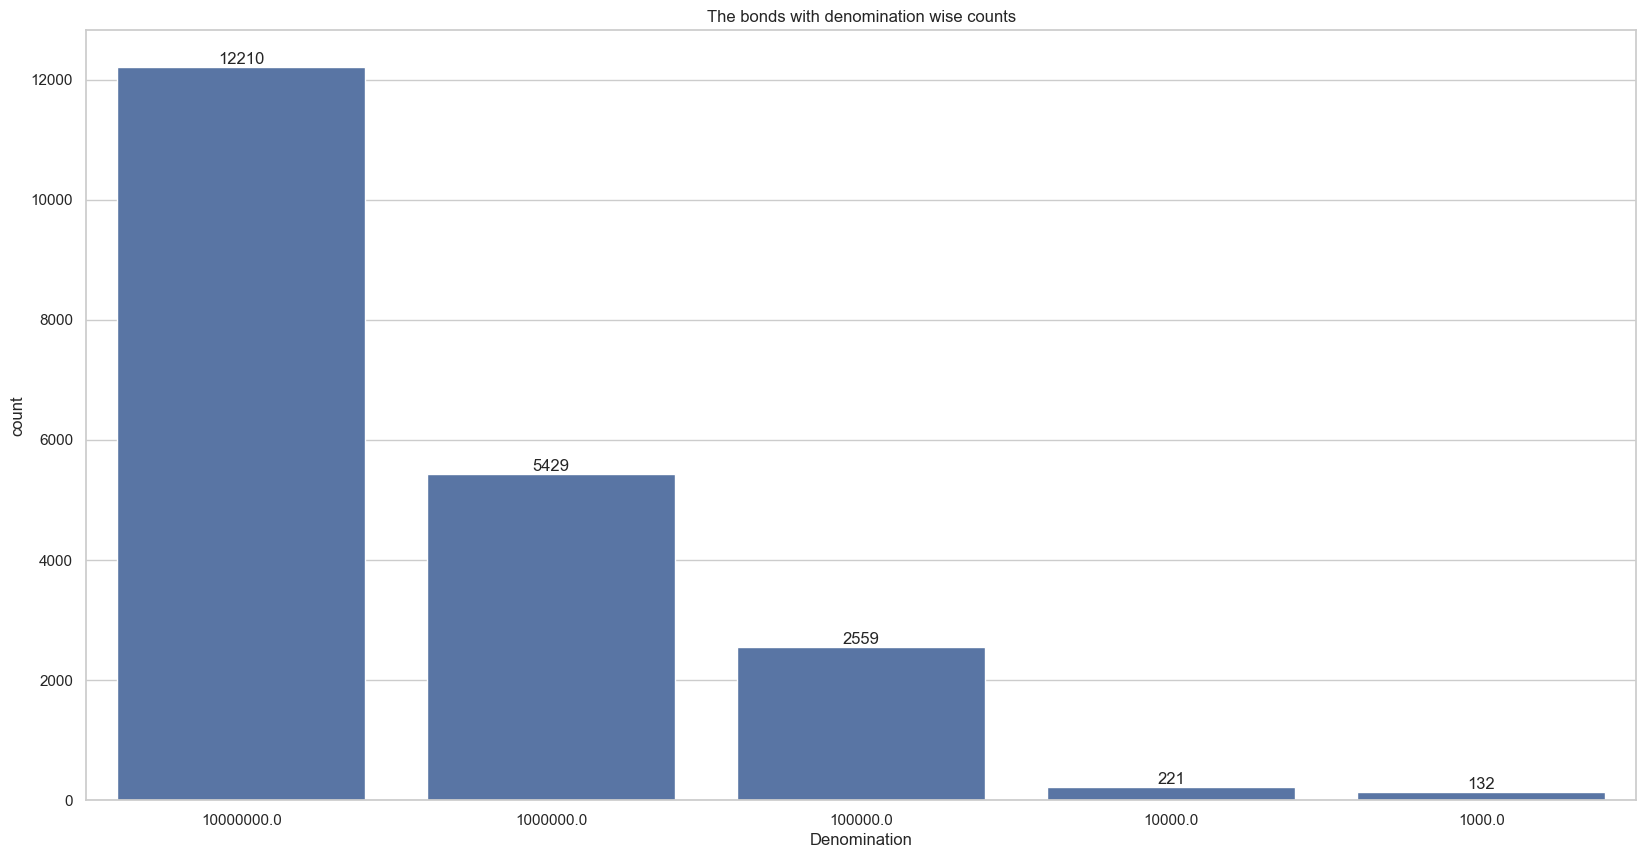

In [414]:
plt.figure(figsize=(20, 10))
denomination_counts = complete_data['Denomination'].value_counts().sort_values(ascending=False)
ax = sns.countplot(data=complete_data, x='Denomination', order=denomination_counts.index)
ax.bar_label(ax.containers[0])
plt.title("The bonds with denomination wise counts")
plt.show()

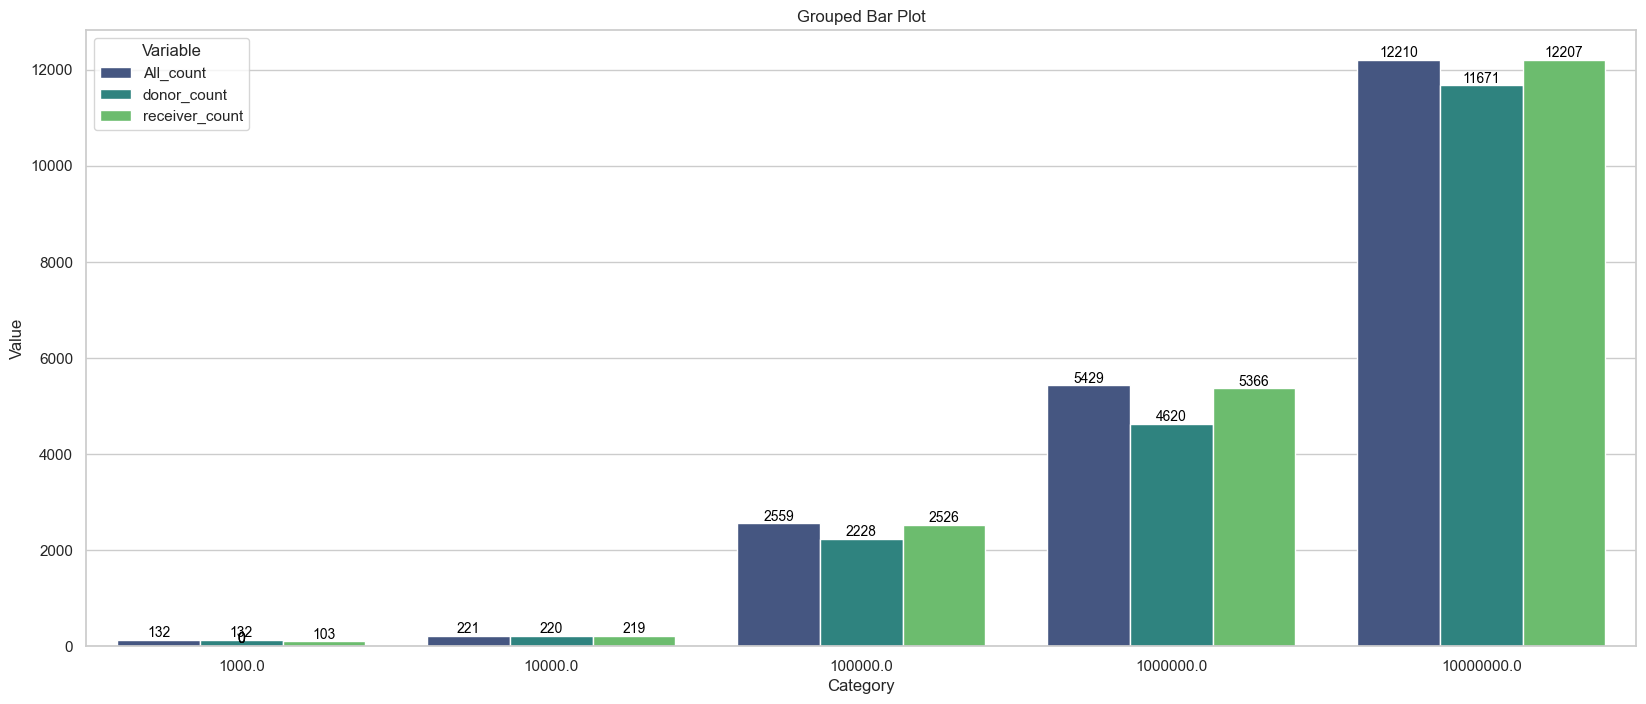

In [415]:
# Plotting
plt.figure(figsize=(20, 8))  # Set the figure size

# Melt the DataFrame to convert it to the long format
append_denominations_count_melted = append_denominations_count.reset_index().melt(id_vars='Denomination', 
                                                                                  var_name='Variable', 
                                                                                  value_name='Value')

# Create the grouped bar plot using Seaborn
ax = sns.barplot(x='Denomination', y='Value', hue='Variable', data=append_denominations_count_melted, palette='viridis')

# Adding numerical labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Adding title and labels
plt.title('Grouped Bar Plot')
plt.xlabel('Category')
plt.ylabel('Value')

# Show plot
plt.show()

- The sponsors or purchaser has taken 1 crore denominations of electoral bonds they are higher in count.


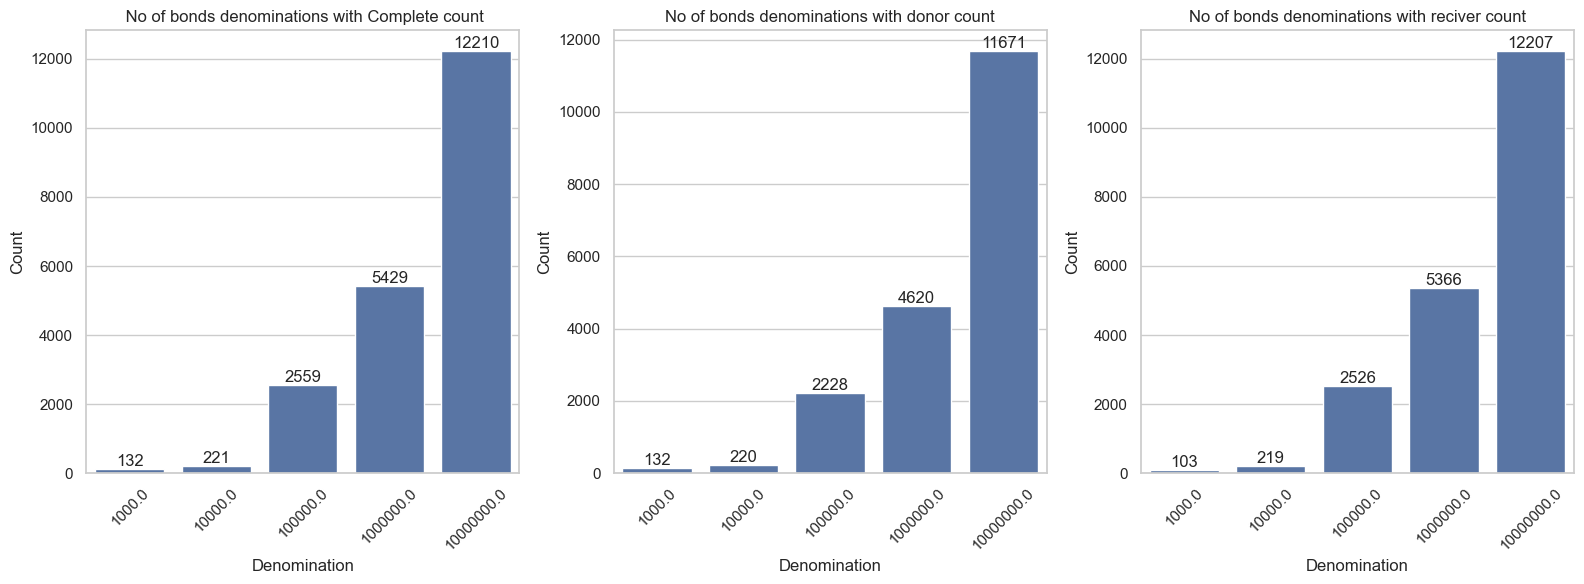

In [416]:
# Set the figure size (larger figure)
plt.figure(figsize=(16, 6))

# Plot the first count plot (leftmost)
plt.subplot(1, 3, 1)
sns.barplot(data=append_denominations_count, x='Denomination', y='All_count')
plt.title('First Plot')
plt.xlabel('Denomination')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title(" No of bonds denominations with Complete count")
plt.gca().bar_label(plt.gca().containers[0])  # Add count labels to the bars

# Plot the second count plot (middle)
plt.subplot(1, 3, 2)
sns.barplot(data=append_denominations_count, x='Denomination', y='donor_count')
plt.title('Second Plot')
plt.xlabel('Denomination')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title("No of bonds denominations with donor count")
plt.gca().bar_label(plt.gca().containers[0])  # Add count labels to the bars

# Plot the third count plot (rightmost)
plt.subplot(1, 3, 3)
sns.barplot(data=append_denominations_count, x='Denomination', y='receiver_count')
plt.title('Third Plot')
plt.xlabel('Denomination')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title("No of bonds denominations with reciver count")
plt.gca().bar_label(plt.gca().containers[0])  # Add count labels to the bars

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### BRANCH WISE DENOMINATIONS ANALYSIS

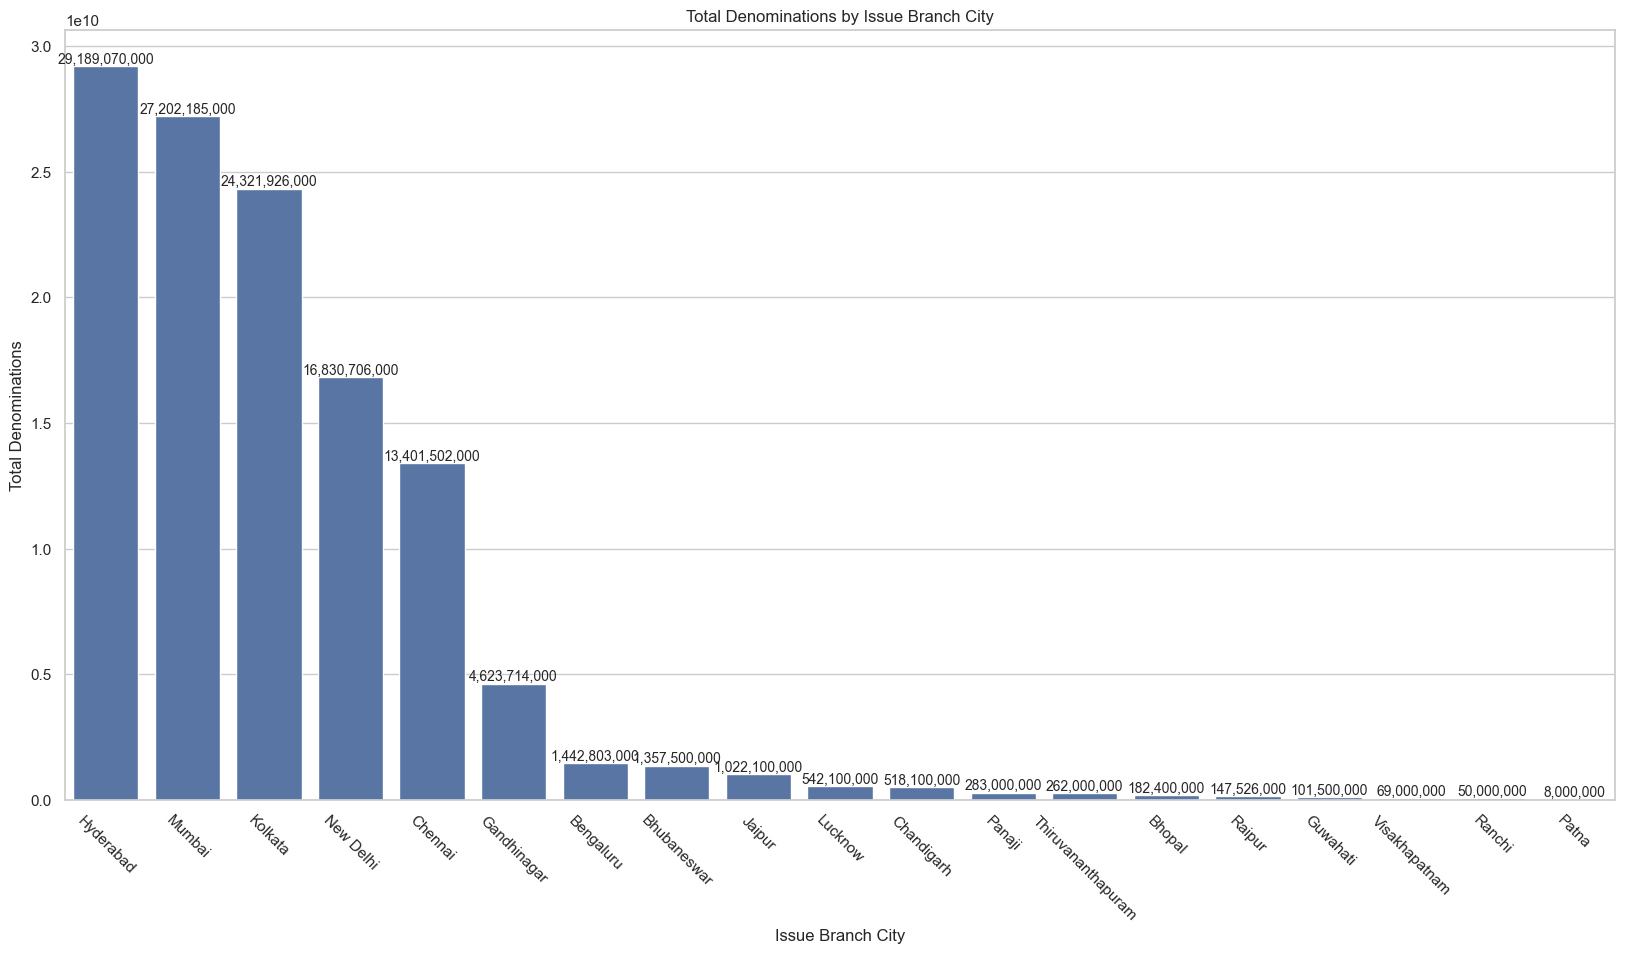

In [417]:
# Aggregate sum of 'Denomination' by 'IssueBranchCity'
city_sum_denominations = complete_data.groupby('IssueBranchCity')['Denomination'].sum()

# Sort the aggregated sums in descending order
city_sum_denominations = city_sum_denominations.sort_values(ascending=False)

# Create a count plot based on the aggregated sums
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
ax = sns.barplot(x=city_sum_denominations.index, y=city_sum_denominations.values, order=city_sum_denominations.index)

# Add count labels (sums of denominations) to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=-45)
plt.xlabel('Issue Branch City')
plt.ylabel('Total Denominations')
plt.title('Total Denominations by Issue Branch City')
plt.show()

- Highest number of denomination amount has issused from the hyderabad and the lowest is patna.

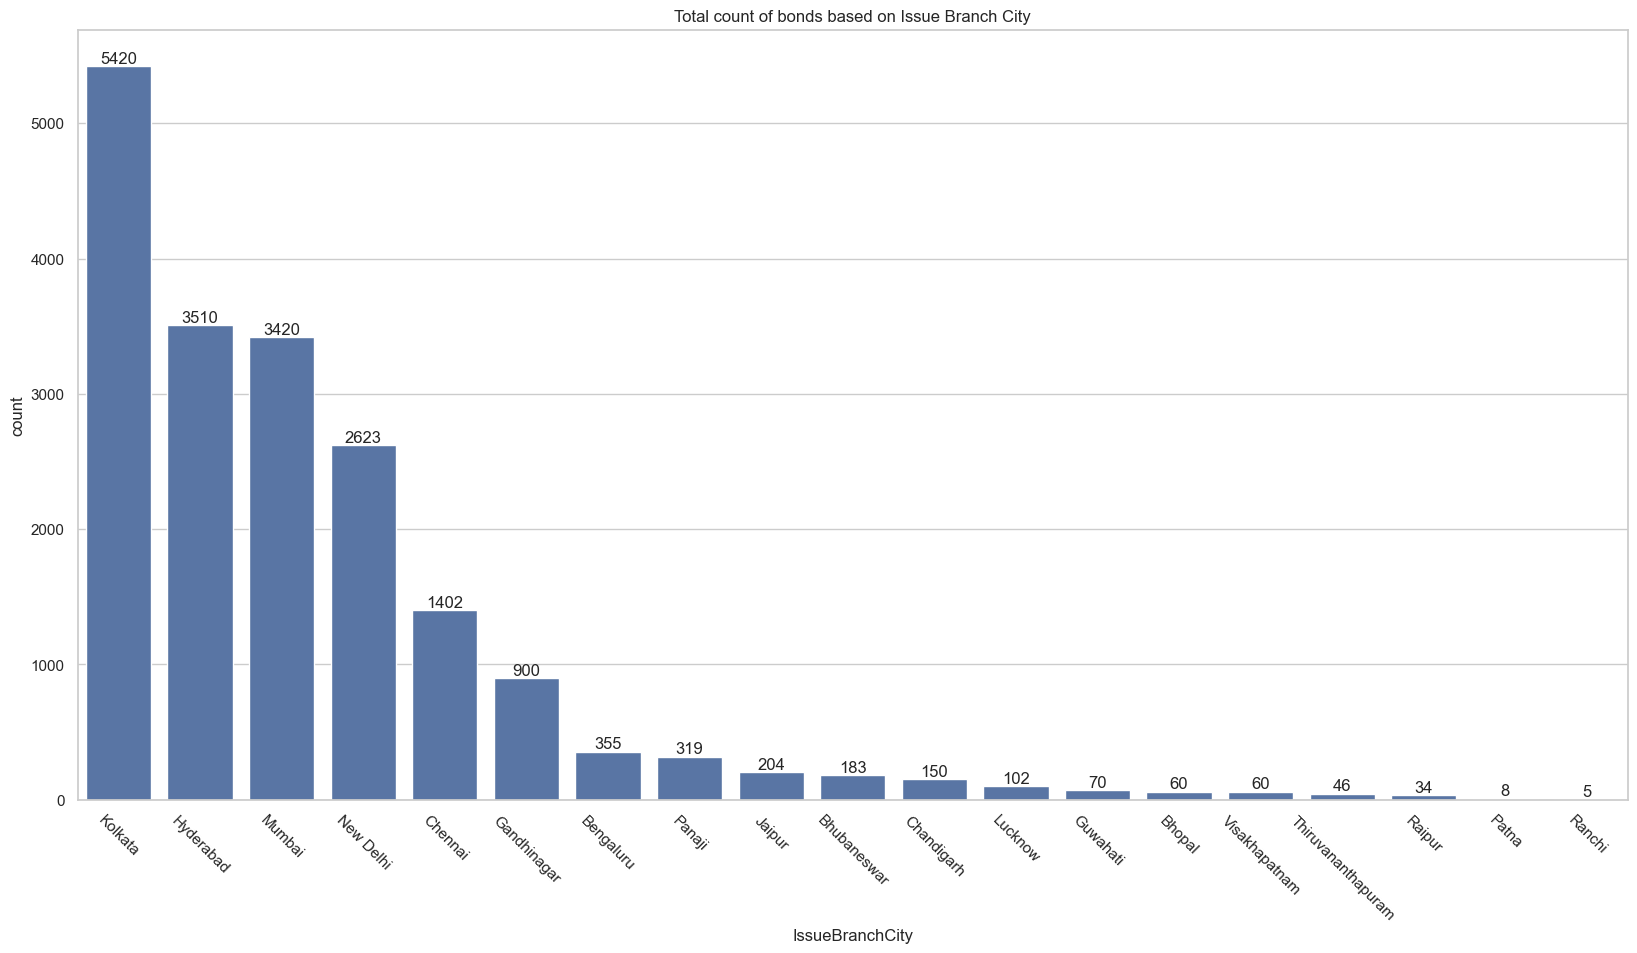

In [418]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a count plot
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
# Calculate value counts of 'IssueBranchCity' and sort by descending order of counts
city_counts = complete_data['IssueBranchCity'].value_counts().sort_values(ascending=False)
# Create the count plot using Seaborn with specified order
ax = sns.countplot(data=complete_data, x='IssueBranchCity', order=city_counts.index)
# Add count labels to the bars
ax.bar_label(ax.containers[0])  # Assuming you want to label the first container
# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=-45)
plt.title('Total count of bonds based on Issue Branch City')
# Show the plot
plt.show()

The highest number of denomination bonds has issued state is Kolkata and lowest in Ranchi 

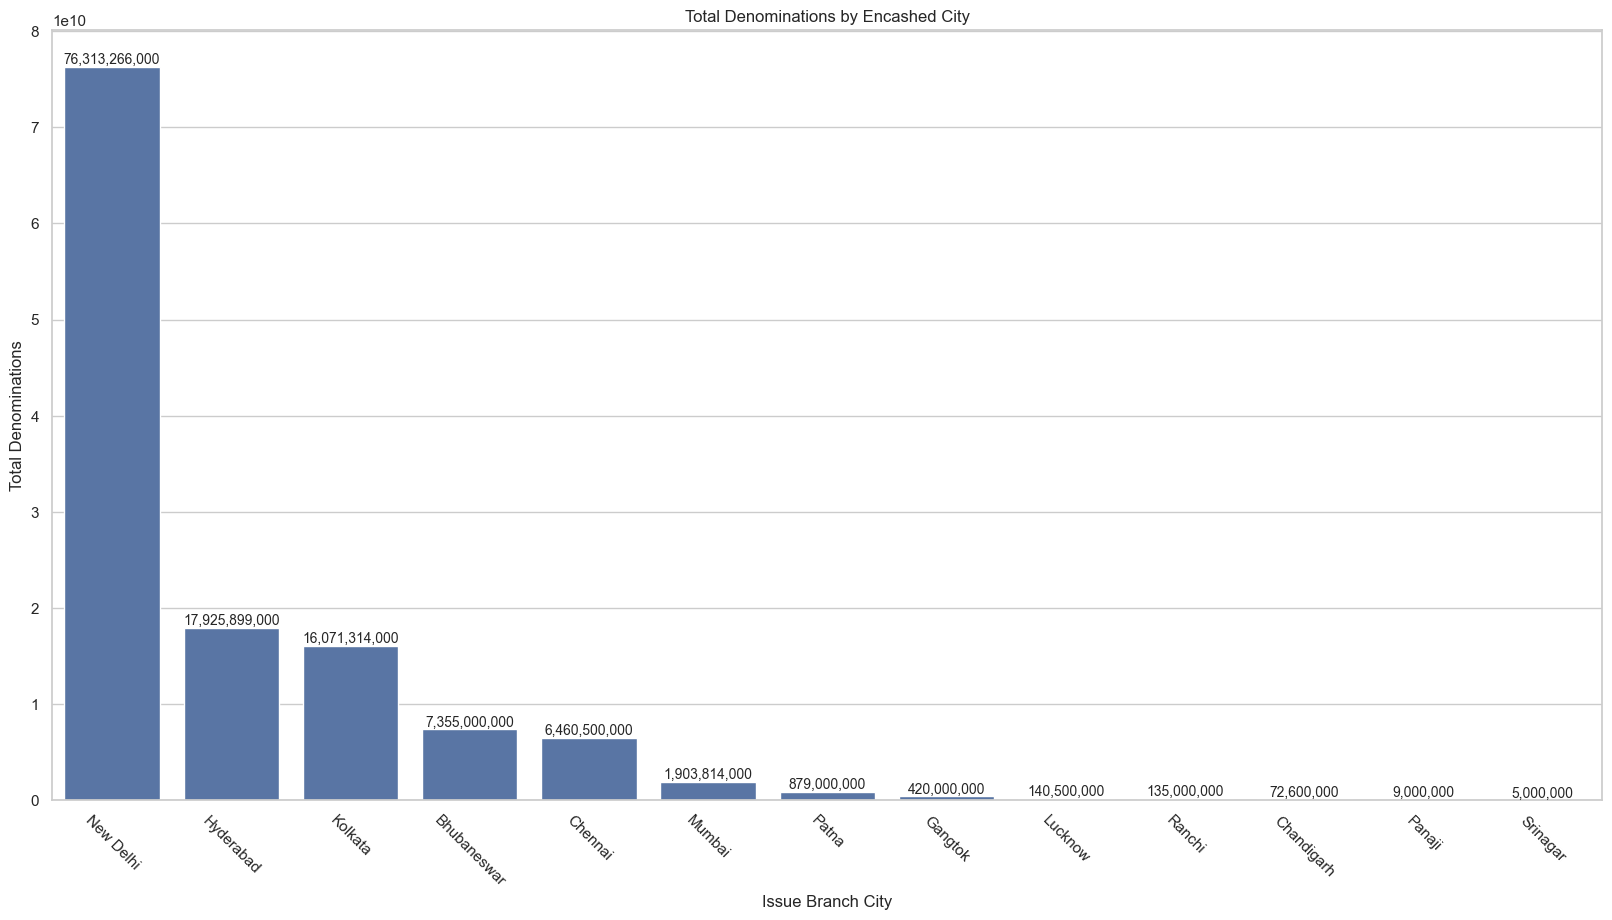

In [419]:
# Aggregate sum of 'Denomination' by 'IssueBranchCity'
city_sum_denominations = complete_data.groupby('EncashedCity')['Denomination'].sum()

# Sort the aggregated sums in descending order
city_sum_denominations = city_sum_denominations.sort_values(ascending=False)

# Create a count plot based on the aggregated sums
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
ax = sns.barplot(x=city_sum_denominations.index, y=city_sum_denominations.values, order=city_sum_denominations.index)

# Add count labels (sums of denominations) to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=-45)
plt.xlabel('Issue Branch City')
plt.ylabel('Total Denominations')
plt.title('Total Denominations by Encashed City')
plt.show()

The highest number of denominations amount has encashed in New delhi and the lowest is srinagar 

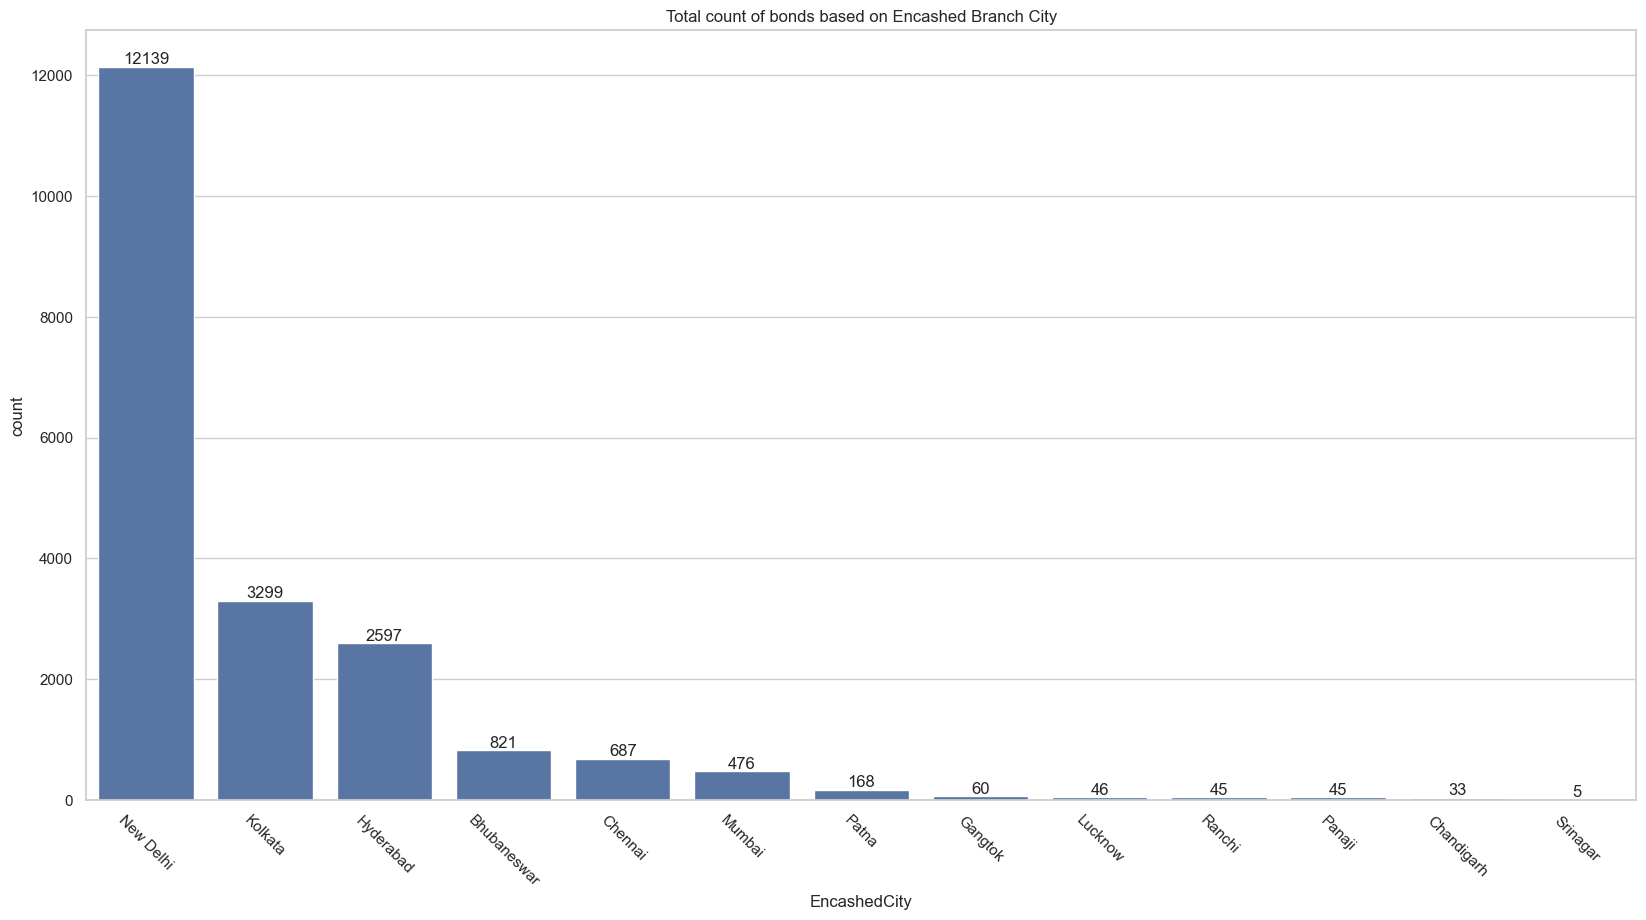

In [420]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a count plot
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
# Calculate value counts of 'IssueBranchCity' and sort by descending order of counts
city_counts = complete_data['EncashedCity'].value_counts().sort_values(ascending=False)
# Create the count plot using Seaborn with specified order
ax = sns.countplot(data=complete_data, x='EncashedCity', order=city_counts.index)
# Add count labels to the bars
ax.bar_label(ax.containers[0])  # Assuming you want to label the first container
# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=-45)
plt.title('Total count of bonds based on Encashed Branch City')
# Show the plot
plt.show()

The highest number of denominations bonds has encashed in New delhi and the lowest is srinagar 

### WORD CLOUD DATA ANALYSIS

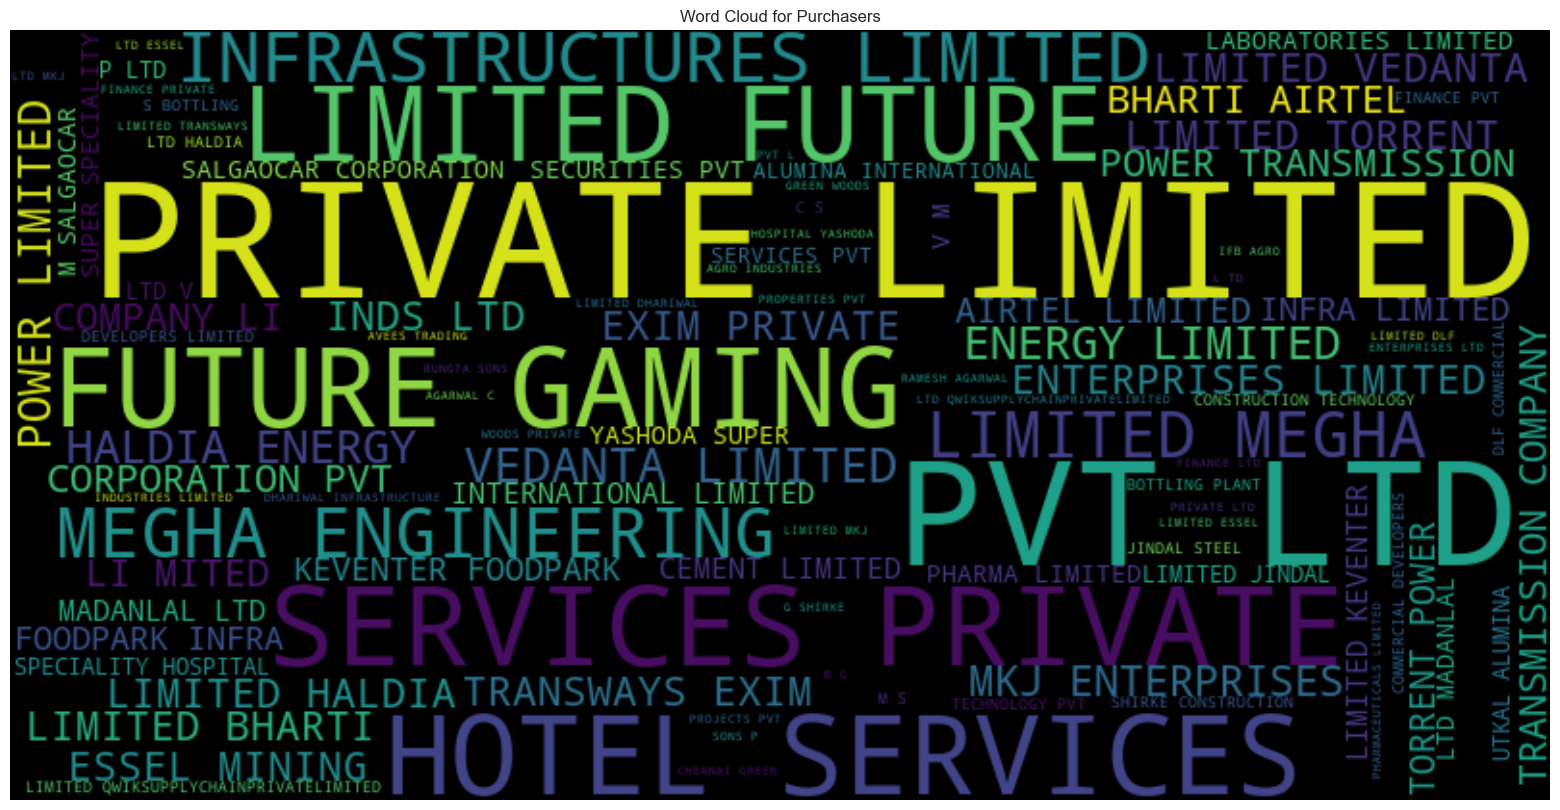

In [421]:
# Extract text data from the 'Purchaser' column and join into a single string
text_data = ' '.join(complete_data['Purchaser'].dropna())  # Join non-null values
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=100).generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud for Purchasers')
plt.show()

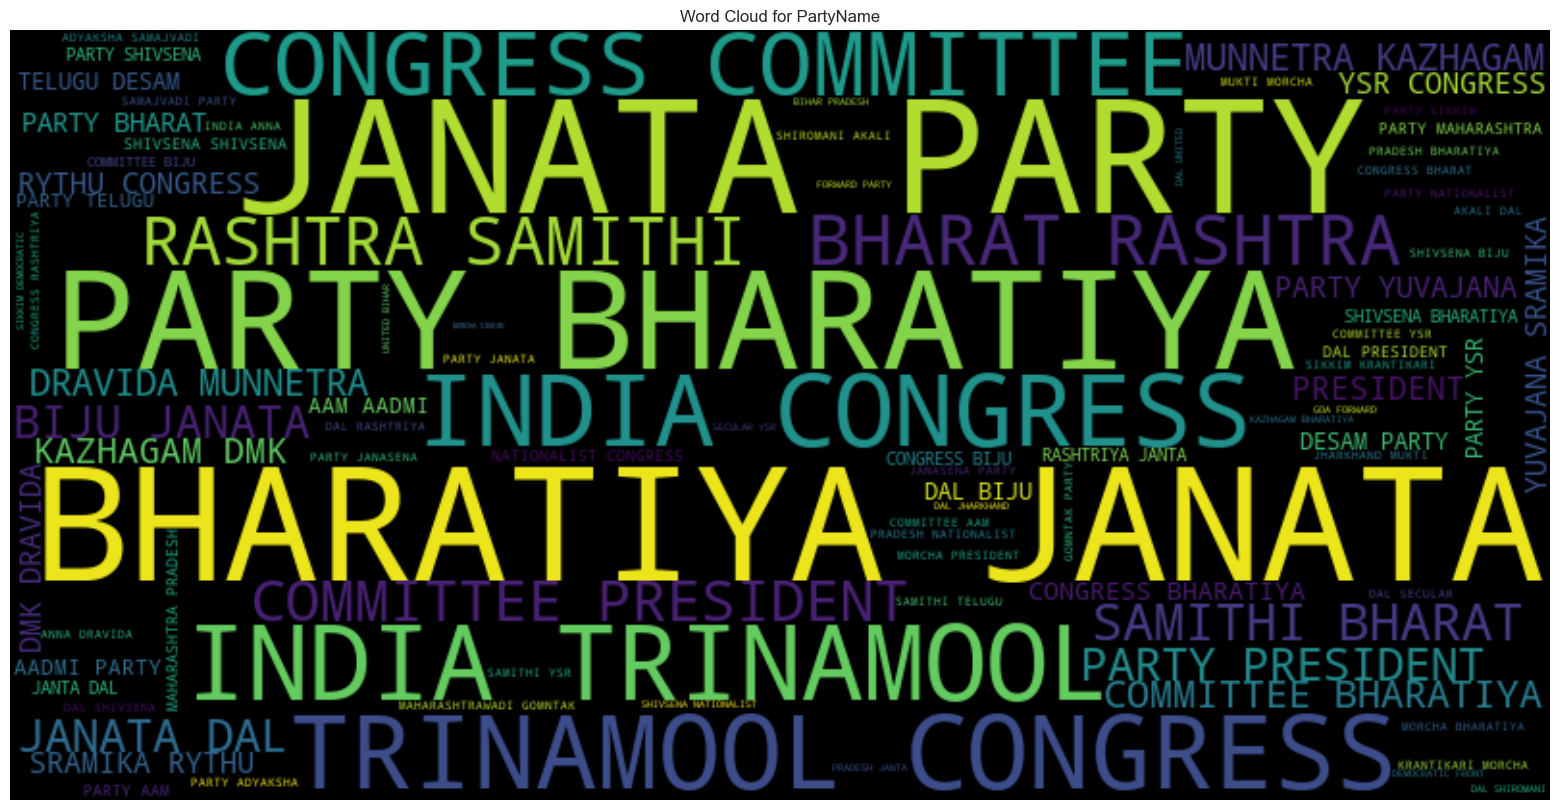

In [422]:
# Extract text data from the 'Purchaser' column and join into a single string
text_data = ' '.join(complete_data['PartyName'].dropna())  # Join non-null values
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=100).generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud for PartyName')
plt.show()


### DATES ANALYSIS 

In [423]:
sponsor_dates = common_sponsor_data[['Unique_key','JournalDate','PurchaseDate','ExpiryDate']]
sponsor_dates.head()

Unique_key JournalDate PurchaseDate ExpiryDate
0    TL11448  2019-04-12   2019-04-12 2019-04-26
1    TL11447  2019-04-12   2019-04-12 2019-04-26
2    TL11441  2019-04-12   2019-04-12 2019-04-26
3     OL1113  2019-04-12   2019-04-12 2019-04-26
4     OL1118  2019-04-12   2019-04-12 2019-04-26

In [424]:
sponsor_dates['Journal_Purchase'] = sponsor_dates['PurchaseDate'] - sponsor_dates['JournalDate']
sponsor_dates['Purchase-Expiry'] = sponsor_dates['ExpiryDate'] - sponsor_dates['PurchaseDate']
sponsor_dates['Journal-Expiry'] = sponsor_dates['ExpiryDate'] - sponsor_dates['JournalDate'] 

In [425]:
sponsor_dates.columns

Index(['Unique_key', 'JournalDate', 'PurchaseDate', 'ExpiryDate',
       'Journal_Purchase', 'Purchase-Expiry', 'Journal-Expiry'],
      dtype='object')

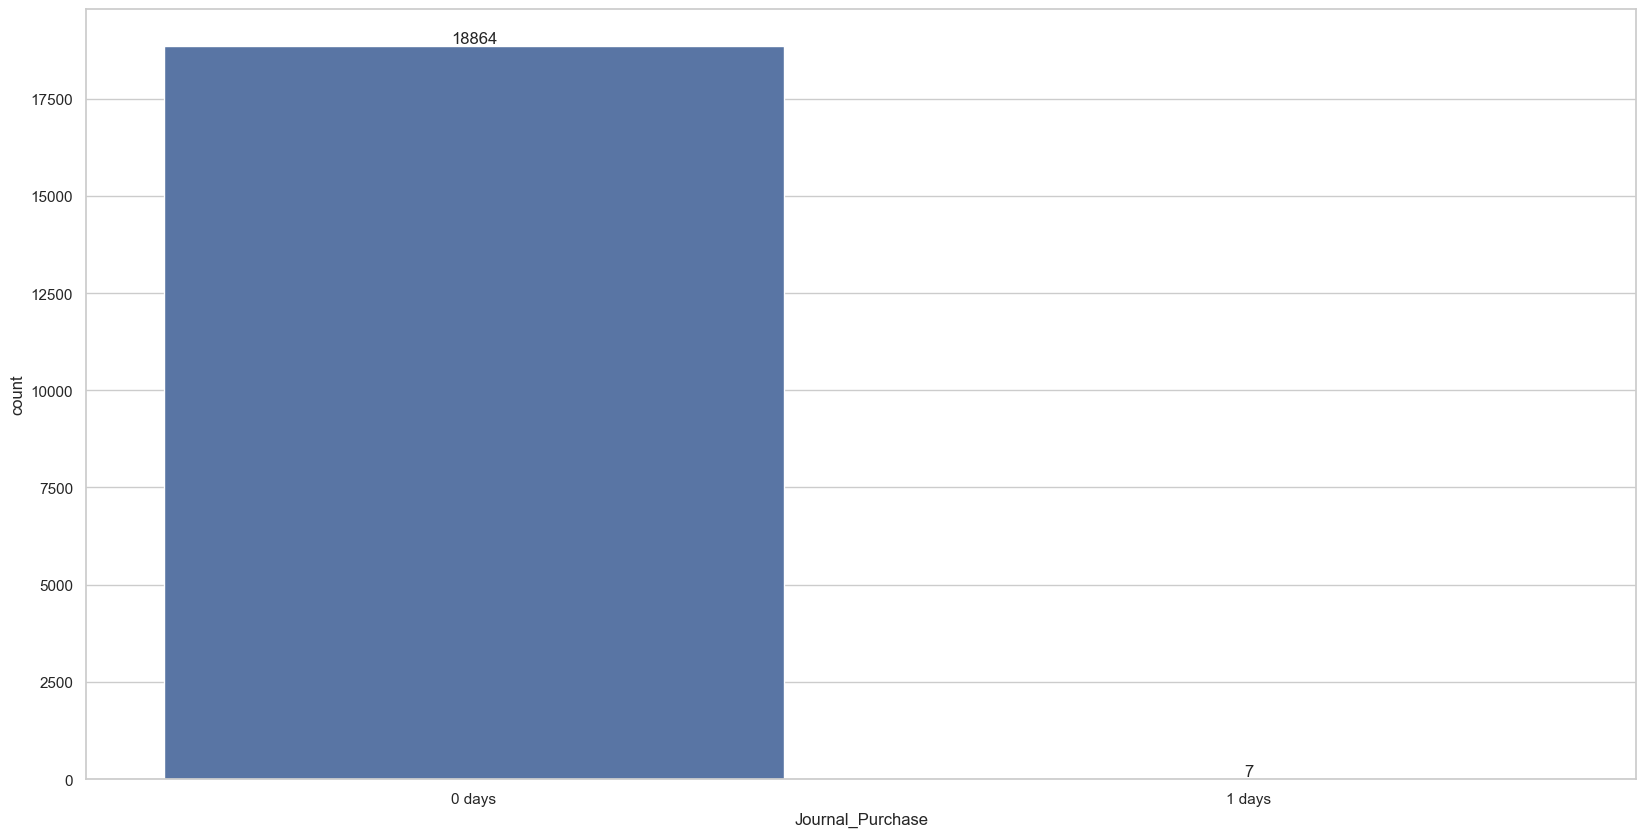

In [426]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a count plot
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
ax = sns.countplot(sponsor_dates,x='Journal_Purchase')
ax.bar_label(ax.containers[0])  
# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=0)
# Show the plot
plt.show()

- Looking into the above graph we can see most of the bonds are isssued within a day and at max in one day. No bond took more than one day to issue.

In [427]:
Issue_delay = common_sponsor_data[common_sponsor_data['JournalDate']!= common_sponsor_data['PurchaseDate']]
Issue_delay

SNo           Urn JournalDate PurchaseDate ExpiryDate  \
9122  9123  8.472020e+20  2022-04-08   2022-04-09 2022-04-23   
9125  9126  8.472020e+20  2022-04-08   2022-04-09 2022-04-23   
9128  9129  8.472020e+20  2022-04-08   2022-04-09 2022-04-23   
9130  9131  8.472020e+20  2022-04-08   2022-04-09 2022-04-23   
9132  9133  8.472020e+20  2022-04-08   2022-04-09 2022-04-23   
9134  9135  8.472020e+20  2022-04-08   2022-04-09 2022-04-23   
9136  9137  8.472020e+20  2022-04-08   2022-04-09 2022-04-23   

                                      Purchaser Prefix  BondNumber  \
9122         GREENKO BUDHIL HYDRO POWER PVT LTD     OC       12060   
9125  GREENKO RAYALA WIND POWER PRIVATE LIMITED     OC       12059   
9128                SANOLA WIND PROJECT PVT LTD     OC       12052   
9130                        SEI DIAMOND PVT LTD     OC       12056   
9132                          SEI VENUS PVT LTD     OC       12051   
9134             SUNBORNE ENERGY ANDHRA PVT LTD     OC       12055   
9136          TANOT WIND POWER VENTURES PVT LTD     OC       12067   

      Denominations  IssueBranchCode  IssueTeller      State  Branch code  \
9122       10000000              847      3898296  Telangana          847   
9125       10000000              847      3898296  Telangana          847   
9128       10000000              847      3898296  Telangana          847   
9130       10000000              847      3898296  Telangana          847   
9132       10000000              847      3898296  Telangana          847   
9134       10000000              847      3898296  Telangana          847   
9136       10000000              847      3898296  Telangana          847   

     Branch City Unique_key  PurchaserYear  
9122   Hyderabad    OC12060           2022  
9125   Hyderabad    OC12059           2022  
9128   Hyderabad    OC12052           2022  
9130   Hyderabad    OC12056           2022  
9132   Hyderabad    OC12051           2022  
9134   Hyderabad    OC12055           2022  
9136   Hyderabad    OC12067           2022

In [428]:
Issue_delay = Issue_delay[['JournalDate','PurchaseDate','Purchaser','Branch City']]
Issue_delay

JournalDate PurchaseDate                                  Purchaser  \
9122  2022-04-08   2022-04-09         GREENKO BUDHIL HYDRO POWER PVT LTD   
9125  2022-04-08   2022-04-09  GREENKO RAYALA WIND POWER PRIVATE LIMITED   
9128  2022-04-08   2022-04-09                SANOLA WIND PROJECT PVT LTD   
9130  2022-04-08   2022-04-09                        SEI DIAMOND PVT LTD   
9132  2022-04-08   2022-04-09                          SEI VENUS PVT LTD   
9134  2022-04-08   2022-04-09             SUNBORNE ENERGY ANDHRA PVT LTD   
9136  2022-04-08   2022-04-09          TANOT WIND POWER VENTURES PVT LTD   

     Branch City  
9122   Hyderabad  
9125   Hyderabad  
9128   Hyderabad  
9130   Hyderabad  
9132   Hyderabad  
9134   Hyderabad  
9136   Hyderabad

- Only 7 Bonds got delayed while issuing them and that happend on 2022-04-08 and only in Hyderbad which means we can say there was a technical problems in that branch. 

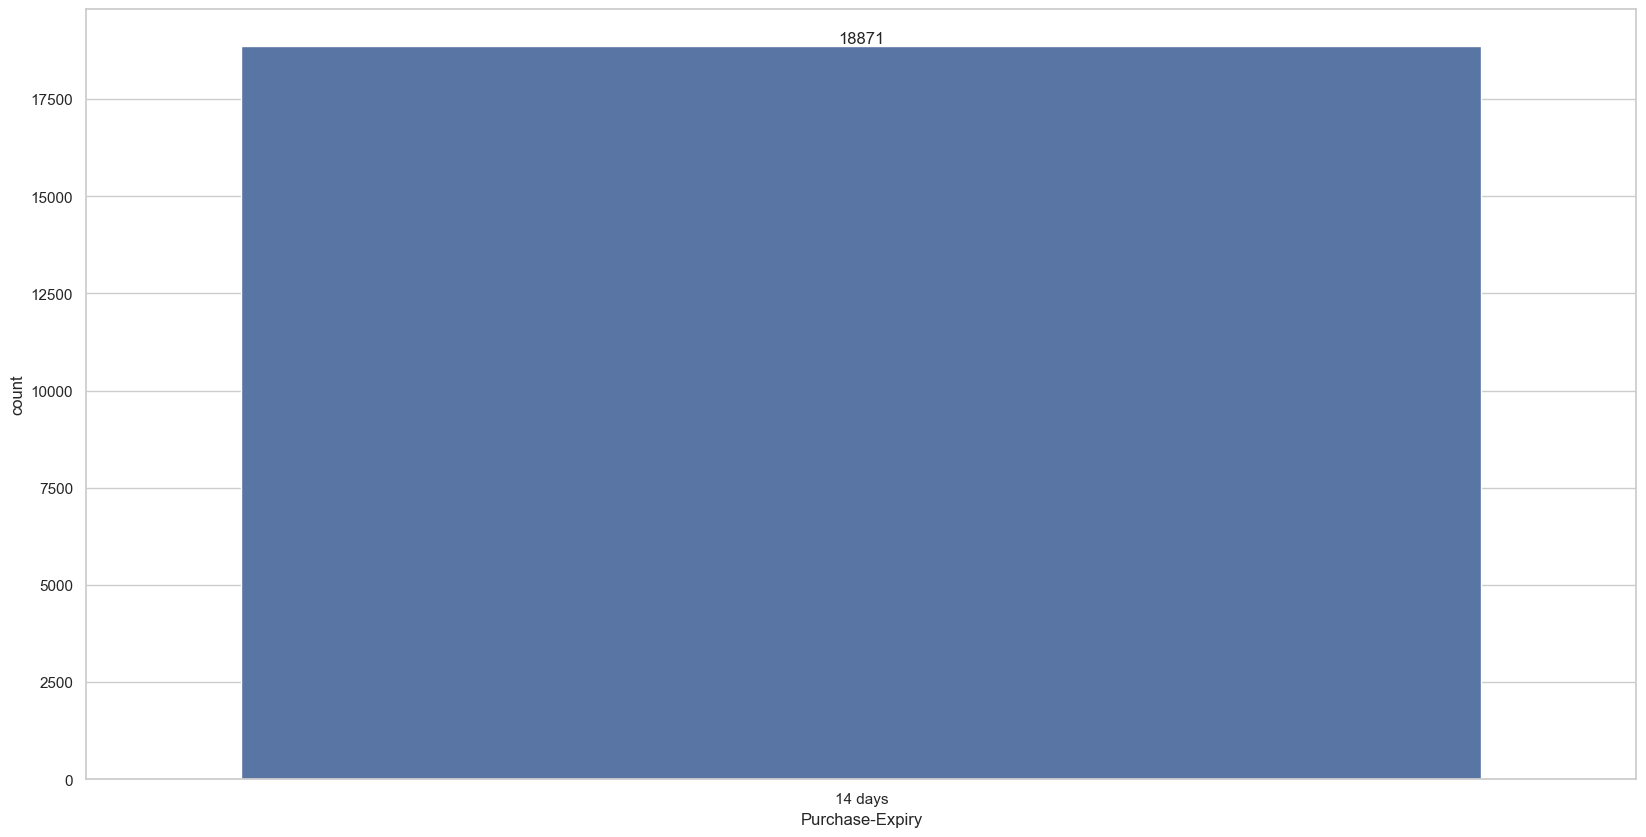

In [429]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a count plot
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
ax = sns.countplot(sponsor_dates,x='Purchase-Expiry')
ax.bar_label(ax.containers[0])  
# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=0)
# Show the plot
plt.show()

- Looking into the graph we can say all the bonds have only 14 days to encash from their puchase date

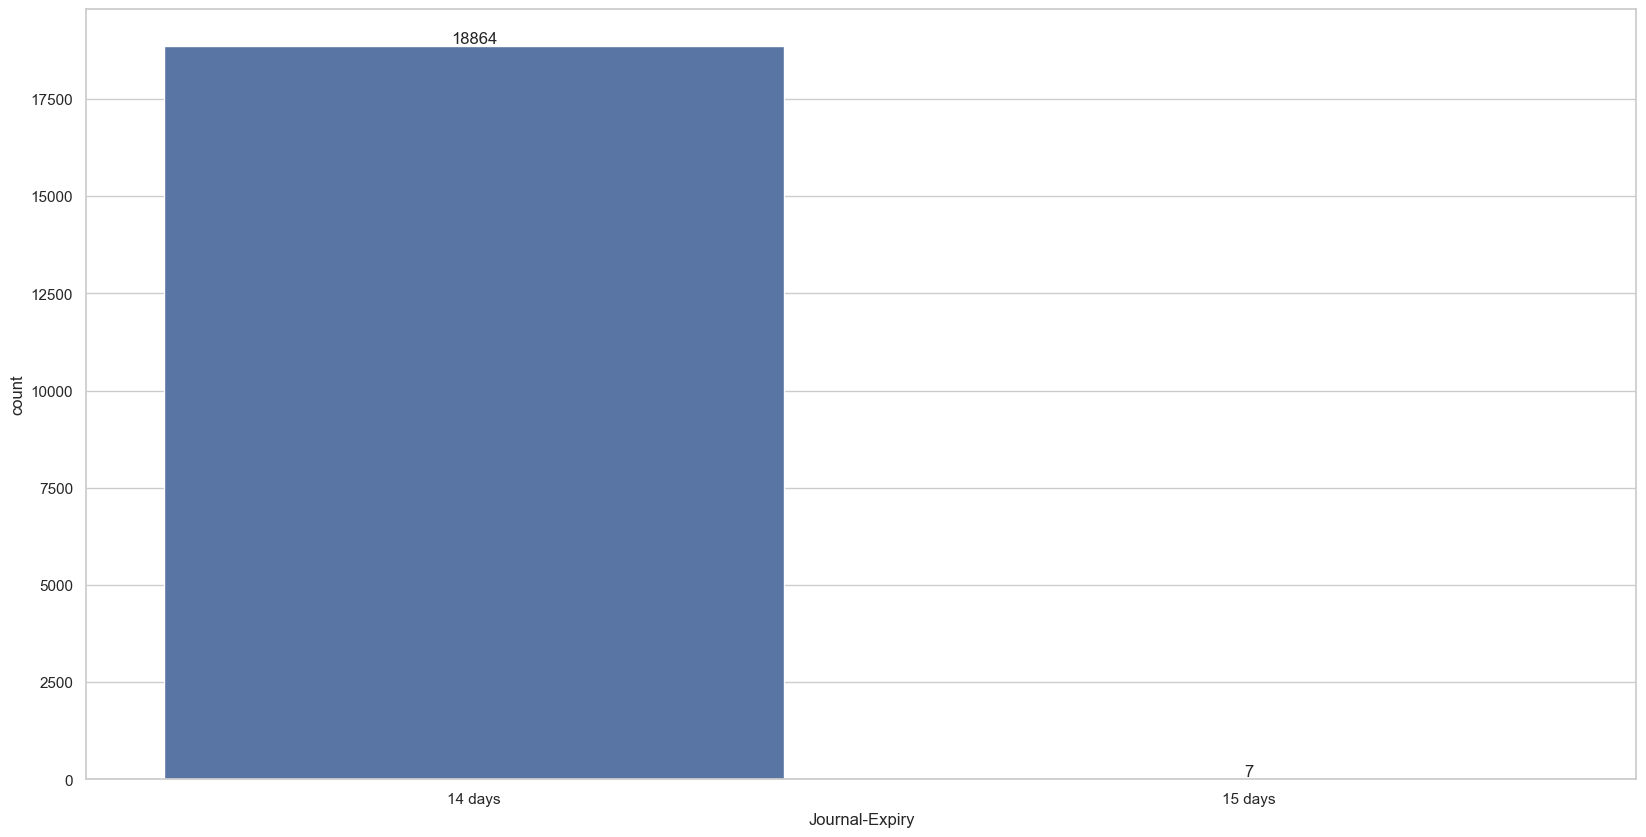

In [430]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a count plot
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
ax = sns.countplot(sponsor_dates,x='Journal-Expiry')
ax.bar_label(ax.containers[0])  
# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=0)
# Show the plot
plt.show()

In [431]:
perfect_data.columns 

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'IssueBranchCode', 'IssueTeller', 'IssueState',
       'IssueBranchCodeNo', 'IssueBranchCity', 'Unique_key', 'PurchaserYear',
       'DateEncashment', 'PartyName', 'AccountNum', 'PayBranchCode',
       'PayTeller', 'encashedyear', 'EncashedState', 'EncashedBranchCode',
       'EncashedCity', 'Denomination'],
      dtype='object')

In [432]:
encashed_dates = perfect_data[['Unique_key','JournalDate', 'PurchaseDate', 'ExpiryDate','DateEncashment']]
encashed_dates.head(2) 

Unique_key JournalDate PurchaseDate ExpiryDate DateEncashment
0    OC10000  2022-04-08   2022-04-08 2022-04-22     2022-04-12
1    OC10001  2021-10-07   2021-10-07 2021-10-21     2021-10-08

In [433]:
encashed_dates['buy-encash'] = encashed_dates['DateEncashment'] - encashed_dates['PurchaseDate']

In [434]:
encashed_dates.head(2)

Unique_key JournalDate PurchaseDate ExpiryDate DateEncashment buy-encash
0    OC10000  2022-04-08   2022-04-08 2022-04-22     2022-04-12     4 days
1    OC10001  2021-10-07   2021-10-07 2021-10-21     2021-10-08     1 days

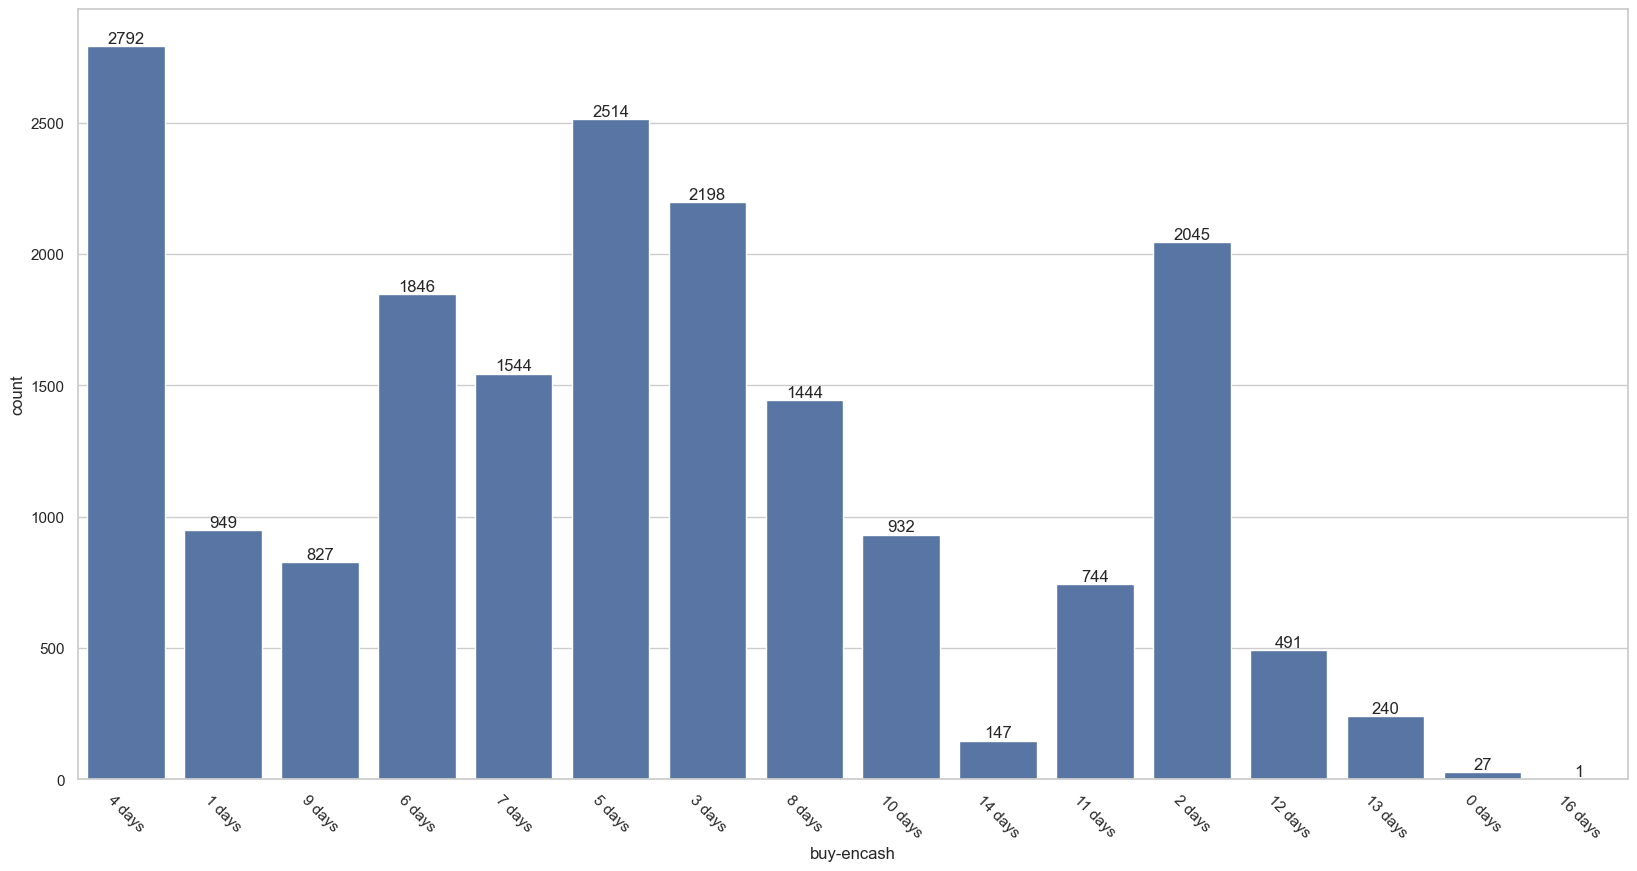

In [435]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a count plot
plt.figure(figsize=(20, 10))  # Set the figure size (width, height) in inches
ax = sns.countplot(encashed_dates,x='buy-encash')
ax.bar_label(ax.containers[0])  
# Rotate x-axis labels by -45 degrees for better readability
plt.xticks(rotation=-45)
# Show the plot
plt.show()

- Most of the bonds are encashed in 4 days 

In [436]:
black_data = perfect_data[perfect_data['DateEncashment']>perfect_data['ExpiryDate']]
black_data

Urn JournalDate PurchaseDate ExpiryDate  \
10846  8.002020e+20  2021-07-07   2021-07-07 2021-07-21   

                                              Purchaser Prefix  BondNumber  \
10846  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      8637.0   

       IssueBranchCode  IssueTeller                 IssueState  ...  \
10846            800.0    7273126.0  Tamil Nadu and Puducherry  ...   

       DateEncashment                     PartyName   AccountNum  \
10846      2021-07-23  ALL INDIA TRINAMOOL CONGRESS  *******0688   

       PayBranchCode  PayTeller encashedyear  \
10846            1.0  3480909.0       2021.0   

                          EncashedState  EncashedBranchCode  EncashedCity  \
10846  West Bengal and Andaman& Nicobar                 1.0       Kolkata   

       Denomination  
10846    10000000.0  

[1 rows x 24 columns]

- This is the only bond which got encashed even after it got expired and this was encashed by **All INDIA Trinalmool congress** which could be the data is wrong (Provided by the govt) or Some Quid proco has been there between the party and the bank. 

###  CHARTS WITH PURCHASER AND PARTY ANALYSIS

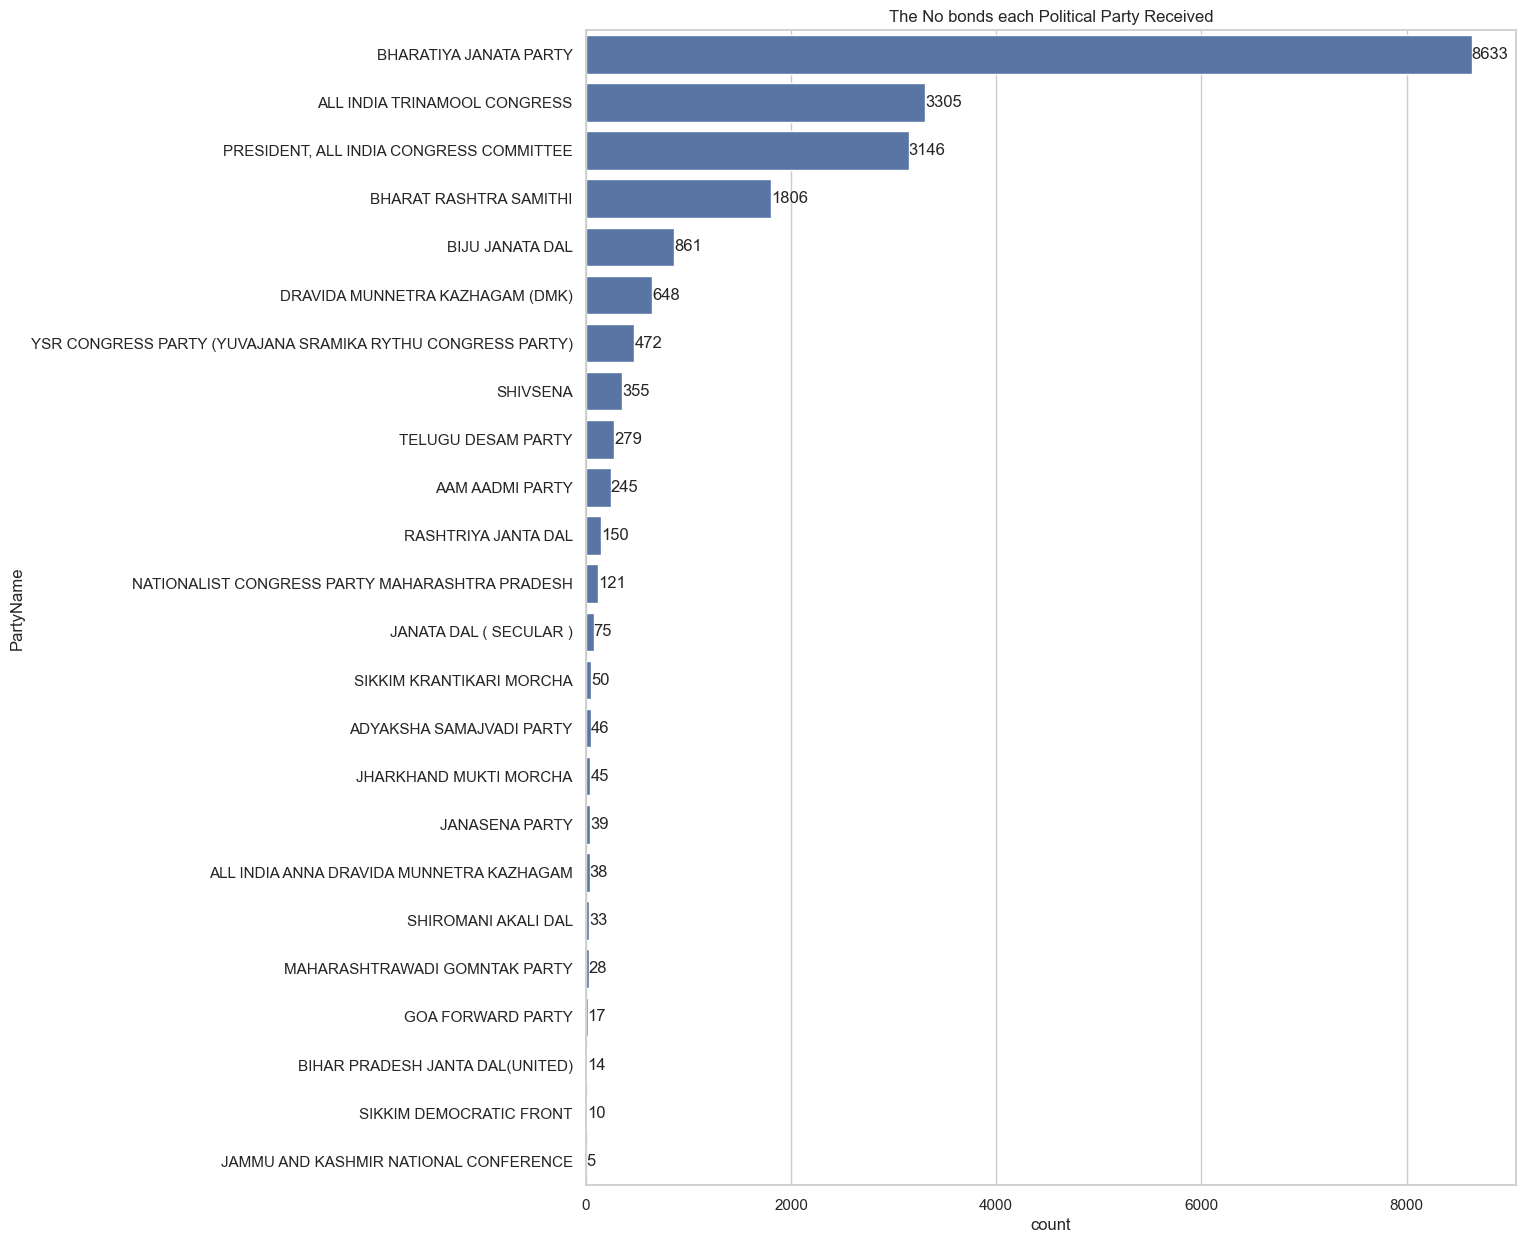

In [437]:
# Assuming you have a DataFrame named 'alldata_df' and want to plot a horizontal count plot
plt.figure(figsize=(12, 15))  # Set the figure size (width, height) in inches

# Create the horizontal count plot with y-labels on the bars
ax = sns.countplot(data=complete_data, y='PartyName', order=complete_data['PartyName'].value_counts().index)
ax.bar_label(ax.containers[0], fmt='%.0f')  # Display count labels on the bars
# title
plt.title('The No bonds each Political Party Received')
# Show the plot
plt.show()

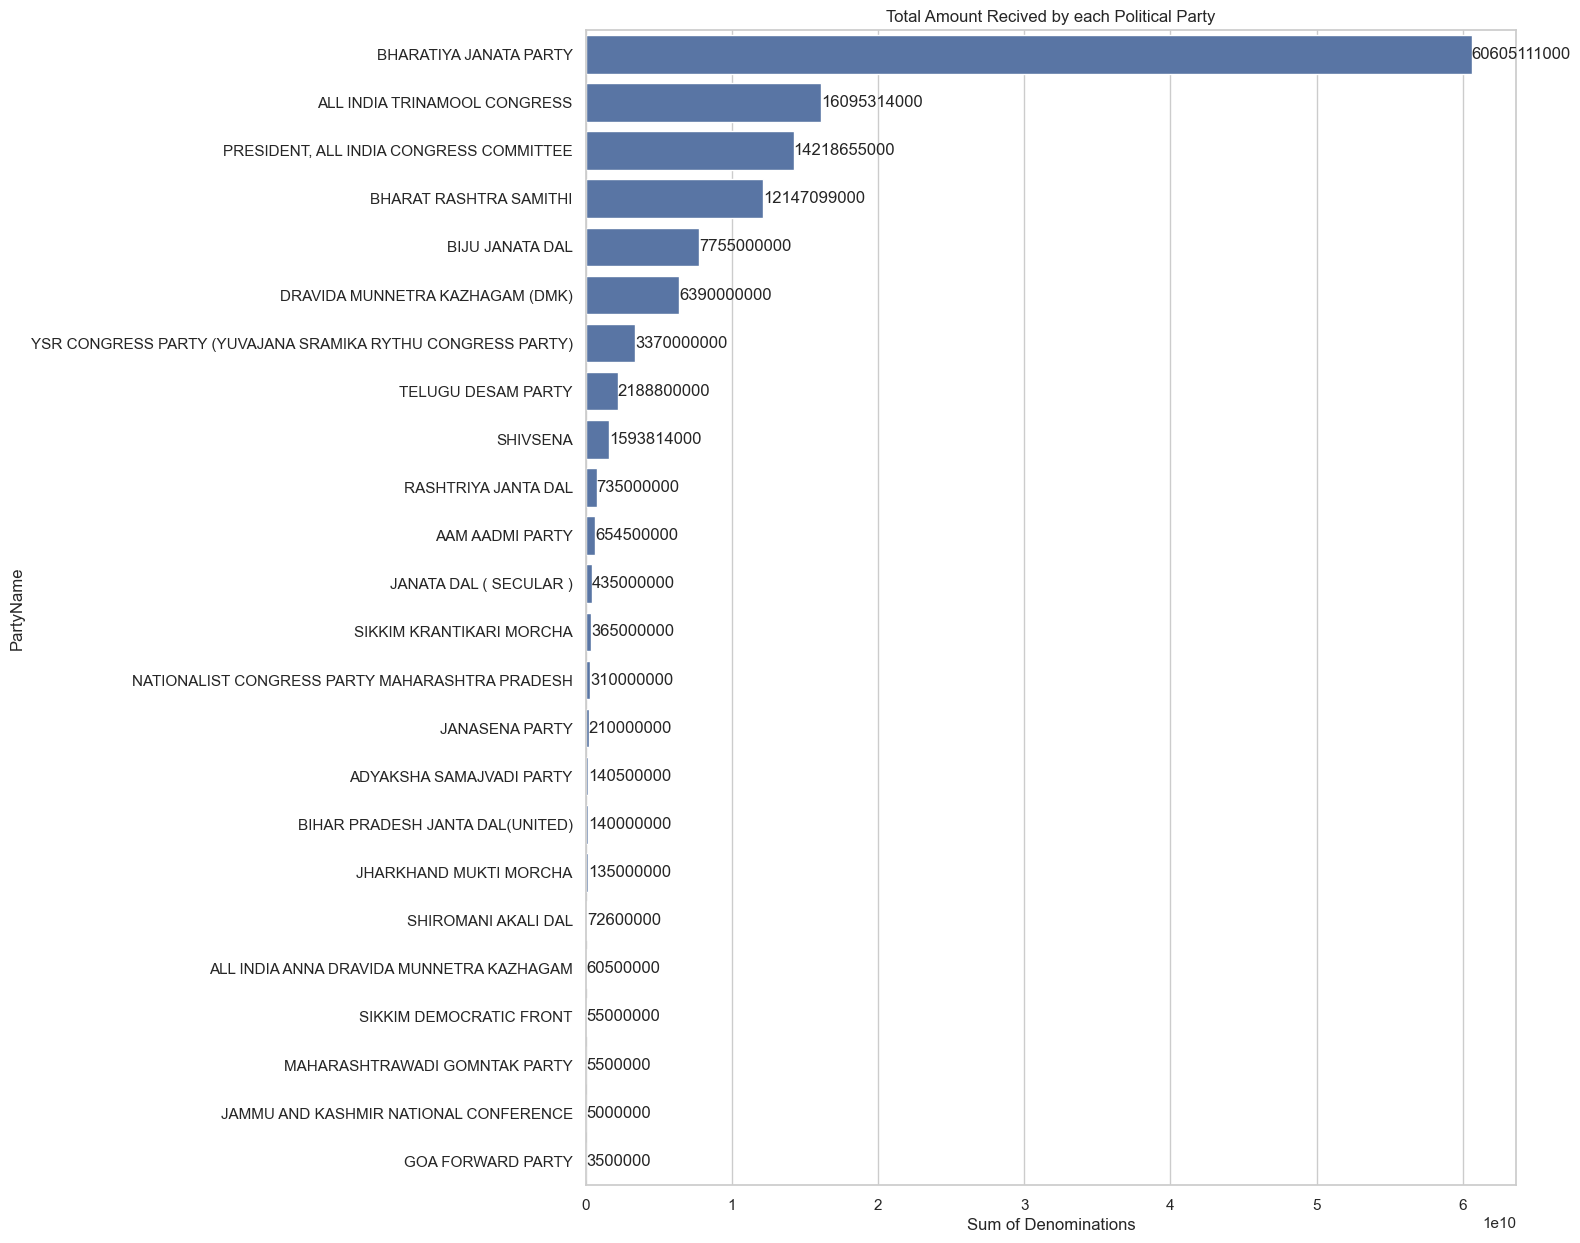

In [438]:
# Calculate the sum of 'Denominations' for each 'PartyName'
sum_denominations = common_recipient_data.groupby('PartyName')['Denominations'].sum().sort_values(ascending=False).reset_index()

# Plotting using Seaborn barplot
plt.figure(figsize=(12, 15))  # Set the figure size (width, height) in inches

# Create the horizontal bar plot with 'PartyName' on y-axis and summed 'Denominations' on x-axis
ax = sns.barplot(data=sum_denominations, y='PartyName', x='Denominations')

# Add count labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')  # Display count labels on the bars

# Set plot title and labels
plt.title('Total Amount Recived by each Political Party')
plt.xlabel('Sum of Denominations')
plt.ylabel('PartyName')

# Show the plot
plt.show()

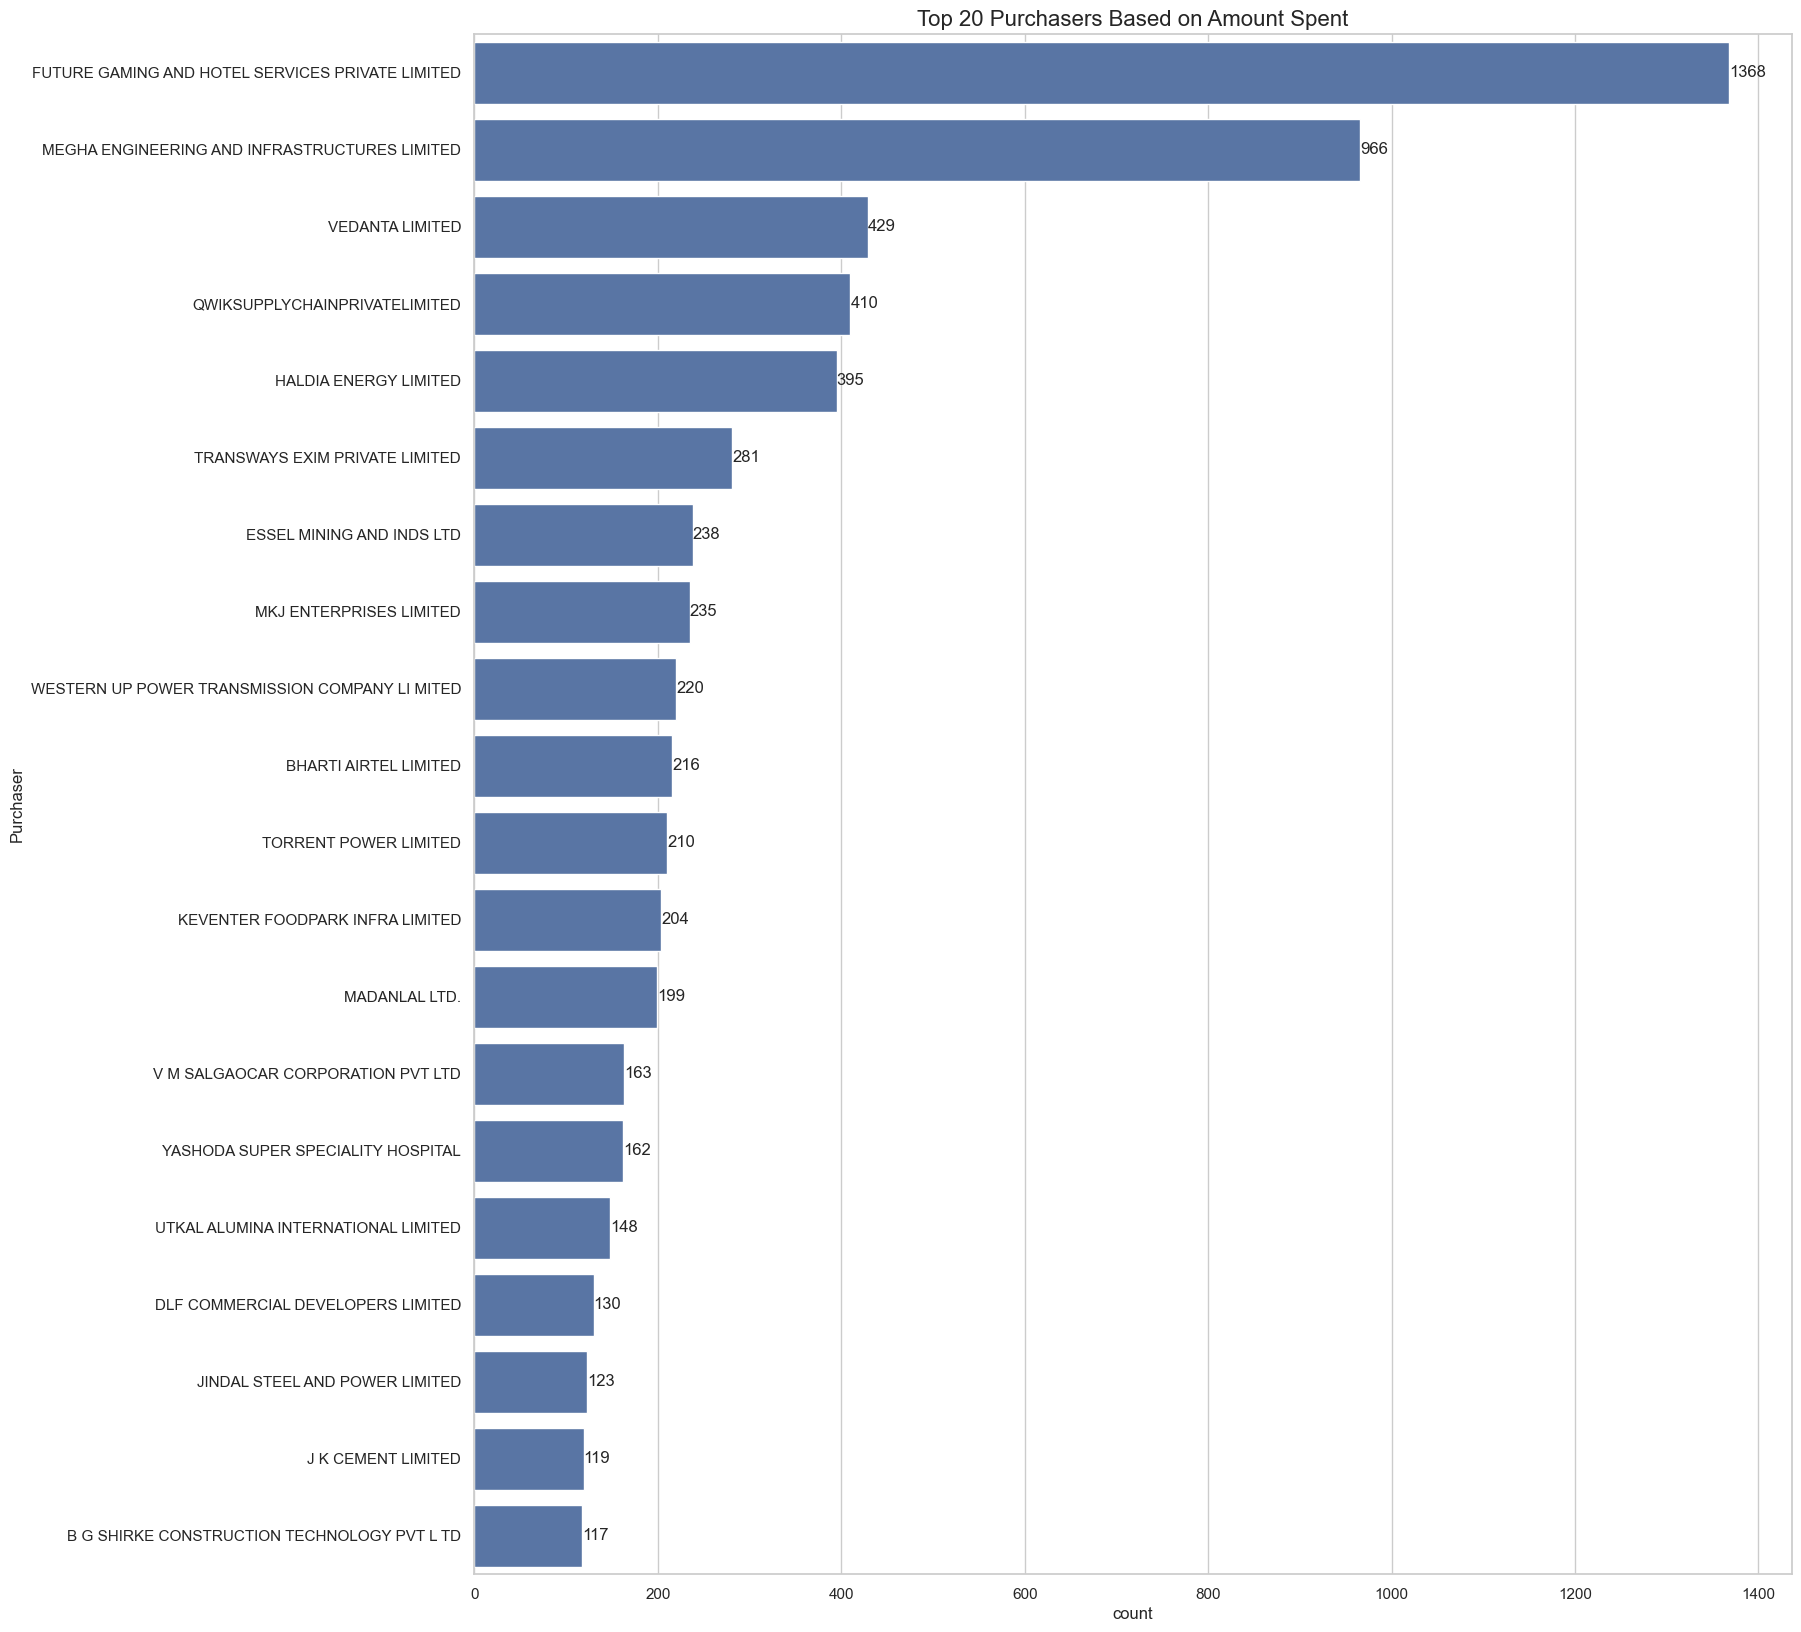

In [439]:
# Calculate the top 20 purchasers based on frequency
top_purchasers = complete_data['Purchaser'].value_counts().nlargest(20).index

# Filter the DataFrame to include only the top 20 purchasers
filtered_df = complete_data[complete_data['Purchaser'].isin(top_purchasers)]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 20))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.countplot(data=filtered_df, y='Purchaser', order=top_purchasers)  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0])  # Display count labels on the bars

# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
# title 
plt.title('Top 20 Purchasers Based on Amount Spent', fontsize=16)
# Show the plot
plt.show()


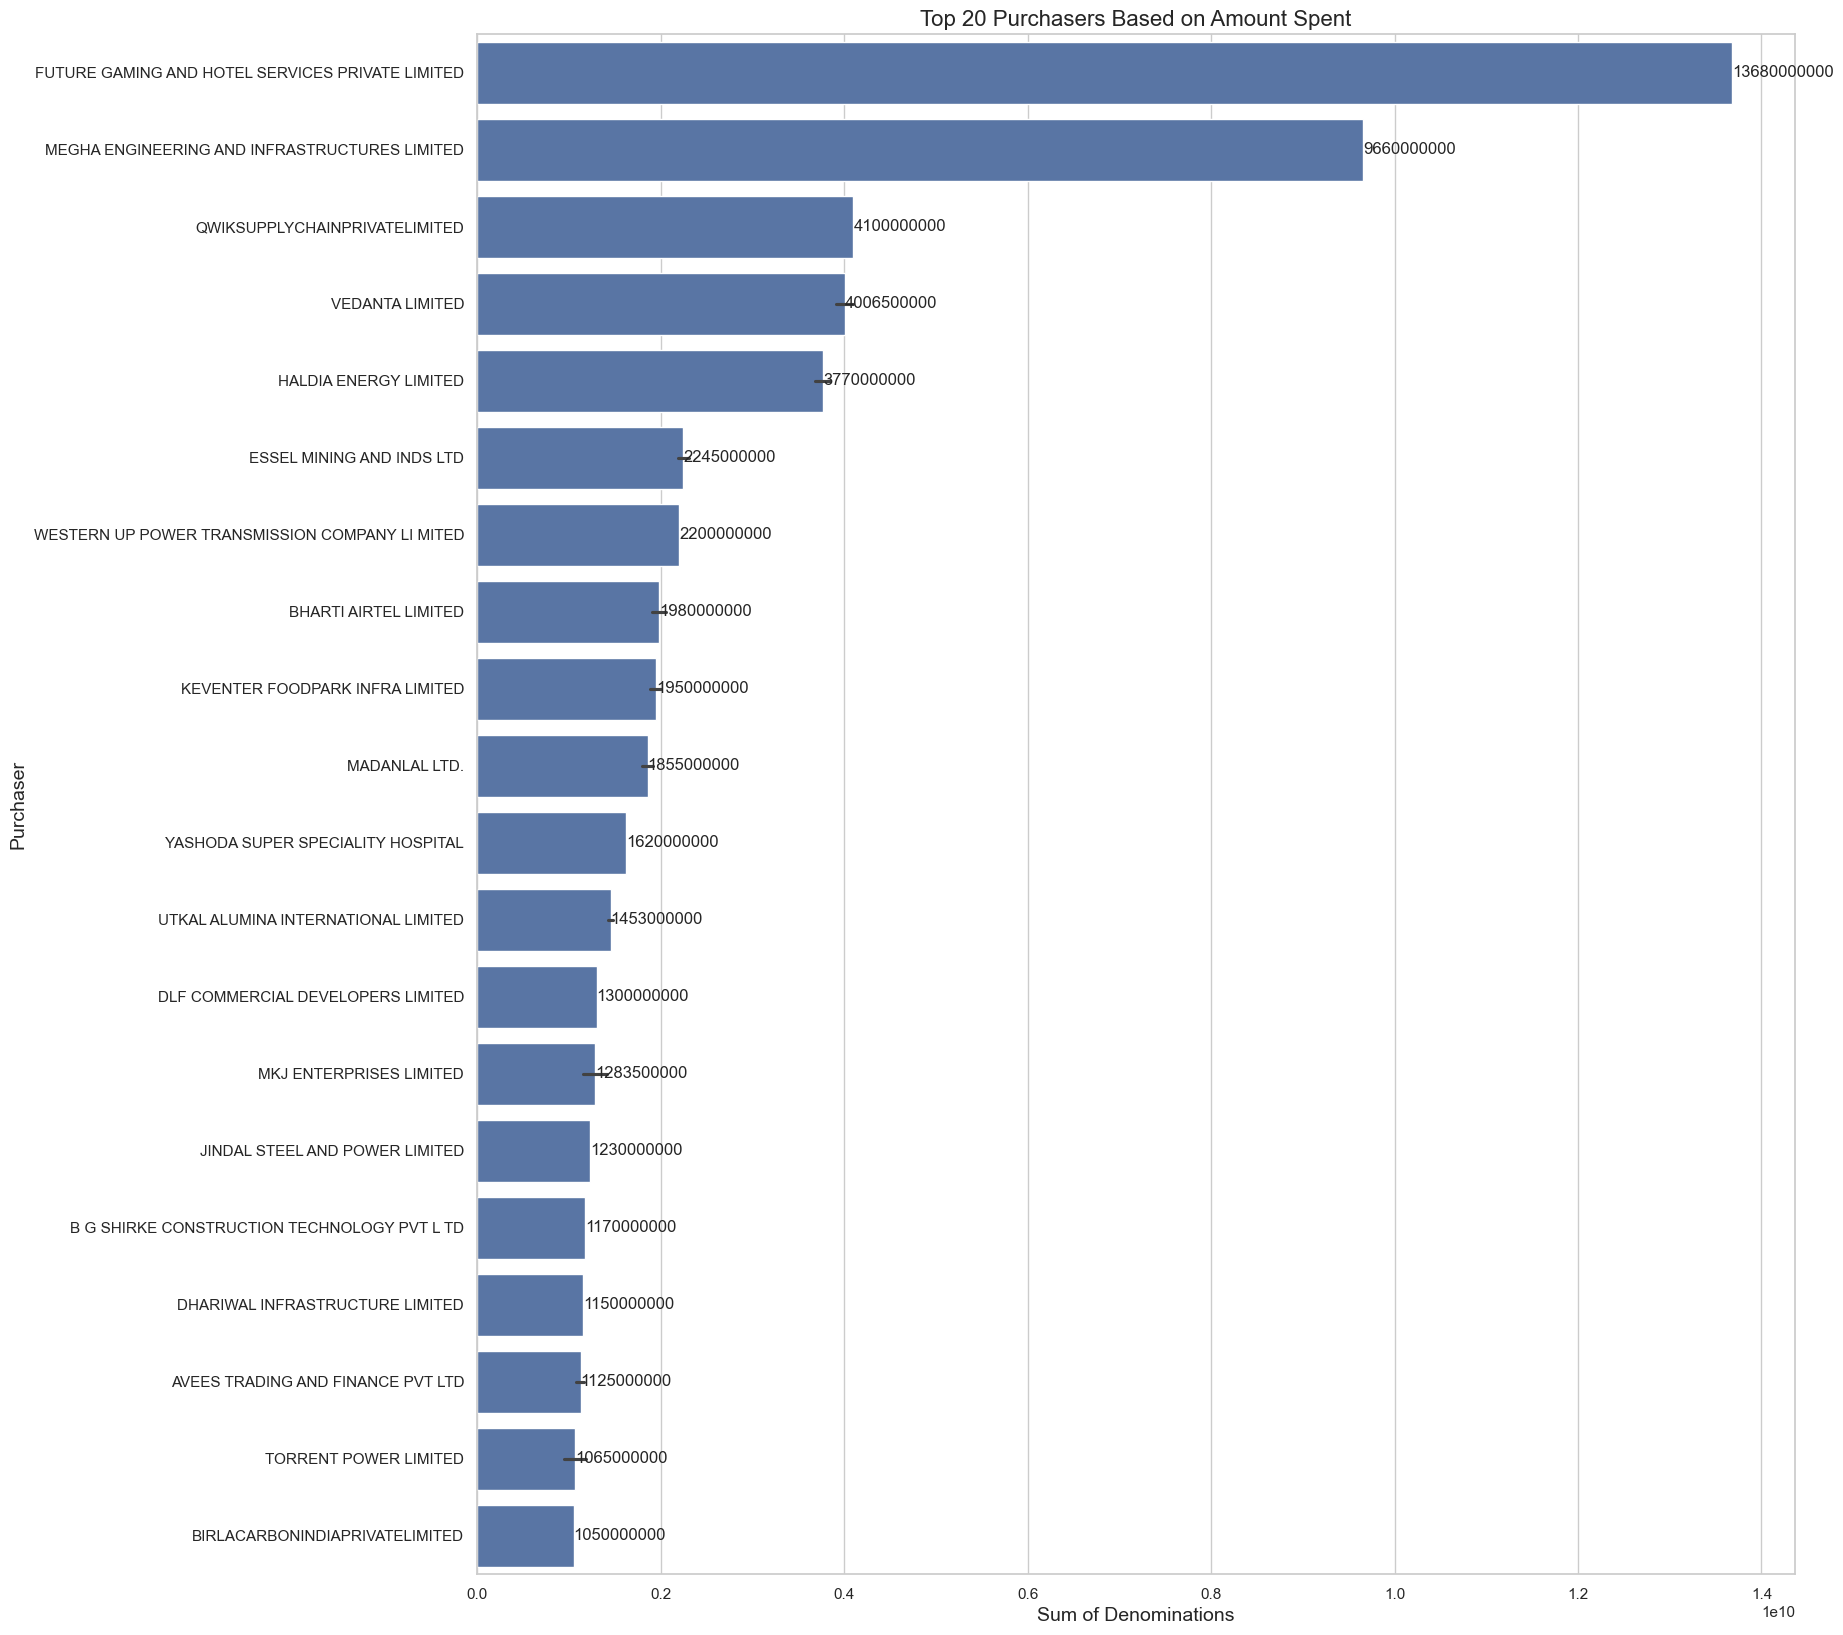

In [440]:
# Calculate the top 20 purchasers based on sum of denominations
top_purchasers = complete_data.groupby('Purchaser')['Denomination'].sum().nlargest(20).index

# Filter the DataFrame to include only the top 20 purchasers
filtered_df = complete_data[complete_data['Purchaser'].isin(top_purchasers)]

# Create the horizontal bar plot for the top 20 purchasers based on sum of denominations
plt.figure(figsize=(17, 20))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, y='Purchaser', x='Denomination', order=top_purchasers, estimator=sum)  

# Display the sum of denominations on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

# Set plot title and labels
plt.title('Top 20 Purchasers Based on Amount Spent', fontsize=16)
plt.xlabel('Sum of Denominations', fontsize=14)
plt.ylabel('Purchaser', fontsize=14)
plt.show()

In [441]:
top_donors = list(top_purchasers)
top_donors

['FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED',
 'MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED',
 'QWIKSUPPLYCHAINPRIVATELIMITED',
 'VEDANTA LIMITED',
 'HALDIA ENERGY LIMITED',
 'ESSEL MINING AND INDS LTD',
 'WESTERN UP POWER TRANSMISSION COMPANY LI MITED',
 'BHARTI AIRTEL LIMITED',
 'KEVENTER FOODPARK INFRA LIMITED',
 'MADANLAL LTD.',
 'YASHODA SUPER SPECIALITY HOSPITAL',
 'UTKAL ALUMINA INTERNATIONAL LIMITED',
 'DLF COMMERCIAL DEVELOPERS LIMITED',
 'MKJ ENTERPRISES LIMITED',
 'JINDAL STEEL AND POWER LIMITED',
 'B G SHIRKE CONSTRUCTION TECHNOLOGY PVT L TD',
 'DHARIWAL INFRASTRUCTURE LIMITED',
 'AVEES TRADING AND FINANCE PVT LTD',
 'TORRENT POWER LIMITED',
 'BIRLACARBONINDIAPRIVATELIMITED']

### ANALYSIS ON TOP FIVE PURCHASERS

In [442]:
perfect_data.columns

Index(['Urn', 'JournalDate', 'PurchaseDate', 'ExpiryDate', 'Purchaser',
       'Prefix', 'BondNumber', 'IssueBranchCode', 'IssueTeller', 'IssueState',
       'IssueBranchCodeNo', 'IssueBranchCity', 'Unique_key', 'PurchaserYear',
       'DateEncashment', 'PartyName', 'AccountNum', 'PayBranchCode',
       'PayTeller', 'encashedyear', 'EncashedState', 'EncashedBranchCode',
       'EncashedCity', 'Denomination'],
      dtype='object')

In [443]:
filtering = perfect_data[perfect_data['Purchaser'].isin(top_purchasers)]
filtering.groupby(['Purchaser','PurchaserYear','PartyName'])['Denomination'].sum().reset_index()

Purchaser  PurchaserYear  \
0    AVEES TRADING AND FINANCE PVT LTD         2019.0   
1    AVEES TRADING AND FINANCE PVT LTD         2021.0   
2    AVEES TRADING AND FINANCE PVT LTD         2022.0   
3    AVEES TRADING AND FINANCE PVT LTD         2022.0   
4    AVEES TRADING AND FINANCE PVT LTD         2023.0   
..                                 ...            ...   
138  YASHODA SUPER SPECIALITY HOSPITAL         2022.0   
139  YASHODA SUPER SPECIALITY HOSPITAL         2022.0   
140  YASHODA SUPER SPECIALITY HOSPITAL         2022.0   
141  YASHODA SUPER SPECIALITY HOSPITAL         2023.0   
142  YASHODA SUPER SPECIALITY HOSPITAL         2023.0   

                                             PartyName  Denomination  
0                         ALL INDIA TRINAMOOL CONGRESS   240000000.0  
1                         ALL INDIA TRINAMOOL CONGRESS   150000000.0  
2                                      AAM AADMI PARTY   100000000.0  
3                                      BIJU JANATA DAL    30000000.0  
4                         ALL INDIA TRINAMOOL CONGRESS    65000000.0  
..                                                 ...           ...  
138                             BHARAT RASHTRA SAMITHI   800000000.0  
139            PRESIDENT, ALL INDIA CONGRESS COMMITTEE    70000000.0  
140  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...    10000000.0  
141                             BHARAT RASHTRA SAMITHI    90000000.0  
142            PRESIDENT, ALL INDIA CONGRESS COMMITTEE   470000000.0  

[143 rows x 4 columns]

### FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED

In [444]:
company_name =  'FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED'
company_name_data = filtering[filtering['Purchaser'] == company_name] 
company_name_data

Urn JournalDate PurchaseDate ExpiryDate  \
419    8.002020e+20  2022-01-06   2022-01-06 2022-01-20   
420    8.002020e+20  2022-01-06   2022-01-06 2022-01-20   
421    8.002020e+20  2022-01-06   2022-01-06 2022-01-20   
422    8.002020e+20  2022-01-06   2022-01-06 2022-01-20   
423    8.002020e+20  2022-01-06   2022-01-06 2022-01-20   
...             ...         ...          ...        ...   
11332  3.002020e+20  2020-10-27   2020-10-27 2020-11-10   
11334  3.002020e+20  2020-10-27   2020-10-27 2020-11-10   
11336  3.002020e+20  2020-10-27   2020-10-27 2020-11-10   
11338  3.002020e+20  2020-10-27   2020-10-27 2020-11-10   
11340  3.002020e+20  2020-10-27   2020-10-27 2020-11-10   

                                              Purchaser Prefix  BondNumber  \
419    FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     10401.0   
420    FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     10402.0   
421    FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     10403.0   
422    FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     10404.0   
423    FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC     10405.0   
...                                                 ...    ...         ...   
11332  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      9122.0   
11334  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      9124.0   
11336  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      9126.0   
11338  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      9128.0   
11340  FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED     OC      9130.0   

       IssueBranchCode  IssueTeller                 IssueState  ...  \
419              800.0    7273126.0  Tamil Nadu and Puducherry  ...   
420              800.0    7273126.0  Tamil Nadu and Puducherry  ...   
421              800.0    7273126.0  Tamil Nadu and Puducherry  ...   
422              800.0    7273126.0  Tamil Nadu and Puducherry  ...   
423              800.0    7273126.0  Tamil Nadu and Puducherry  ...   
...                ...          ...                        ...  ...   
11332            300.0    7905165.0                Maharashtra  ...   
11334            300.0    7905165.0                Maharashtra  ...   
11336            300.0    7905165.0                Maharashtra  ...   
11338            300.0    7905165.0                Maharashtra  ...   
11340            300.0    7905165.0                Maharashtra  ...   

       DateEncashment                                          PartyName  \
419        2022-01-14                       ALL INDIA TRINAMOOL CONGRESS   
420        2022-01-11                    DRAVIDA MUNNETRA KAZHAGAM (DMK)   
421        2022-01-11                    DRAVIDA MUNNETRA KAZHAGAM (DMK)   
422        2022-01-11                    DRAVIDA MUNNETRA KAZHAGAM (DMK)   
423        2022-01-11                    DRAVIDA MUNNETRA KAZHAGAM (DMK)   
...               ...                                                ...   
11332      2020-11-07  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...   
11334      2020-11-07  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...   
11336      2020-11-07  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...   
11338      2020-11-07  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...   
11340      2020-11-07  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...   

        AccountNum  PayBranchCode  PayTeller encashedyear  \
419    *******0688            1.0  3490777.0       2022.0   
420    *******8935          800.0  5614473.0       2022.0   
421    *******8935          800.0  5614473.0       2022.0   
422    *******8935          800.0  5614473.0       2022.0   
423    *******8935          800.0  5614473.0       2022.0   
...            ...            ...        ...          ...   
11332  *******6354          847.0  3382516.0       2020.0   
11334  *******6354          847.0  3382516.0       2020.0   
11336  *******6354          847.0  3382516.0       2020

In [445]:
company_amt_agg= company_name_data.groupby('PurchaserYear')['Denomination'].agg(
    Denominations_sum=('sum'),
    Denominations_count=('count')
).reset_index()
company_amt_agg

PurchaserYear  Denominations_sum  Denominations_count
0         2020.0       1.500000e+09                  150
1         2021.0       3.340000e+09                  334
2         2022.0       4.970000e+09                  497
3         2023.0       3.210000e+09                  321
4         2024.0       6.300000e+08                   63

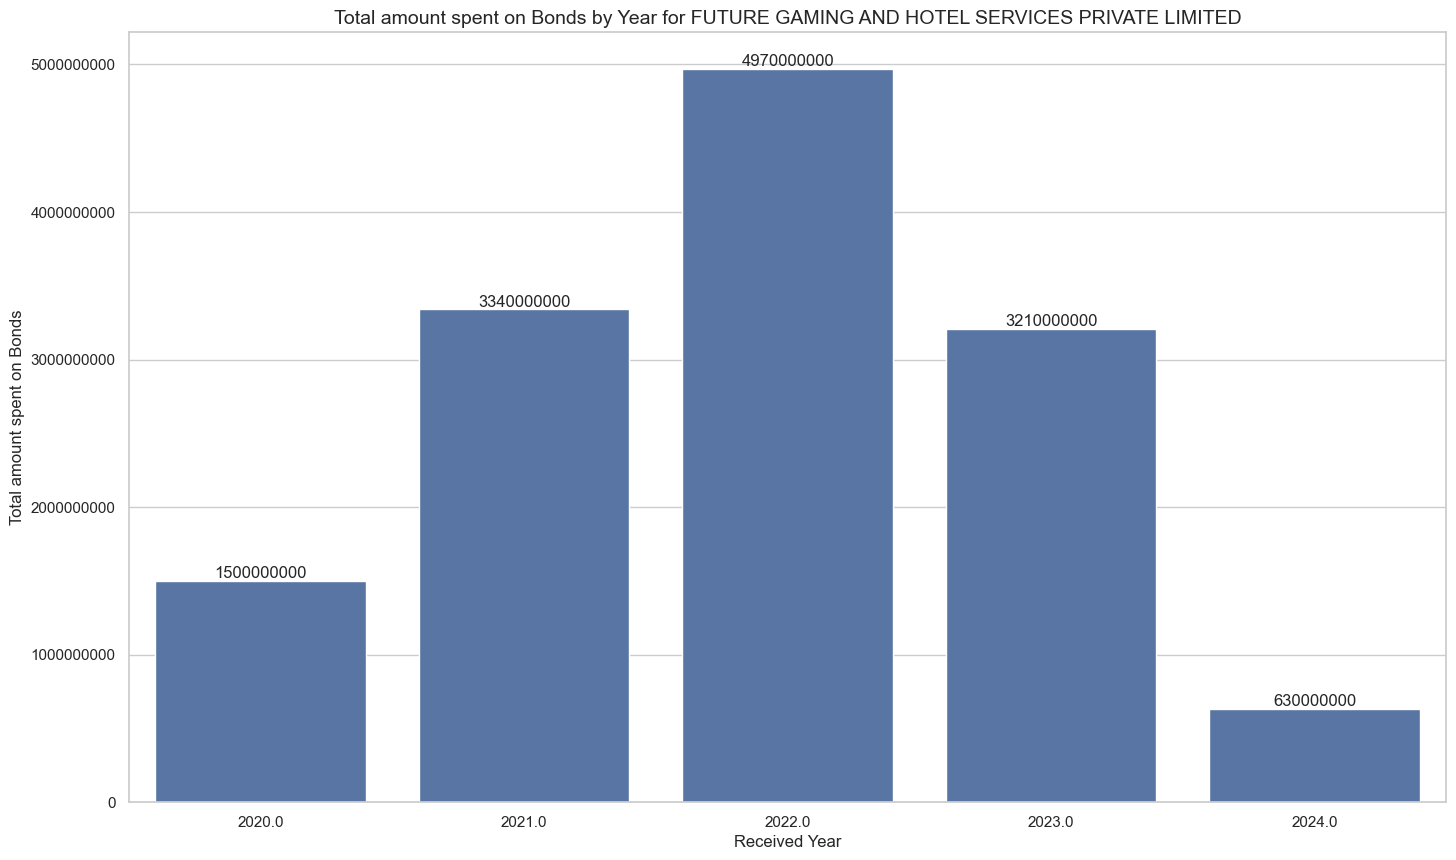

In [446]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_amt_agg, x='PurchaserYear', y='Denominations_sum')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

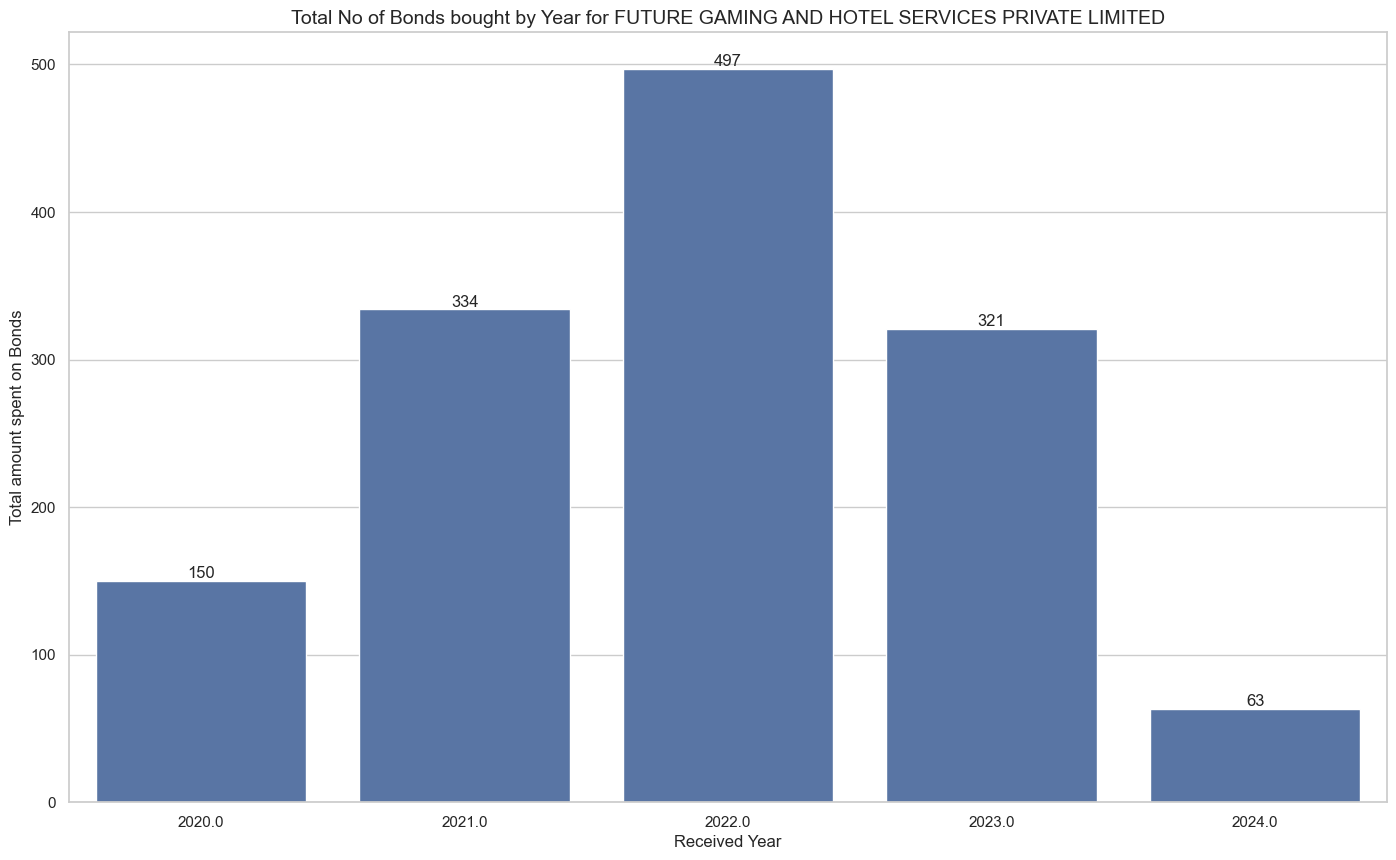

In [447]:
# Create the count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_amt_agg, x='PurchaserYear', y='Denominations_count')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total No of Bonds bought by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [448]:
# Group by 'Year' and 'PartyName', and aggregate 'Denomination' using custom names for the aggregated columns
company_amt_agg_partyname= company_name_data.groupby(['PurchaserYear', 'PartyName']).agg(
    Denominations_sum=('Denomination', 'sum'),
    Denominations_count=('Denomination', 'count')
).reset_index()

company_amt_agg_partyname

PurchaserYear                                          PartyName  \
0          2020.0                       ALL INDIA TRINAMOOL CONGRESS   
1          2020.0                    DRAVIDA MUNNETRA KAZHAGAM (DMK)   
2          2020.0  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...   
3          2021.0                       ALL INDIA TRINAMOOL CONGRESS   
4          2021.0                             BHARATIYA JANATA PARTY   
5          2021.0                    DRAVIDA MUNNETRA KAZHAGAM (DMK)   
6          2021.0  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...   
7          2022.0                       ALL INDIA TRINAMOOL CONGRESS   
8          2022.0                             BHARATIYA JANATA PARTY   
9          2022.0                    DRAVIDA MUNNETRA KAZHAGAM (DMK)   
10         2022.0                           SIKKIM KRANTIKARI MORCHA   
11         2022.0  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...   
12         2023.0                       ALL INDIA TRINAMOOL CONGRESS   
13         2023.0                    DRAVIDA MUNNETRA KAZHAGAM (DMK)   
14         2023.0            PRESIDENT, ALL INDIA CONGRESS COMMITTEE   
15         2023.0                            SIKKIM DEMOCRATIC FRONT   
16         2023.0                           SIKKIM KRANTIKARI MORCHA   
17         2024.0                       ALL INDIA TRINAMOOL CONGRESS   
18         2024.0                           SIKKIM KRANTIKARI MORCHA   

    Denominations_sum  Denominations_count  
0        1.000000e+07                    1  
1        6.000000e+08                   60  
2        8.900000e+08                   89  
3        7.600000e+08                   76  
4        5.000000e+08                   50  
5        1.480000e+09                  148  
6        6.000000e+08                   60  
7        1.850000e+09                  185  
8        5.000000e+08                   50  
9        2.550000e+09                  255  
10       2.000000e+07                    2  
11       5.000000e+07                    5  
12       2.200000e+09                  220  
13       4.000000e+08                   40  
14       5.000000e+08                   50  
15       5.000000e+07                    5  
16       6.000000e+07                    6  
17       6.000000e+08                   60  
18       3.000000e+07                    3

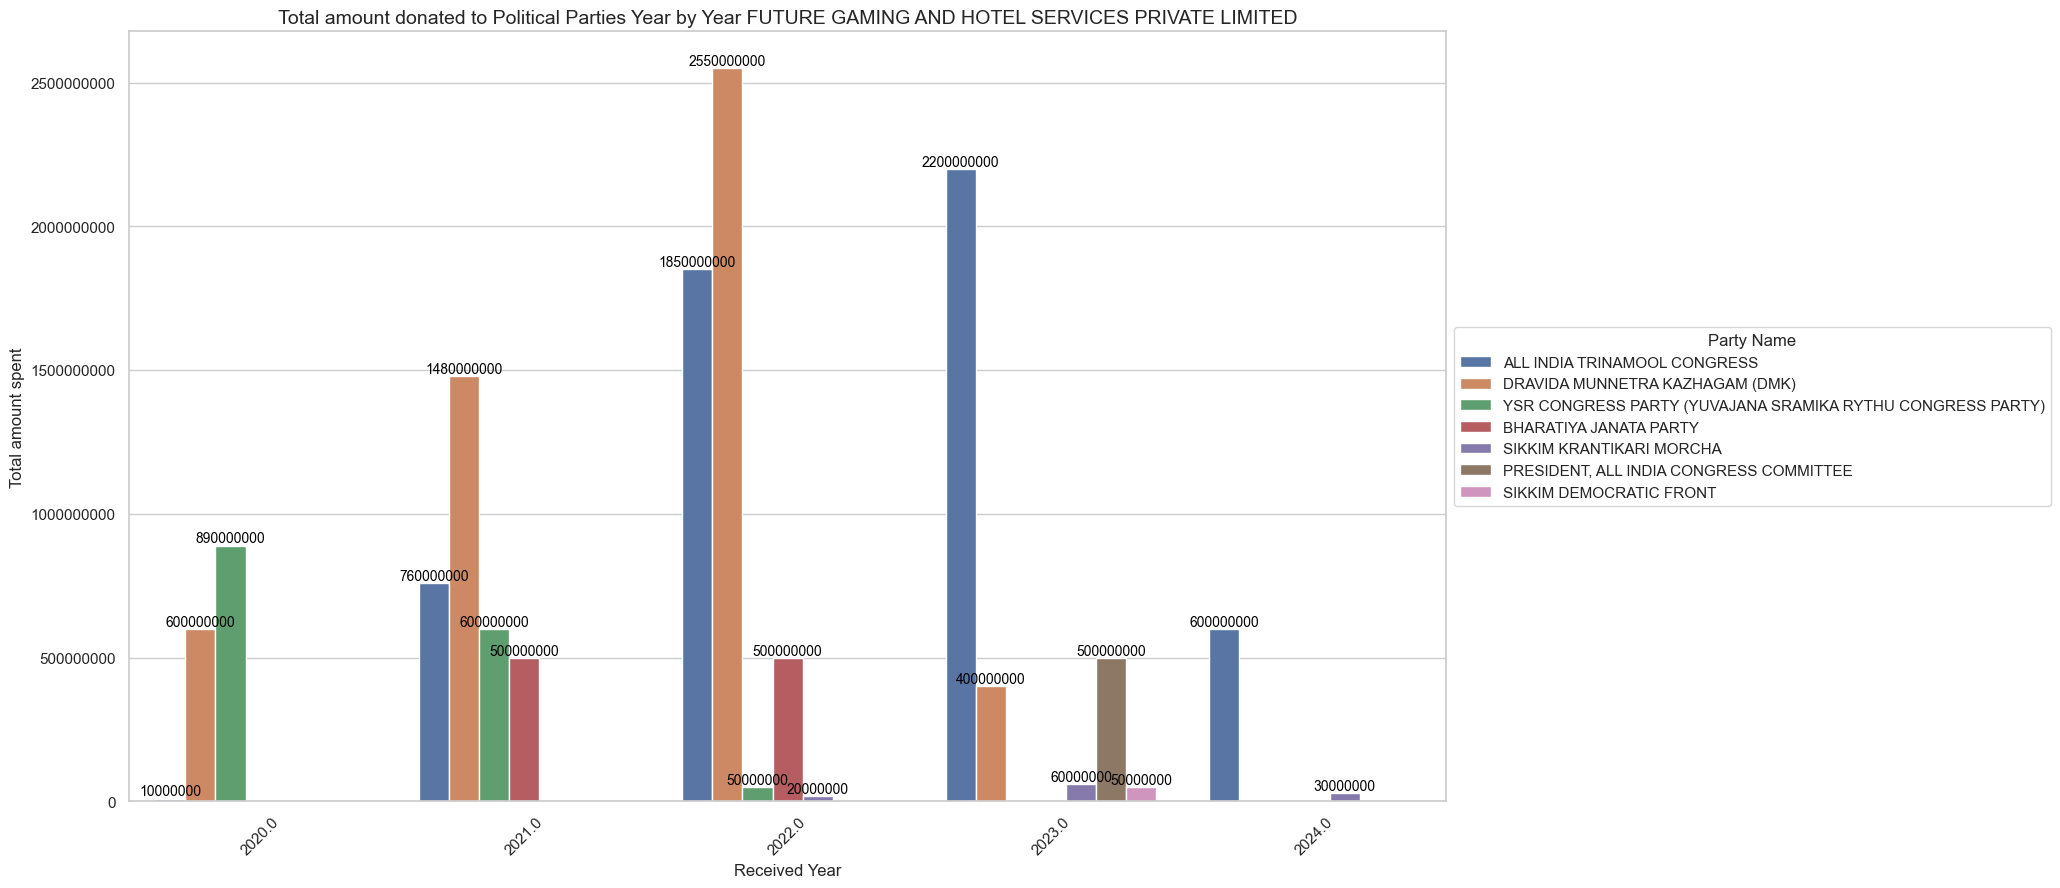

In [449]:
# Create the grouped bar plot
plt.figure(figsize=(17, 10))
ax = sns.barplot(data=company_amt_agg_partyname, x='PurchaserYear', y='Denominations_sum', hue='PartyName')

# Iterate over each container (group of bars)
for container in ax.containers:
    # Iterate over each bar in the container and add labels
    for bar in container:
        # Get the height of the bar
        height = bar.get_height()
        # Add the value label to the bar
        ax.annotate(f'{height:.0f}', 
                    (bar.get_x() + bar.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent', fontsize=12)
plt.title(f'Total amount donated to Political Parties Year by Year {company_name}', fontsize=14)

# Rotate y-axis labels by -45 degrees for better readability
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Move legend to the right and outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Party Name')

# Show the plot
plt.show()

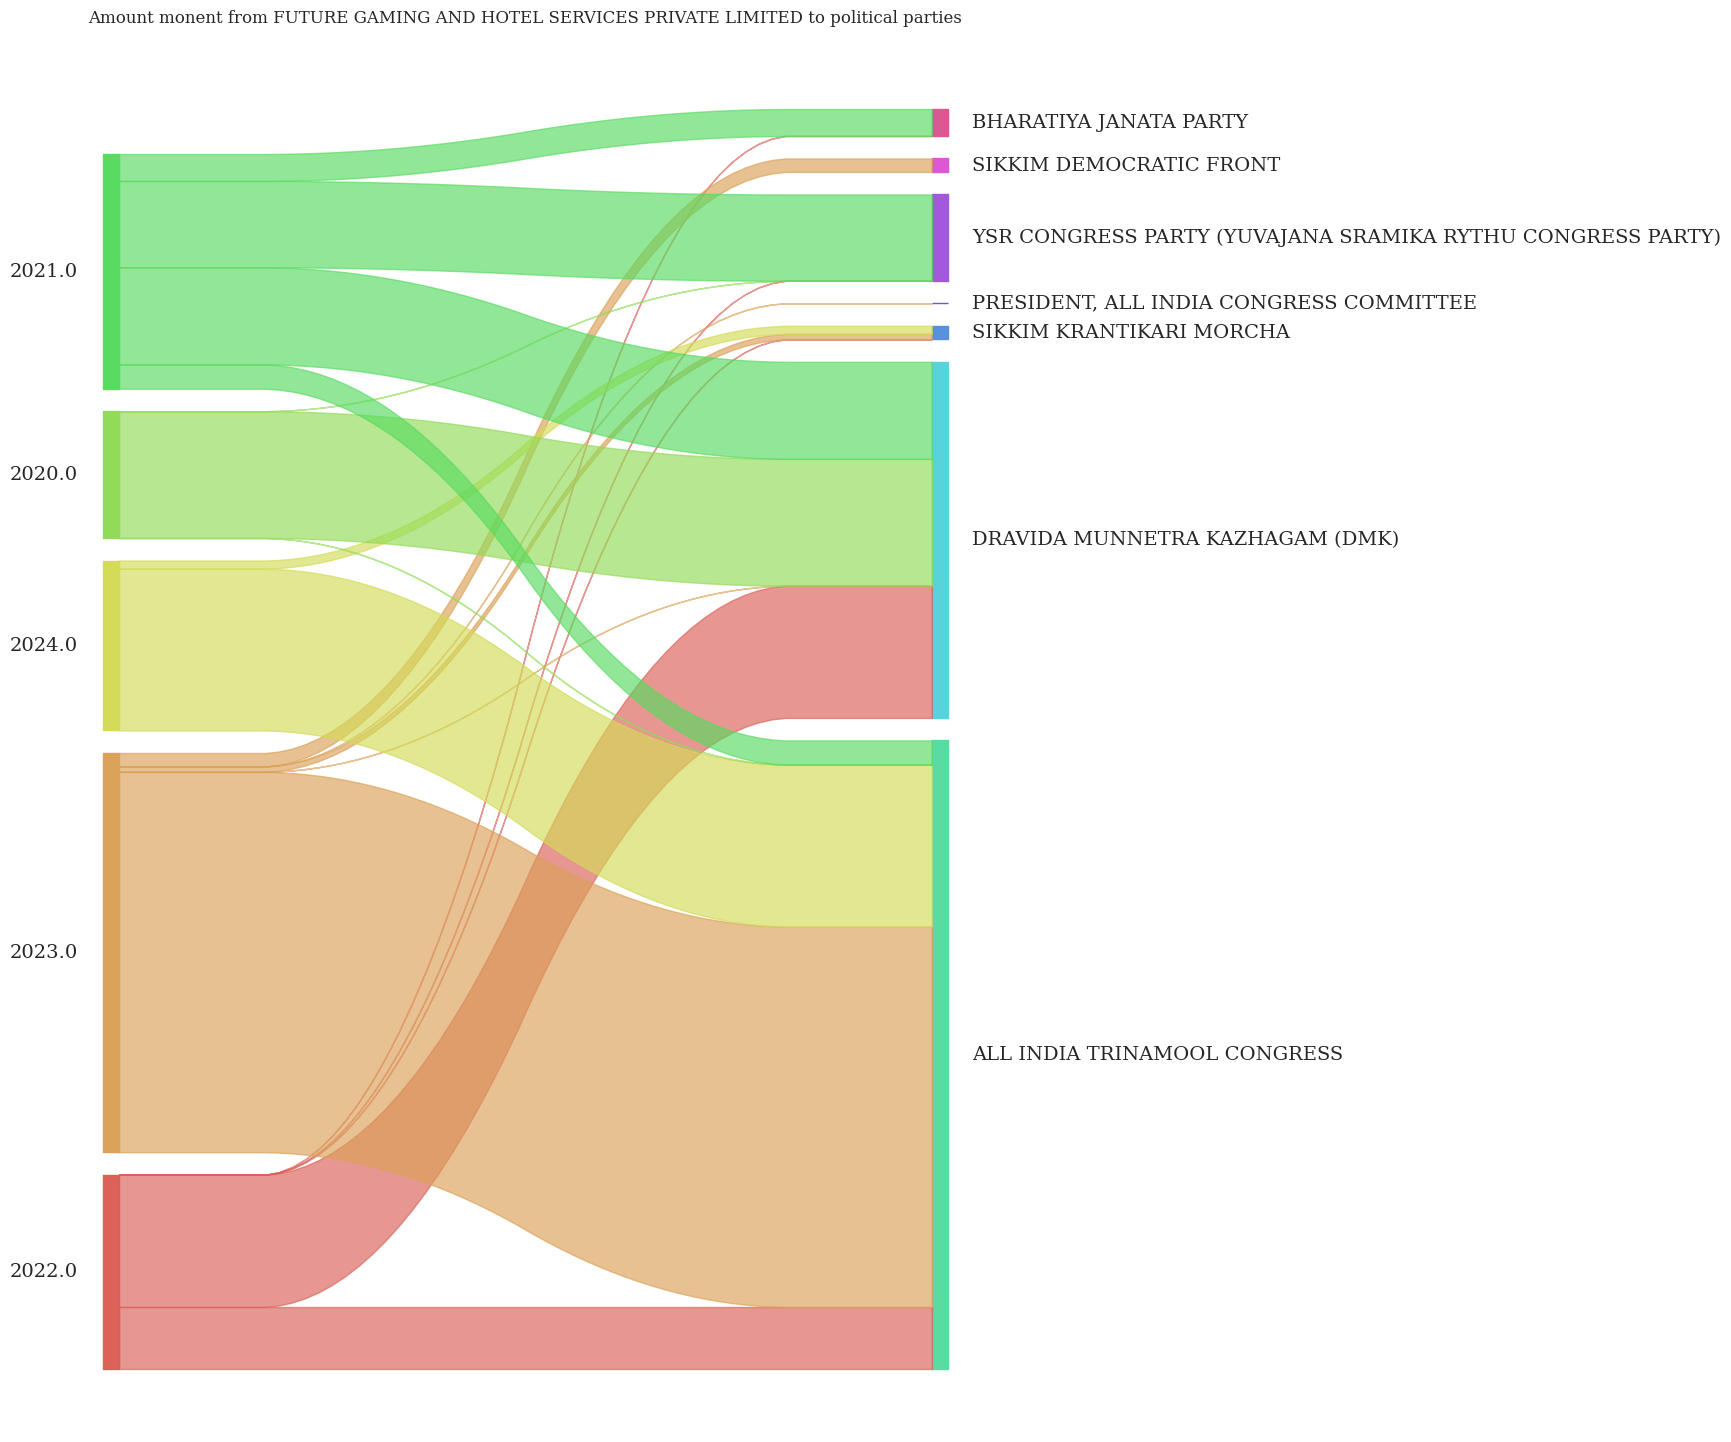

In [450]:
# Sankey chart from matplotlib
sankey(
    left        = company_name_data['PurchaserYear'],
    right       = company_name_data['PartyName'],
    leftWeight  = company_name_data['Denomination'],
    rightWeight = company_name_data['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

- FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED are mostly sponsored their electoral bonds to ALL INDIA TRINAMOOL CONGRESS in the year 2023, Secondly they priportised the DMK party.

### MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED

In [451]:
company_name =  'MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED'
company_name_data = filtering[filtering['Purchaser'] == company_name] 
company_name_data

Urn JournalDate PurchaseDate ExpiryDate  \
2102   8.472020e+20  2022-07-05   2022-07-05 2022-07-19   
2106   8.472020e+20  2022-07-05   2022-07-05 2022-07-19   
2110   8.472020e+20  2022-07-05   2022-07-05 2022-07-19   
2114   8.472020e+20  2022-07-05   2022-07-05 2022-07-19   
2116   8.472020e+20  2022-07-05   2022-07-05 2022-07-19   
...             ...         ...          ...        ...   
12134  8.472020e+20  2022-04-07   2022-04-07 2022-04-21   
12136  8.472020e+20  2022-04-07   2022-04-07 2022-04-21   
12138  8.472020e+20  2022-04-07   2022-04-07 2022-04-21   
12140  8.472020e+20  2022-04-07   2022-04-07 2022-04-21   
12142  8.472020e+20  2022-04-07   2022-04-07 2022-04-21   

                                           Purchaser Prefix  BondNumber  \
2102   MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     12085.0   
2106   MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     12089.0   
2110   MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     12093.0   
2114   MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     12097.0   
2116   MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC     12099.0   
...                                              ...    ...         ...   
12134  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC      9924.0   
12136  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC      9926.0   
12138  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC      9928.0   
12140  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC      9930.0   
12142  MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED     OC      9932.0   

       IssueBranchCode  IssueTeller IssueState  ...  DateEncashment  \
2102             847.0    3394387.0  Telangana  ...      2022-07-06   
2106             847.0    3394387.0  Telangana  ...      2022-07-06   
2110             847.0    3394387.0  Telangana  ...      2022-07-06   
2114             847.0    3394387.0  Telangana  ...      2022-07-06   
2116             847.0    3394387.0  Telangana  ...      2022-07-06   
...                ...          ...        ...  ...             ...   
12134            847.0    3898296.0  Telangana  ...      2022-04-11   
12136            847.0    3898296.0  Telangana  ...      2022-04-11   
12138            847.0    3898296.0  Telangana  ...      2022-04-11   
12140            847.0    3898296.0  Telangana  ...      2022-04-11   
12142            847.0    3898296.0  Telangana  ...      2022-04-11   

                    PartyName   AccountNum  PayBranchCode  PayTeller  \
2102   BHARAT RASHTRA SAMITHI  *******7477          847.0  3889823.0   
2106   BHARAT RASHTRA SAMITHI  *******7477          847.0  3889823.0   
2110   BHARAT RASHTRA SAMITHI  *******7477          847.0  3889823.0   
2114   BHARAT RASHTRA SAMITHI  *******7477          847.0  3889823.0   
2116   BHARAT RASHTRA SAMITHI  *******7477          847.0  3889823.0   
...                       ...          ...            ...        ...   
12134  BHARAT RASHTRA SAMITHI  *******7477          847.0  6370918.0   
12136  BHARAT RASHTRA SAMITHI  *******7477          847.0  6370918.0   
12138  BHARAT RASHTRA SAMITHI  *******7477          847.0  6370918.0   
12140  BHARAT RASHTRA SAMITHI  *******7477          847.0  6370918.0   
12142  BHARAT RASHTRA SAMITHI  *******7477          847.0  6370918.0   

      encashedyear EncashedState  EncashedBranchCode  EncashedCity  \
2102        2022.0     Telangana               847.0     Hyderabad   
2106        2022.0     Telangana               847.0     Hyderabad   
2110        2022.0     Telangana               847.0     Hyderabad   
2114        2022.0     Telangana               847.0     Hyderabad   
2116        2022.0     Telangana               847.0     Hyderabad   
...            ...           ...                 ...           ...   
12134       2022.0     Telangana               847.0     Hyderabad   
12136       2022.0     Telangana               847.0     Hyderabad   
12138       2022.0     Telangana               847.0     H

In [452]:
company_amt_agg = company_name_data.groupby('PurchaserYear')['Denomination'].agg(
    Denominations_sum=('sum'),
    Denominations_count=('count')
).reset_index()
company_amt_agg

PurchaserYear  Denominations_sum  Denominations_count
0         2019.0       1.300000e+09                  130
1         2020.0       2.000000e+08                   20
2         2021.0       1.780000e+09                  178
3         2022.0       2.230000e+09                  223
4         2023.0       4.150000e+09                  415

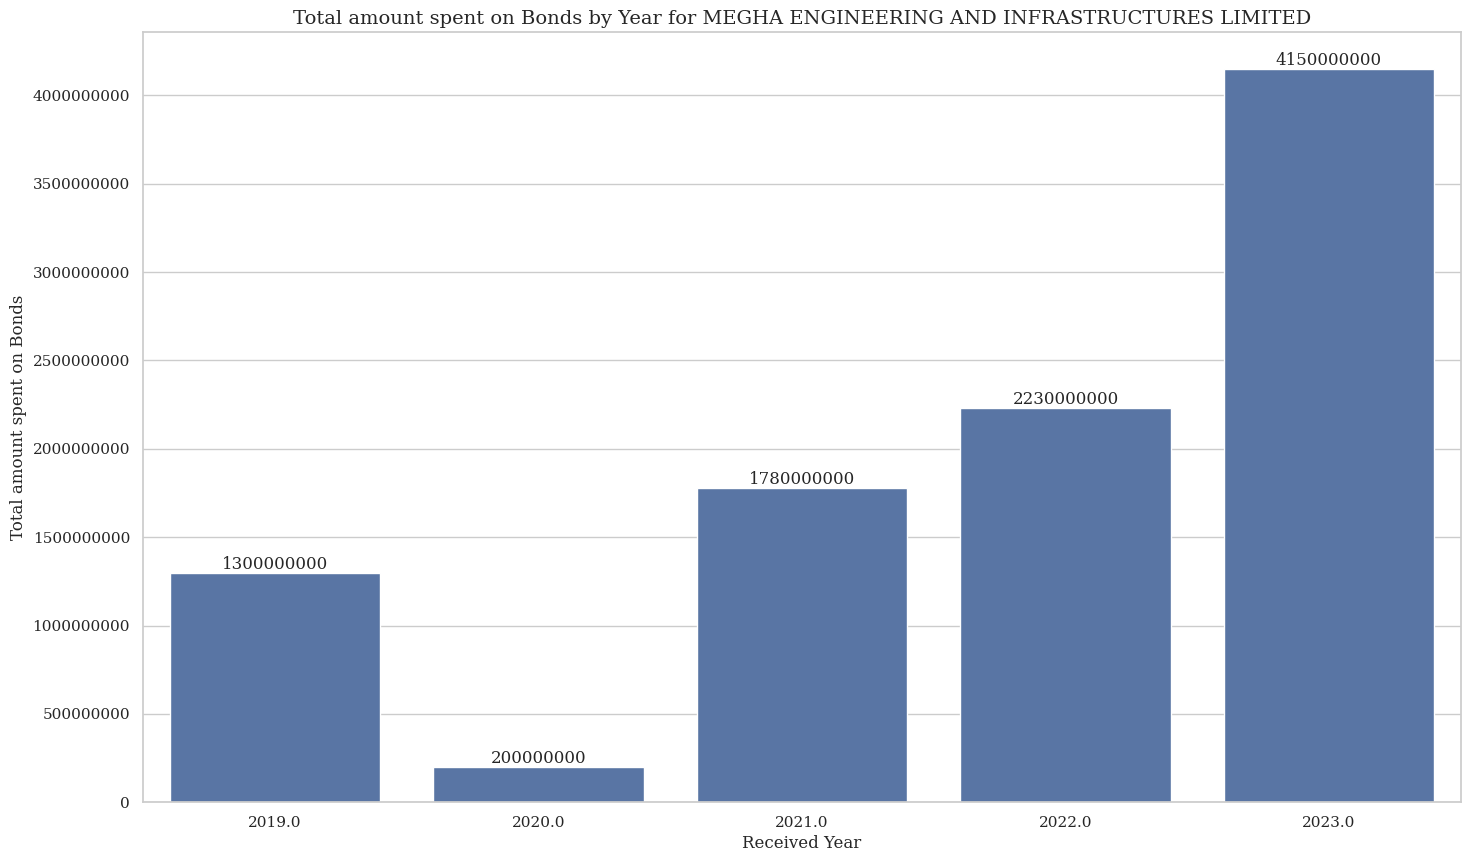

In [453]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_amt_agg, x='PurchaserYear', y='Denominations_sum')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

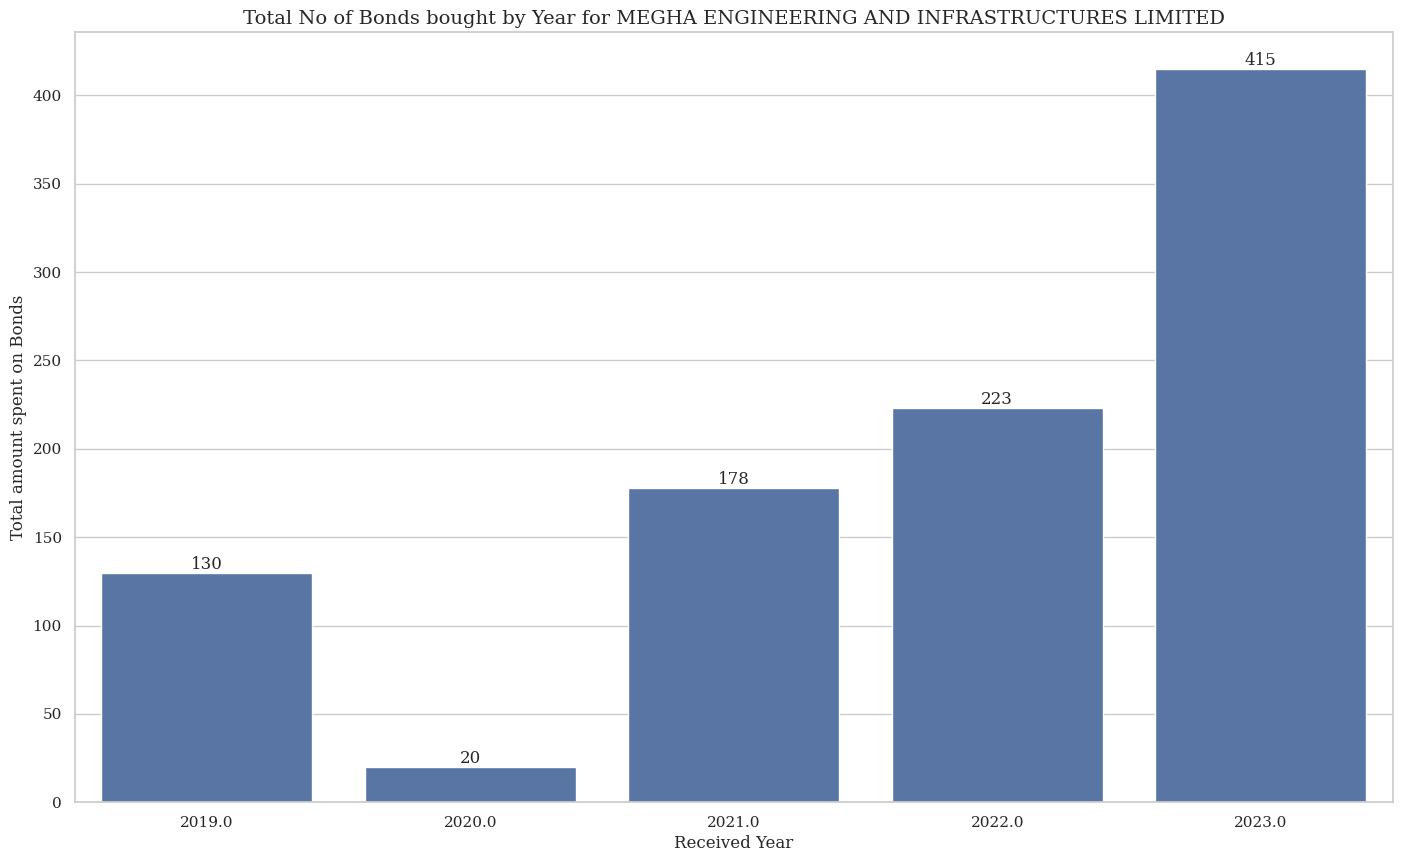

In [454]:
# Create the count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_amt_agg, x='PurchaserYear', y='Denominations_count')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total No of Bonds bought by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [455]:
# Group by 'Year' and 'PartyName', and aggregate 'Denomination' using custom names for the aggregated columns
company_amt_agg_partyname = company_name_data.groupby(['PurchaserYear', 'PartyName']).agg(
    Denominations_sum=('Denomination', 'sum'),
    Denominations_count=('Denomination', 'count')
).reset_index()

company_amt_agg_partyname

PurchaserYear                                          PartyName  \
0          2019.0                             BHARATIYA JANATA PARTY   
1          2019.0            PRESIDENT, ALL INDIA CONGRESS COMMITTEE   
2          2020.0                    DRAVIDA MUNNETRA KAZHAGAM (DMK)   
3          2021.0                             BHARAT RASHTRA SAMITHI   
4          2021.0                             BHARATIYA JANATA PARTY   
5          2021.0                    DRAVIDA MUNNETRA KAZHAGAM (DMK)   
6          2021.0            PRESIDENT, ALL INDIA CONGRESS COMMITTEE   
7          2022.0                             BHARAT RASHTRA SAMITHI   
8          2022.0                             BHARATIYA JANATA PARTY   
9          2022.0                    BIHAR PRADESH JANTA DAL(UNITED)   
10         2022.0                    DRAVIDA MUNNETRA KAZHAGAM (DMK)   
11         2022.0                                     JANASENA PARTY   
12         2022.0  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...   
13         2023.0                             BHARAT RASHTRA SAMITHI   
14         2023.0                             BHARATIYA JANATA PARTY   
15         2023.0                                     JANASENA PARTY   
16         2023.0                             JANATA DAL ( SECULAR )   
17         2023.0            PRESIDENT, ALL INDIA CONGRESS COMMITTEE   
18         2023.0                                 TELUGU DESAM PARTY   
19         2023.0  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...   

    Denominations_sum  Denominations_count  
0        1.250000e+09                  125  
1        5.000000e+07                    5  
2        2.000000e+08                   20  
3        1.000000e+09                  100  
4        3.300000e+08                   33  
5        4.000000e+08                   40  
6        5.000000e+07                    5  
7        4.500000e+08                   45  
8        1.290000e+09                  129  
9        1.000000e+08                   10  
10       2.500000e+08                   25  
11       2.000000e+07                    2  
12       1.200000e+08                   12  
13       5.000000e+08                   50  
14       2.970000e+09                  297  
15       2.000000e+07                    2  
16       5.000000e+07                    5  
17       8.000000e+07                    8  
18       2.800000e+08                   28  
19       2.500000e+08                   25

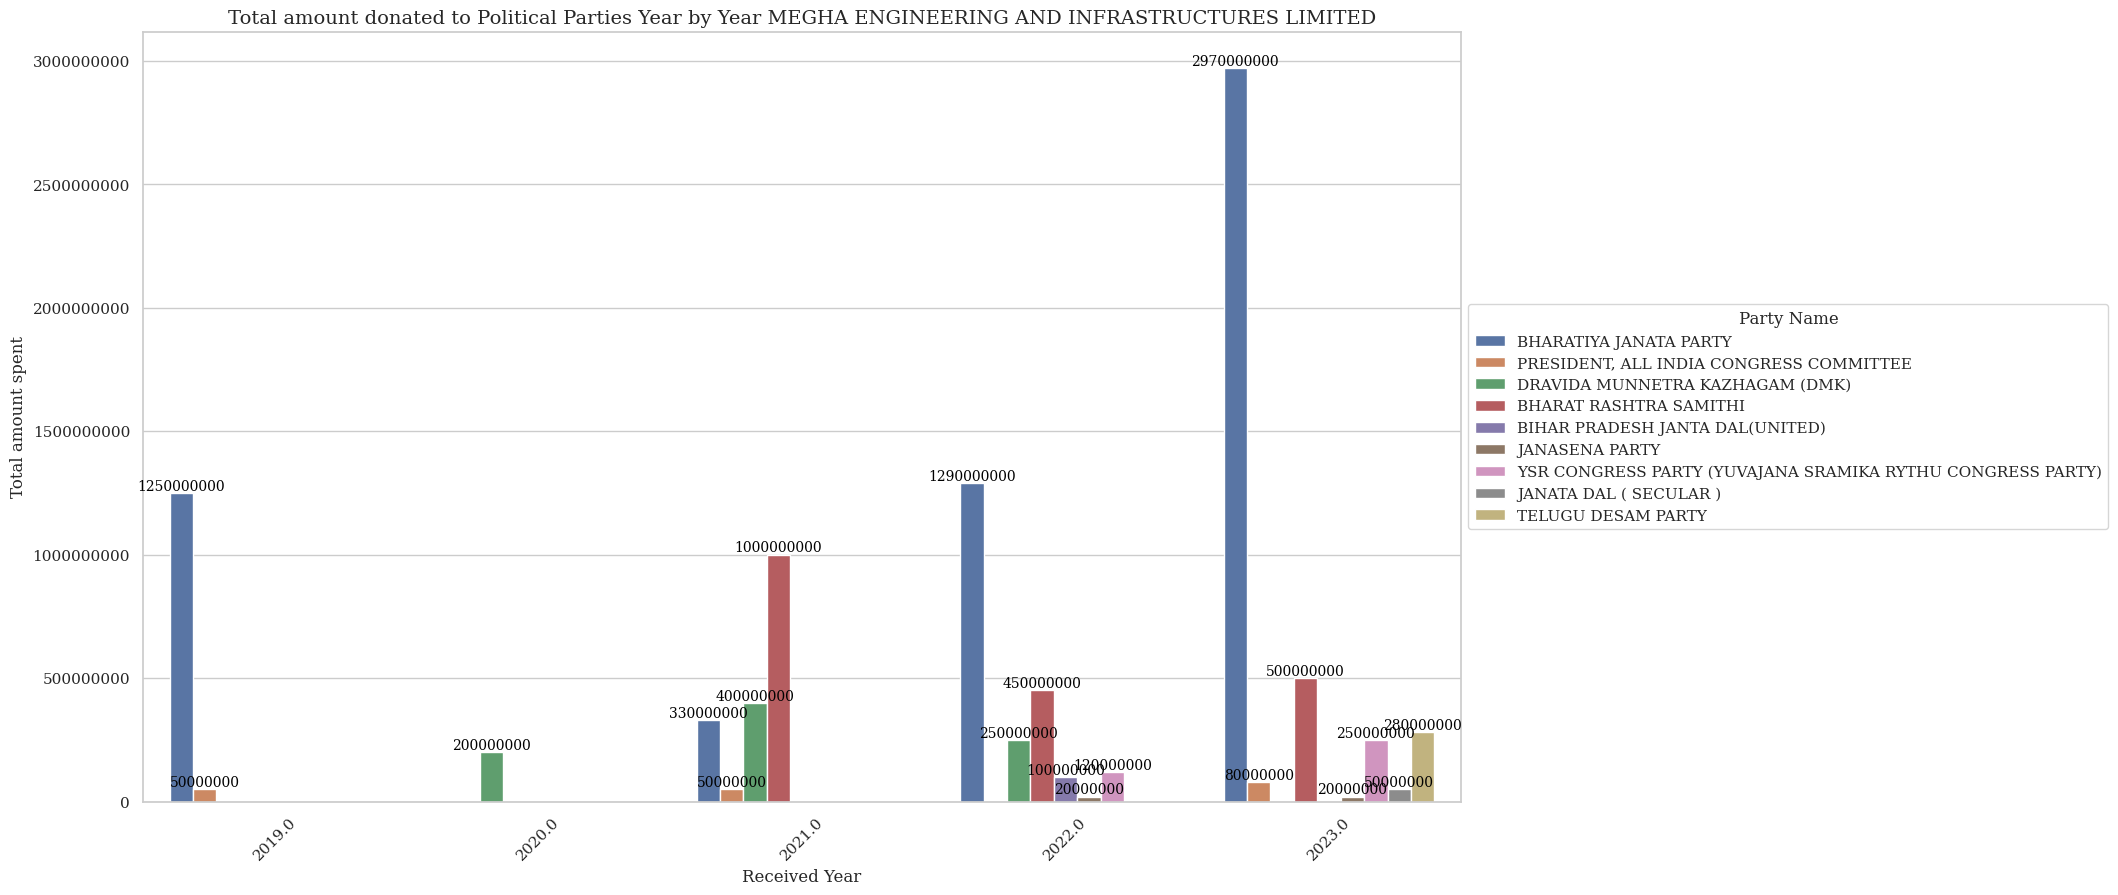

In [456]:
# Create the grouped bar plot
plt.figure(figsize=(17, 10))
ax = sns.barplot(data=company_amt_agg_partyname, x='PurchaserYear', y='Denominations_sum', hue='PartyName')

# Iterate over each container (group of bars)
for container in ax.containers:
    # Iterate over each bar in the container and add labels
    for bar in container:
        # Get the height of the bar
        height = bar.get_height()
        # Add the value label to the bar
        ax.annotate(f'{height:.0f}', 
                    (bar.get_x() + bar.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent', fontsize=12)
plt.title(f'Total amount donated to Political Parties Year by Year {company_name}', fontsize=14)

# Rotate y-axis labels by -45 degrees for better readability
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Move legend to the right and outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Party Name')

# Show the plot
plt.show()

In [459]:
# Due to some reason some of the sankeys are not working dirtectly but this problem is resolved when we are exporting the data frame to a csv file and recreating
# again as a new dataframe --> as of now I don't the reason but as a bandaid solution I am applying thisabs 
# Ensure the directory exists
directory = 'temp_files'
if not os.path.exists(directory):
    os.makedirs(directory)

# Exporting to a CSV file
company_name_data.to_csv(os.path.join(directory, 'check.csv'), index=False)

# Reimporting as a DataFrame
company_name_data = pd.read_csv(os.path.join(directory, 'check.csv'))

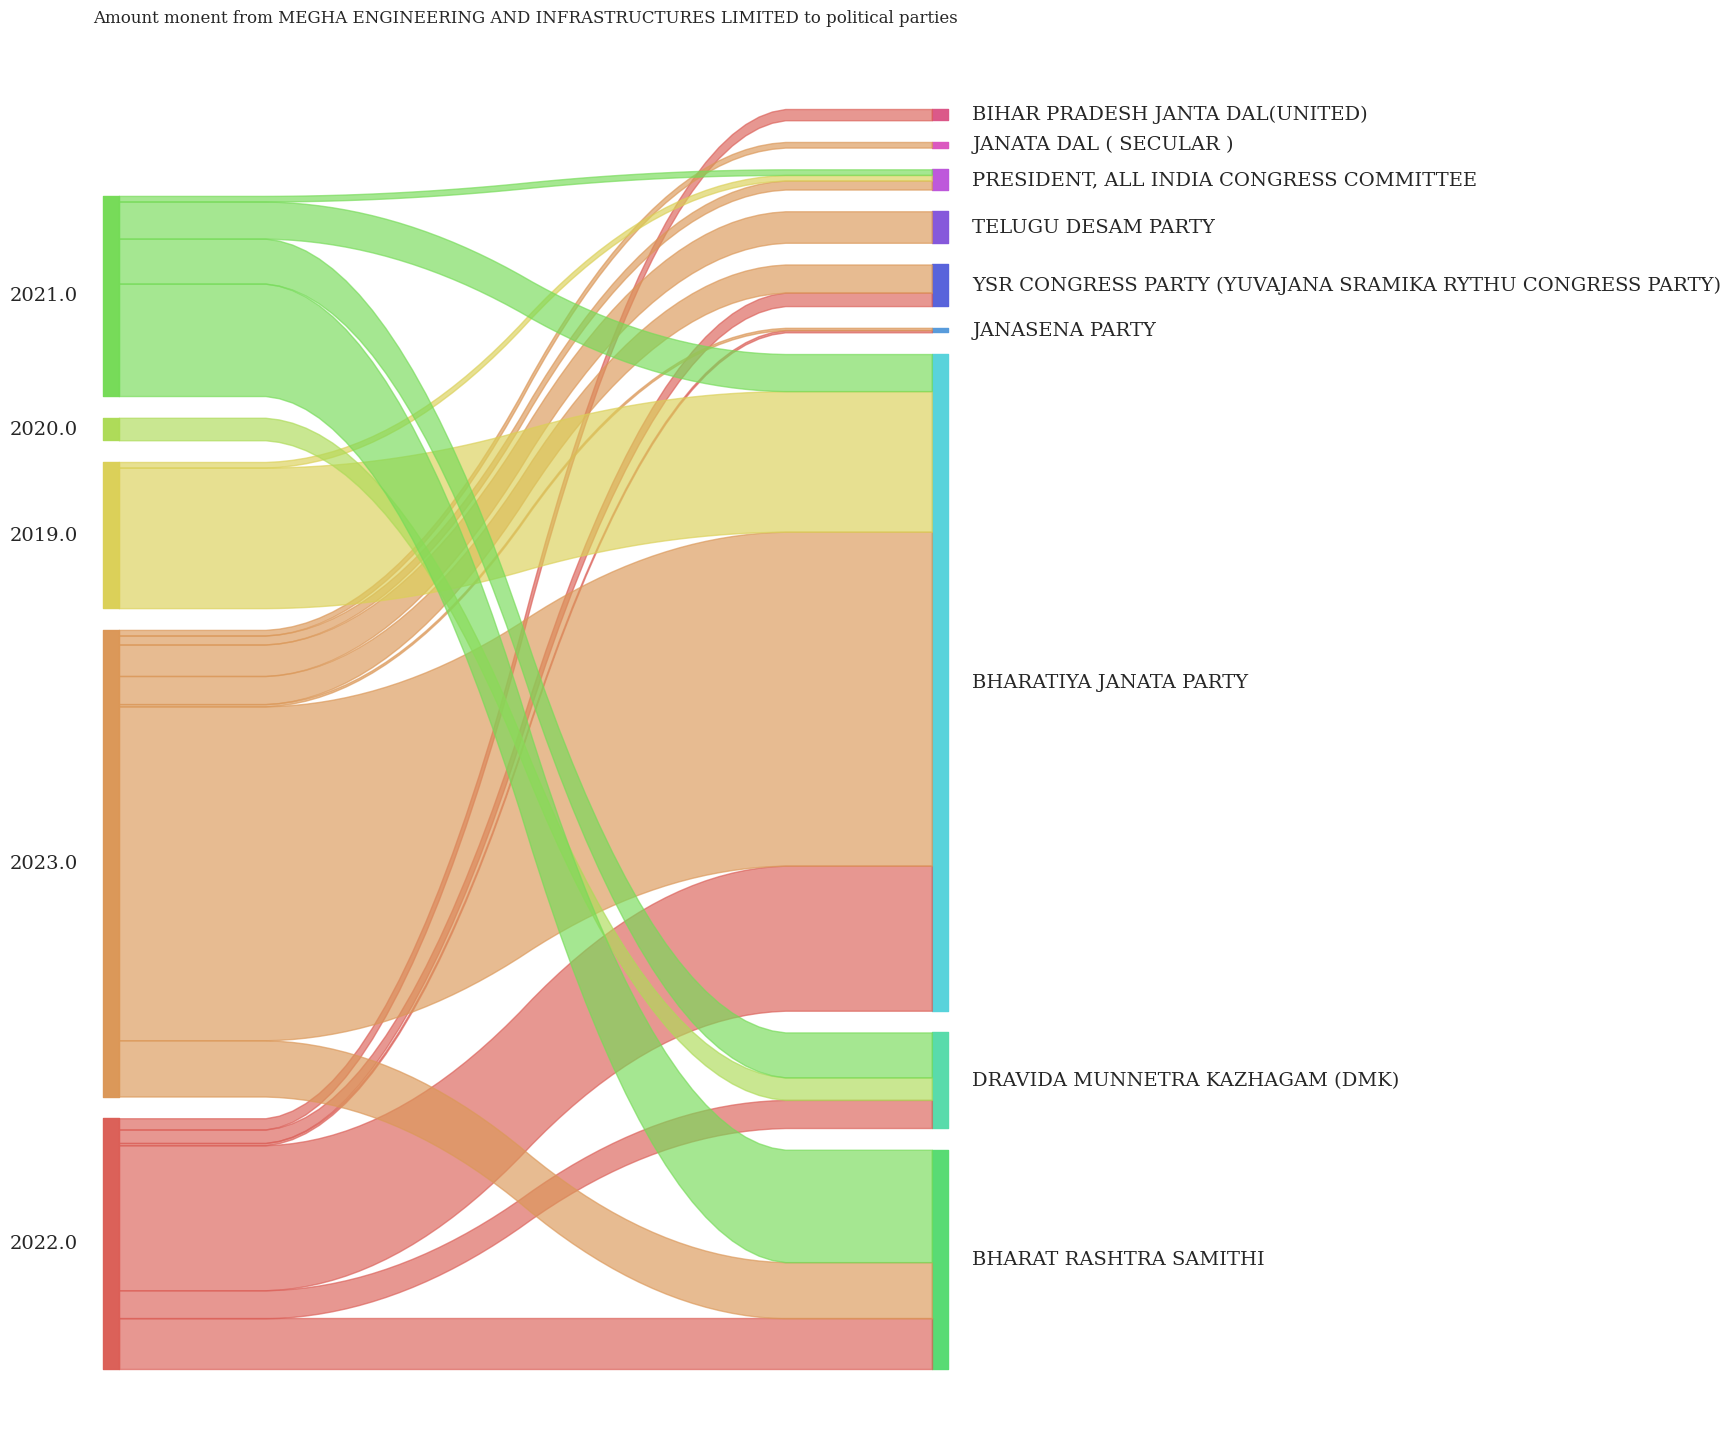

In [460]:
# Sankey chart from matplotlib
sankey(
    left        = company_name_data['PurchaserYear'],
    right       = company_name_data['PartyName'],
    leftWeight  = company_name_data['Denomination'],
    rightWeight = company_name_data['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

- MEGHA ENGINEERING AND INFRASTRUCTURES LIMITED sponsored their electoral bonds to BHARATIYA JANATA PARTY in the year 2023.

### VEDANTA LIMITED

In [461]:
company_name =  'VEDANTA LIMITED'
company_name_data = filtering[filtering['Purchaser'] == company_name] 
company_name_data

Urn JournalDate PurchaseDate ExpiryDate        Purchaser  \
1113   3.002020e+20  2022-01-10   2022-01-10 2022-01-24  VEDANTA LIMITED   
1115   3.002020e+20  2022-01-10   2022-01-10 2022-01-24  VEDANTA LIMITED   
1117   3.002020e+20  2022-01-10   2022-01-10 2022-01-24  VEDANTA LIMITED   
1119   3.002020e+20  2022-01-10   2022-01-10 2022-01-24  VEDANTA LIMITED   
1121   3.002020e+20  2022-01-10   2022-01-10 2022-01-24  VEDANTA LIMITED   
...             ...         ...          ...        ...              ...   
17107  6.912020e+20  2022-01-10   2022-01-10 2022-01-24  VEDANTA LIMITED   
17110  6.912020e+20  2022-01-10   2022-01-10 2022-01-24  VEDANTA LIMITED   
17112  6.912020e+20  2022-01-10   2022-01-10 2022-01-24  VEDANTA LIMITED   
17114  6.912020e+20  2022-01-10   2022-01-10 2022-01-24  VEDANTA LIMITED   
17116  6.912020e+20  2022-01-10   2022-01-10 2022-01-24  VEDANTA LIMITED   

      Prefix  BondNumber  IssueBranchCode  IssueTeller   IssueState  ...  \
1113      OC     11082.0            300.0    7905165.0  Maharashtra  ...   
1115      OC     11084.0            300.0    7905165.0  Maharashtra  ...   
1117      OC     11086.0            300.0    7905165.0  Maharashtra  ...   
1119      OC     11088.0            300.0    7905165.0  Maharashtra  ...   
1121      OC     11090.0            300.0    7905165.0  Maharashtra  ...   
...      ...         ...              ...          ...          ...  ...   
17107     TL     13688.0            691.0    3428540.0        Delhi  ...   
17110     TL     13690.0            691.0    3428540.0        Delhi  ...   
17112     TL     13692.0            691.0    3428540.0        Delhi  ...   
17114     TL     13694.0            691.0    3428540.0        Delhi  ...   
17116     TL     13696.0            691.0    3428540.0        Delhi  ...   

       DateEncashment               PartyName   AccountNum  PayBranchCode  \
1113       2022-01-14  BHARATIYA JANATA PARTY  *******8244          691.0   
1115       2022-01-14  BHARATIYA JANATA PARTY  *******8244          691.0   
1117       2022-01-14  BHARATIYA JANATA PARTY  *******8244          691.0   
1119       2022-01-14  BHARATIYA JANATA PARTY  *******8244          691.0   
1121       2022-01-14  BHARATIYA JANATA PARTY  *******8244          691.0   
...               ...                     ...          ...            ...   
17107      2022-01-21  BHARATIYA JANATA PARTY  *******8244          691.0   
17110      2022-01-21  BHARATIYA JANATA PARTY  *******8244          691.0   
17112      2022-01-21  BHARATIYA JANATA PARTY  *******8244          691.0   
17114      2022-01-21  BHARATIYA JANATA PARTY  *******8244          691.0   
17116      2022-01-21  BHARATIYA JANATA PARTY  *******8244          691.0   

       PayTeller encashedyear EncashedState  EncashedBranchCode  EncashedCity  \
1113   5642191.0       2022.0         Delhi               691.0     New Delhi   
1115   5642191.0       2022.0         Delhi               691.0     New Delhi   
1117   5642191.0       2022.0         Delhi               691.0     New Delhi   
1119   5642191.0       2022.0         Delhi               691.0     New Delhi   
1121   5642191.0       2022.0         Delhi               691.0     New Delhi   
...          ...          ...           ...                 ...           ...   
17107  3428540.0       2022.0         Delhi               691.0     New Delhi   
17110  3428540.0       2022.0         Delhi               691.0     New Delhi   
17112  3428540.0       2022.0         Delhi               691.0     New Delhi   
17114  3428540.0       2022.0         Delhi               691.0     New Delhi   
17116  3428540.0       2022.0         Delhi               691.0     New Delhi   

       Denomination  
1113     10000000.0  
1115     10000000.0  
1117     10000000.0  
1119     10000000.0  
1121     10000000.0  
...             ...  
17107     1000000.0  
17110     1000000.0  
17112     1000000.0  
17114     1000000.0  
17116     1000000.0  

[426 rows x 24 columns]

In [462]:
company_amt_agg= company_name_data.groupby('PurchaserYear')['Denomination'].agg(
    Denominations_sum=('sum'),
    Denominations_count=('count')
).reset_index()
company_amt_agg

PurchaserYear  Denominations_sum  Denominations_count
0         2019.0       5.265000e+08                   63
1         2021.0       2.500000e+08                   25
2         2022.0       2.527000e+09                  268
3         2023.0       7.000000e+08                   70

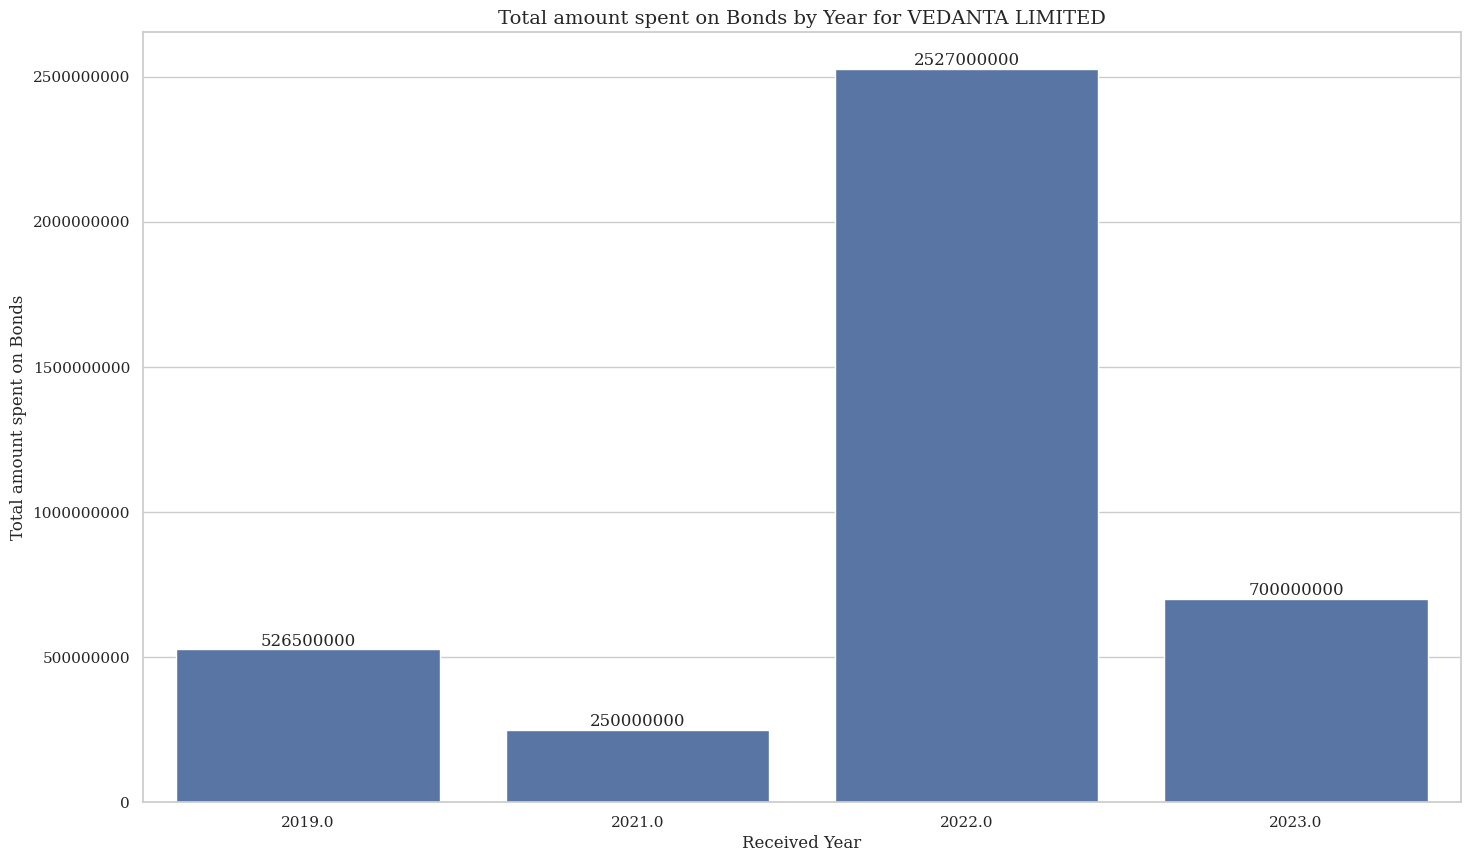

In [463]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_amt_agg, x='PurchaserYear', y='Denominations_sum')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

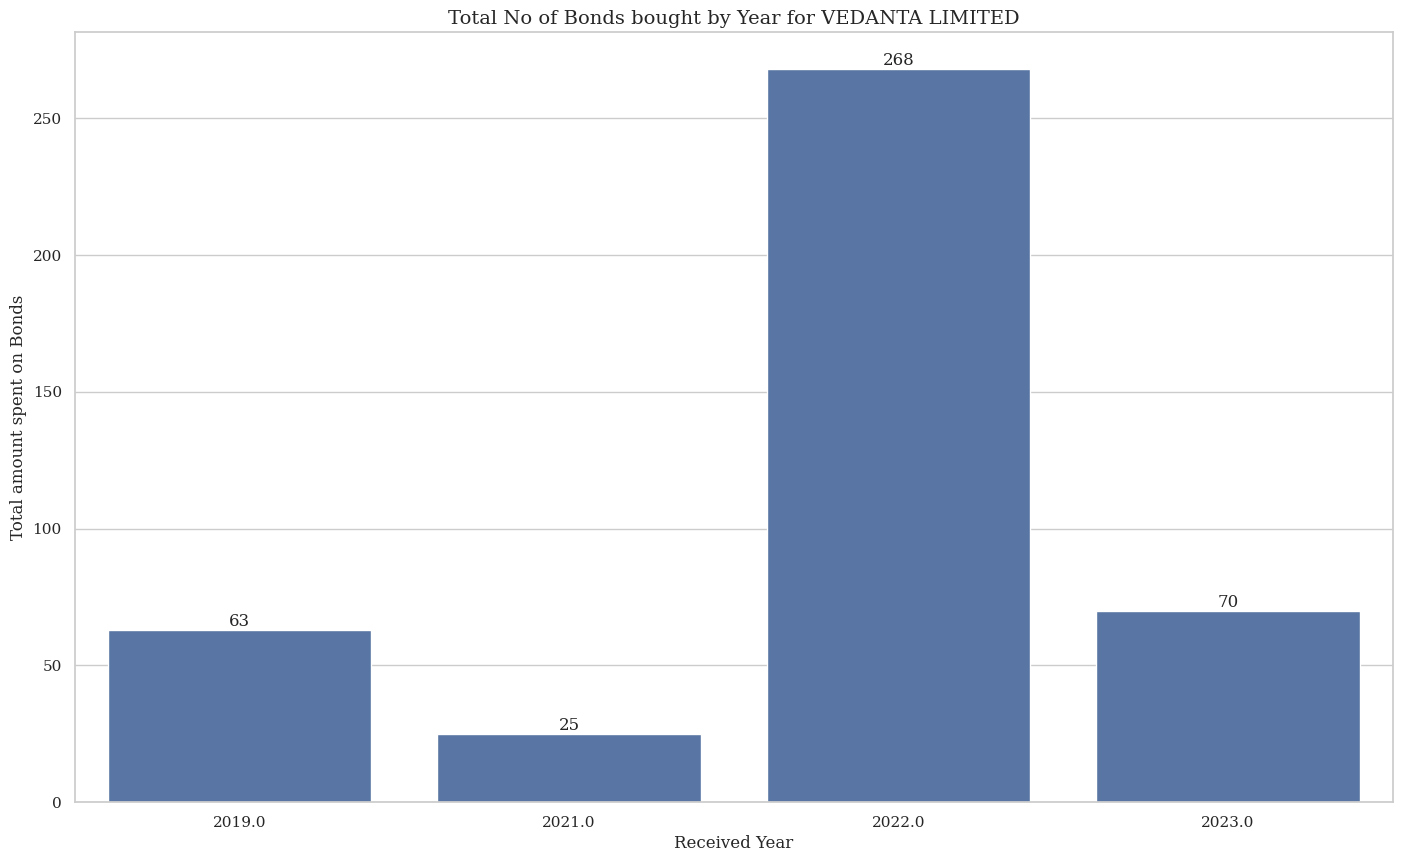

In [464]:
# Create the count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_amt_agg, x='PurchaserYear', y='Denominations_count')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total No of Bonds bought by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [466]:
# Group by 'Year' and 'PartyName', and aggregate 'Denomination' using custom names for the aggregated columns
company_amt_agg_partyname = company_name_data.groupby(['PurchaserYear', 'PartyName']).agg(
    Denominations_sum=('Denomination', 'sum'),
    Denominations_count=('Denomination', 'count')
).reset_index()

company_amt_agg_partyname

PurchaserYear                                PartyName  Denominations_sum  \
0         2019.0                   BHARATIYA JANATA PARTY       5.265000e+08   
1         2021.0  PRESIDENT, ALL INDIA CONGRESS COMMITTEE       2.500000e+08   
2         2022.0             ALL INDIA TRINAMOOL CONGRESS       2.000000e+06   
3         2022.0                   BHARATIYA JANATA PARTY       1.765000e+09   
4         2022.0                          BIJU JANATA DAL       2.500000e+08   
5         2022.0  PRESIDENT, ALL INDIA CONGRESS COMMITTEE       5.100000e+08   
6         2023.0                   BHARATIYA JANATA PARTY       1.000000e+07   
7         2023.0                          BIJU JANATA DAL       1.500000e+08   
8         2023.0                   JHARKHAND MUKTI MORCHA       5.000000e+07   
9         2023.0  PRESIDENT, ALL INDIA CONGRESS COMMITTEE       4.900000e+08   

   Denominations_count  
0                   63  
1                   25  
2                    2  
3                  190  
4                   25  
5                   51  
6                    1  
7                   15  
8                    5  
9                   49

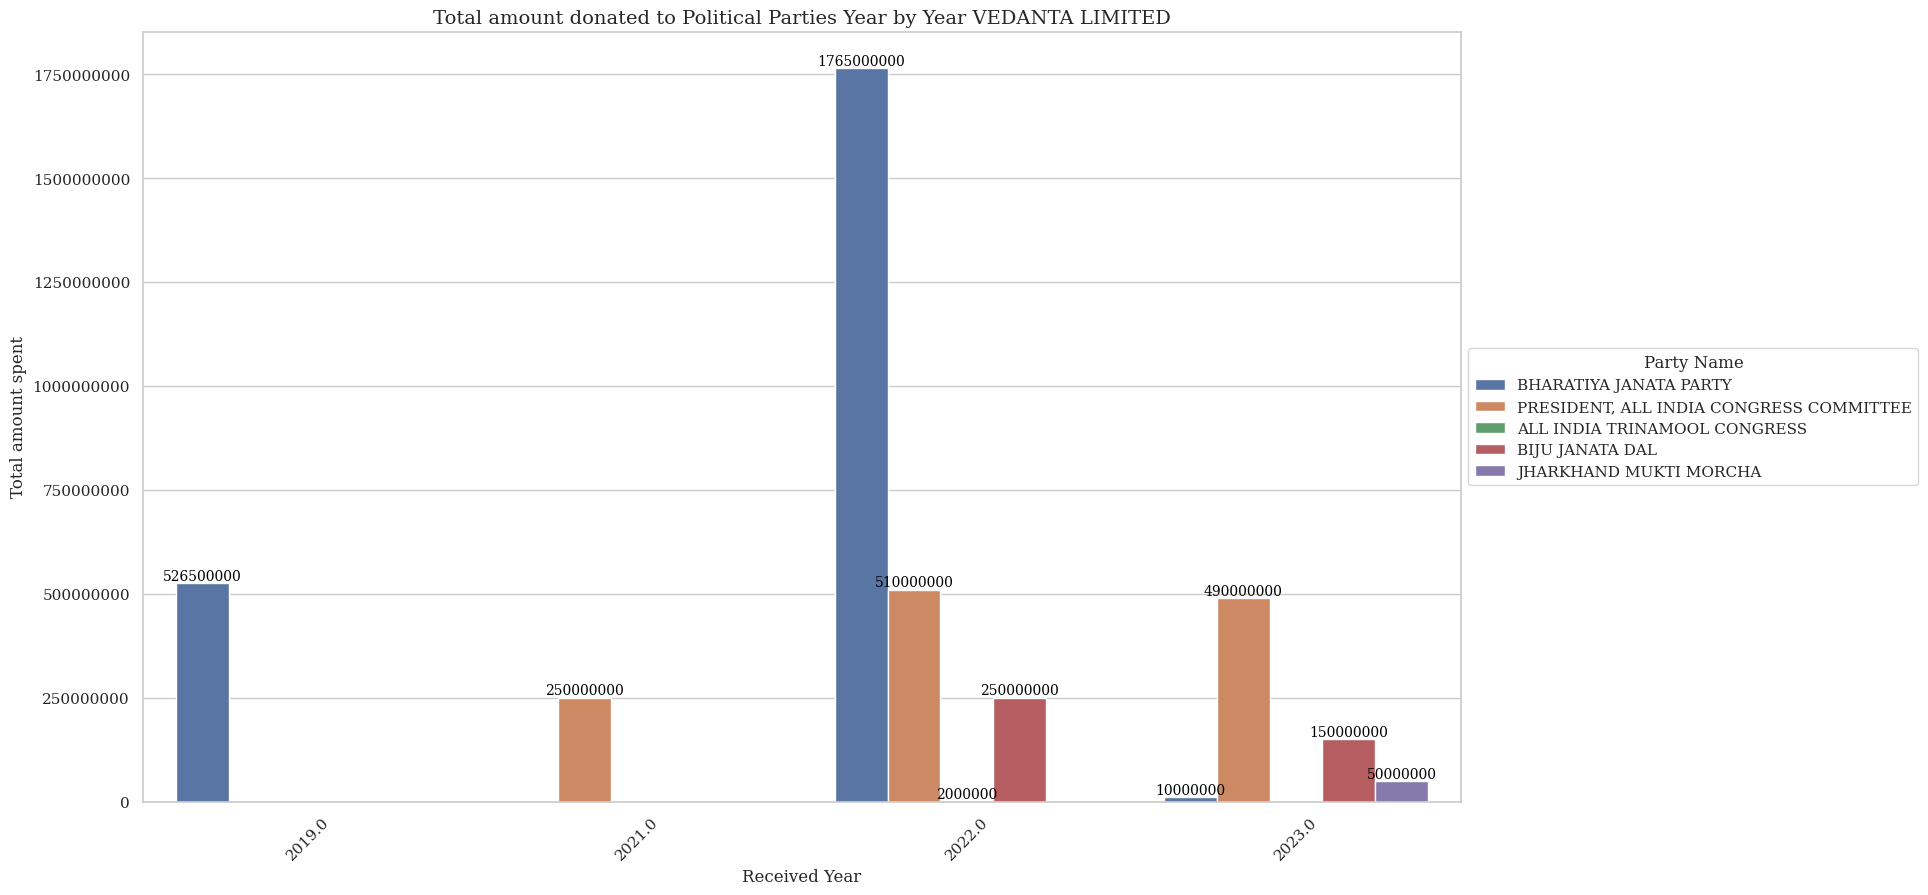

In [467]:
# Create the grouped bar plot
plt.figure(figsize=(17, 10))
ax = sns.barplot(data=company_amt_agg_partyname, x='PurchaserYear', y='Denominations_sum', hue='PartyName')

# Iterate over each container (group of bars)
for container in ax.containers:
    # Iterate over each bar in the container and add labels
    for bar in container:
        # Get the height of the bar
        height = bar.get_height()
        # Add the value label to the bar
        ax.annotate(f'{height:.0f}', 
                    (bar.get_x() + bar.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent', fontsize=12)
plt.title(f'Total amount donated to Political Parties Year by Year {company_name}', fontsize=14)

# Rotate y-axis labels by -45 degrees for better readability
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Move legend to the right and outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Party Name')

# Show the plot
plt.show()

In [478]:
# Removing the file I created which is of no use
os.remove("temp_files/check.csv")

In [479]:
# Due to some reason some of the sankeys are not working dirtectly but this problem is resolved when we are exporting the data frame to a csv file and recreating
# again as a new dataframe --> as of now I don't the reason but as a bandaid solution I am applying thisabs 
# Ensure the directory exists
directory = 'temp_files'
if not os.path.exists(directory):
    os.makedirs(directory)

# Exporting to a CSV file
company_name_data.to_csv(os.path.join(directory, 'check.csv'), index=False)

# Reimporting as a DataFrame
company_name_data = pd.read_csv(os.path.join(directory, 'check.csv'))

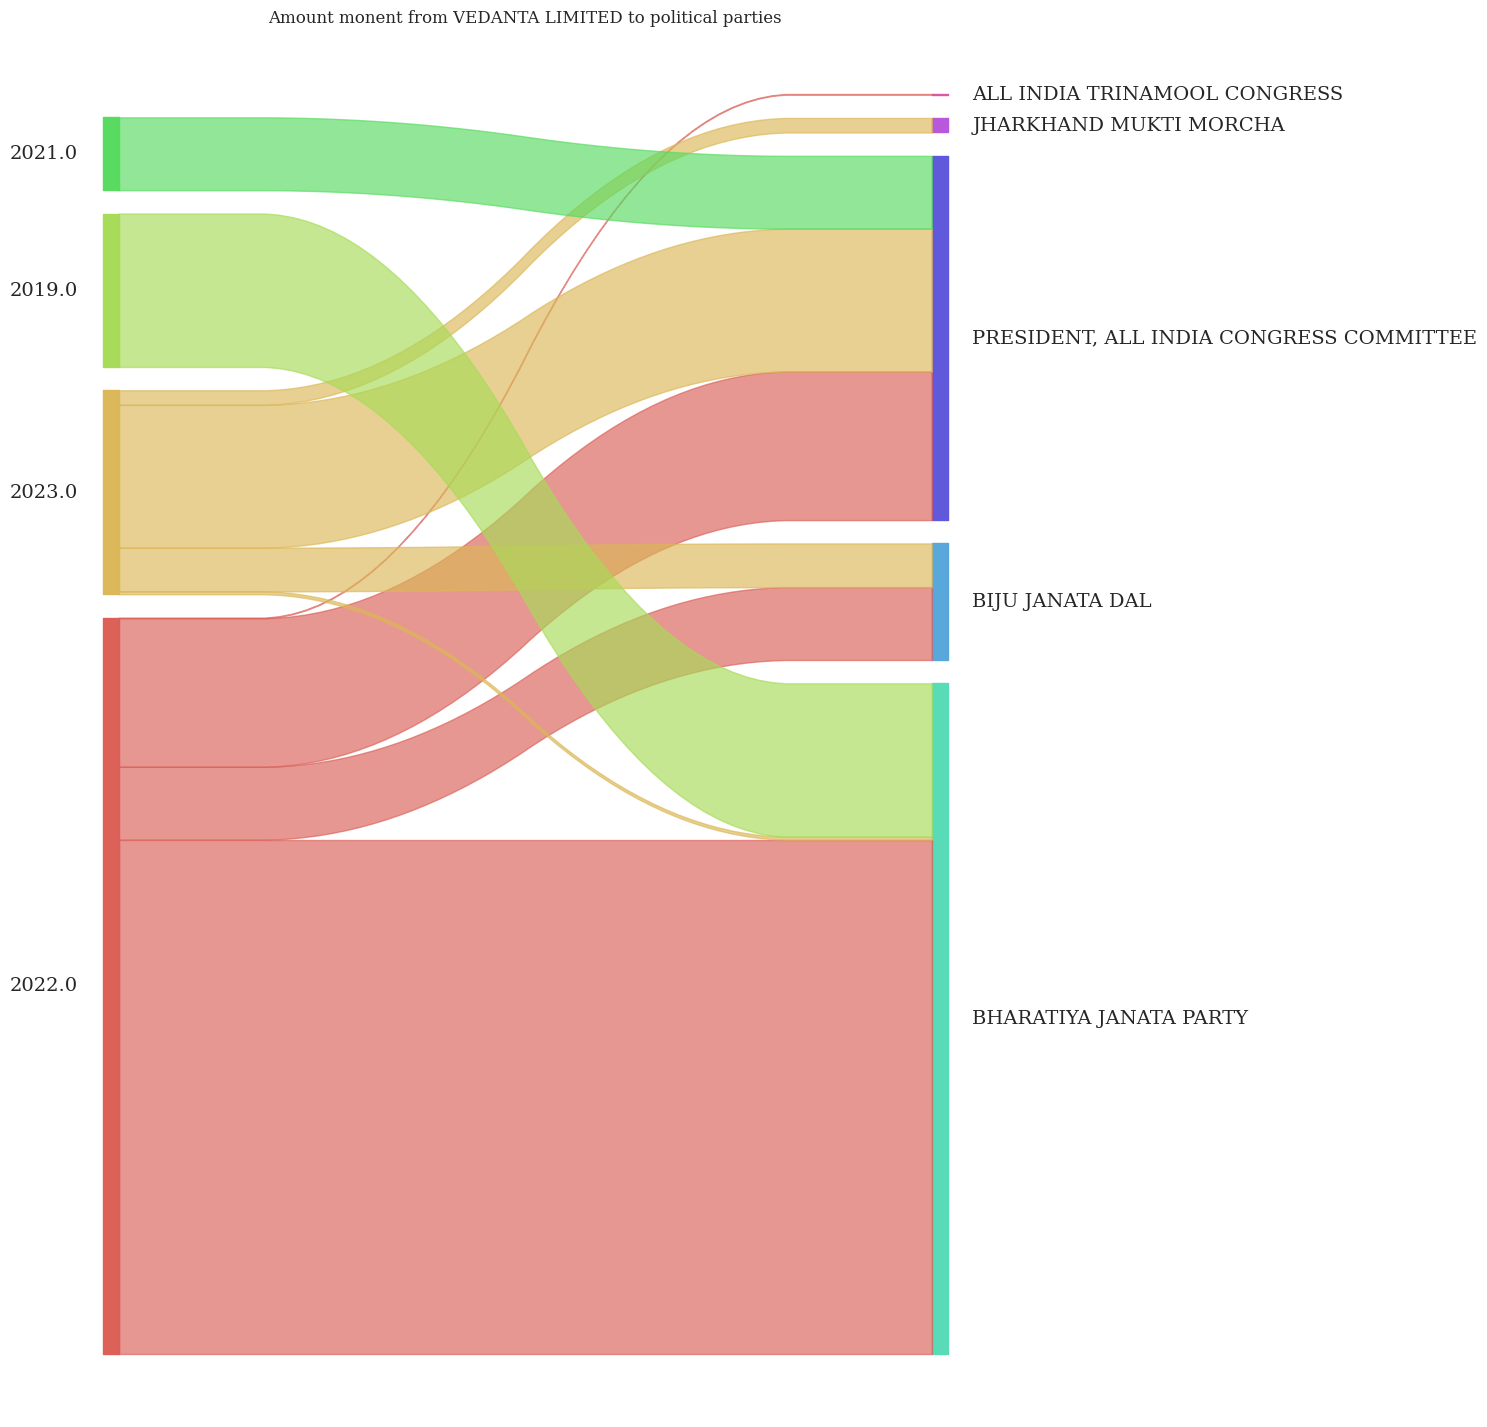

In [471]:
# Sankey chart from matplotlib
sankey(
    left        = company_name_data['PurchaserYear'],
    right       = company_name_data['PartyName'],
    leftWeight  = company_name_data['Denomination'],
    rightWeight = company_name_data['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

- VEDANTA LIMITED sponsored their electoral bonds to the BHARITIYA JANATA PARTY in the year of 2023, the highest amount of bonds has purchased and encashed in the year of 2023.


### QWIKSUPPLY CHAIN PRIVATELIMITED

In [472]:
company_name =  'QWIKSUPPLYCHAINPRIVATELIMITED' 
company_name_data = filtering[filtering['Purchaser'] == company_name] 
company_name_data

Urn JournalDate PurchaseDate ExpiryDate  \
70    3.002020e+20  2022-01-05   2022-01-05 2022-01-19   
72    3.002020e+20  2022-01-05   2022-01-05 2022-01-19   
74    3.002020e+20  2022-01-05   2022-01-05 2022-01-19   
76    3.002020e+20  2022-01-05   2022-01-05 2022-01-19   
78    3.002020e+20  2022-01-05   2022-01-05 2022-01-19   
...            ...         ...          ...        ...   
6946  3.002020e+20  2023-11-17   2023-11-17 2023-12-01   
6948  3.002020e+20  2023-11-17   2023-11-17 2023-12-01   
6950  3.002020e+20  2023-11-17   2023-11-17 2023-12-01   
6952  3.002020e+20  2023-11-17   2023-11-17 2023-12-01   
6954  3.002020e+20  2023-11-17   2023-11-17 2023-12-01   

                          Purchaser Prefix  BondNumber  IssueBranchCode  \
70    QWIKSUPPLYCHAINPRIVATELIMITED     OC     10071.0            300.0   
72    QWIKSUPPLYCHAINPRIVATELIMITED     OC     10073.0            300.0   
74    QWIKSUPPLYCHAINPRIVATELIMITED     OC     10075.0            300.0   
76    QWIKSUPPLYCHAINPRIVATELIMITED     OC     10077.0            300.0   
78    QWIKSUPPLYCHAINPRIVATELIMITED     OC     10079.0            300.0   
...                             ...    ...         ...              ...   
6946  QWIKSUPPLYCHAINPRIVATELIMITED     OC     17302.0            300.0   
6948  QWIKSUPPLYCHAINPRIVATELIMITED     OC     17304.0            300.0   
6950  QWIKSUPPLYCHAINPRIVATELIMITED     OC     17306.0            300.0   
6952  QWIKSUPPLYCHAINPRIVATELIMITED     OC     17308.0            300.0   
6954  QWIKSUPPLYCHAINPRIVATELIMITED     OC     17310.0            300.0   

      IssueTeller   IssueState  ...  DateEncashment               PartyName  \
70      7905165.0  Maharashtra  ...      2022-01-06                SHIVSENA   
72      7905165.0  Maharashtra  ...      2022-01-06                SHIVSENA   
74      7905165.0  Maharashtra  ...      2022-01-06                SHIVSENA   
76      7905165.0  Maharashtra  ...      2022-01-06                SHIVSENA   
78      7905165.0  Maharashtra  ...      2022-01-06                SHIVSENA   
...           ...          ...  ...             ...                     ...   
6946    1022034.0  Maharashtra  ...      2023-11-20  BHARATIYA JANATA PARTY   
6948    1022034.0  Maharashtra  ...      2023-11-20  BHARATIYA JANATA PARTY   
6950    1022034.0  Maharashtra  ...      2023-11-20  BHARATIYA JANATA PARTY   
6952    1022034.0  Maharashtra  ...      2023-11-20  BHARATIYA JANATA PARTY   
6954    1022034.0  Maharashtra  ...      2023-11-20  BHARATIYA JANATA PARTY   

       AccountNum  PayBranchCode  PayTeller encashedyear EncashedState  \
70    *******4444          300.0  3656179.0       2022.0   Maharashtra   
72    *******4444          300.0  3656179.0       2022.0   Maharashtra   
74    *******4444          300.0  3656179.0       2022.0   Maharashtra   
76    *******4444          300.0  3656179.0       2022.0   Maharashtra   
78    *******4444          300.0  3656179.0       2022.0   Maharashtra   
...           ...            ...        ...          ...           ...   
6946  *******8244          691.0  7516991.0       2023.0         Delhi   
6948  *******8244          691.0  7516991.0       2023.0         Delhi   
6950  *******8244          691.0  7516991.0       2023.0         Delhi   
6952  *******8244          691.0  7516991.0       2023.0         Delhi   
6954  *******8244          691.0  7516991.0       2023.0         Delhi   

      EncashedBranchCode  EncashedCity  Denomination  
70                 300.0        Mumbai    10000000.0  
72                 300.0        Mumbai    10000000.0  
74                 300.0        Mumbai    10000000.0  
76                 300.0        Mumbai    10000000.0  
78                 300.0        Mumbai    10000000.0  
...                  ...           ...           ...  
6946               691.0     New Delhi    10000000.0  
6948               691.0     New Delhi    10000000.0  
6950               691.0     New Delhi    10000000.0  
6952               691.0     

In [473]:
company_amt_agg = company_name_data.groupby('PurchaserYear')['Denomination'].agg(
    Denominations_sum=('sum'),
    Denominations_count=('count')
).reset_index()
company_amt_agg

PurchaserYear  Denominations_sum  Denominations_count
0         2022.0       3.600000e+09                  360
1         2023.0       5.000000e+08                   50

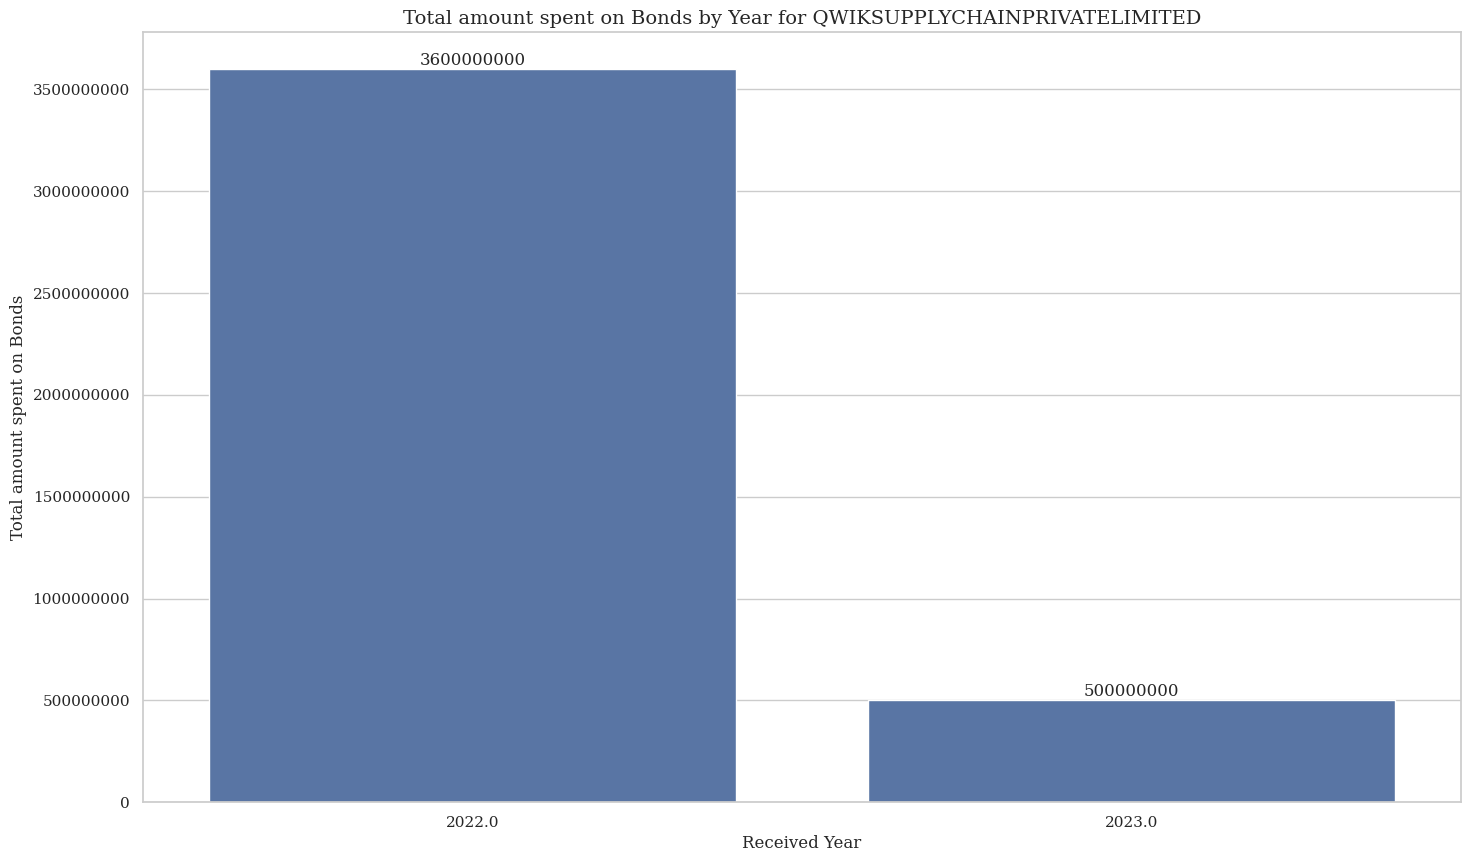

In [474]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_amt_agg, x='PurchaserYear', y='Denominations_sum')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

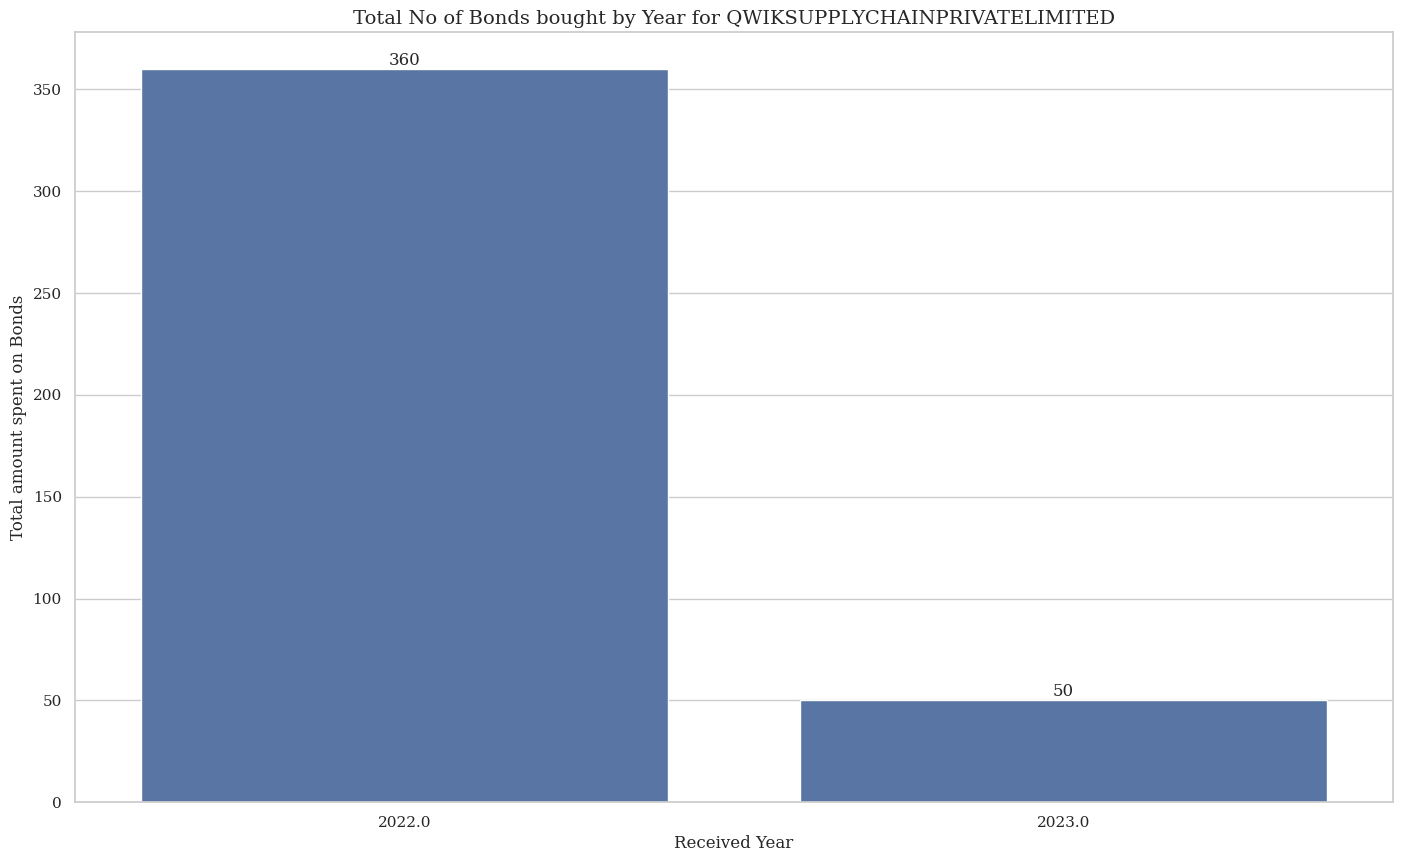

In [475]:
# Create the count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_amt_agg, x='PurchaserYear', y='Denominations_count')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total No of Bonds bought by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [476]:
# Group by 'Year' and 'PartyName', and aggregate 'Denomination' using custom names for the aggregated columns
company_amt_agg_partyname = company_name_data.groupby(['PurchaserYear', 'PartyName']).agg(
    Denominations_sum=('Denomination', 'sum'),
    Denominations_count=('Denomination', 'count')
).reset_index()

company_amt_agg_partyname

PurchaserYear                                       PartyName  \
0         2022.0                          BHARATIYA JANATA PARTY   
1         2022.0  NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH   
2         2022.0                                        SHIVSENA   
3         2023.0                          BHARATIYA JANATA PARTY   

   Denominations_sum  Denominations_count  
0       3.250000e+09                  325  
1       1.000000e+08                   10  
2       2.500000e+08                   25  
3       5.000000e+08                   50

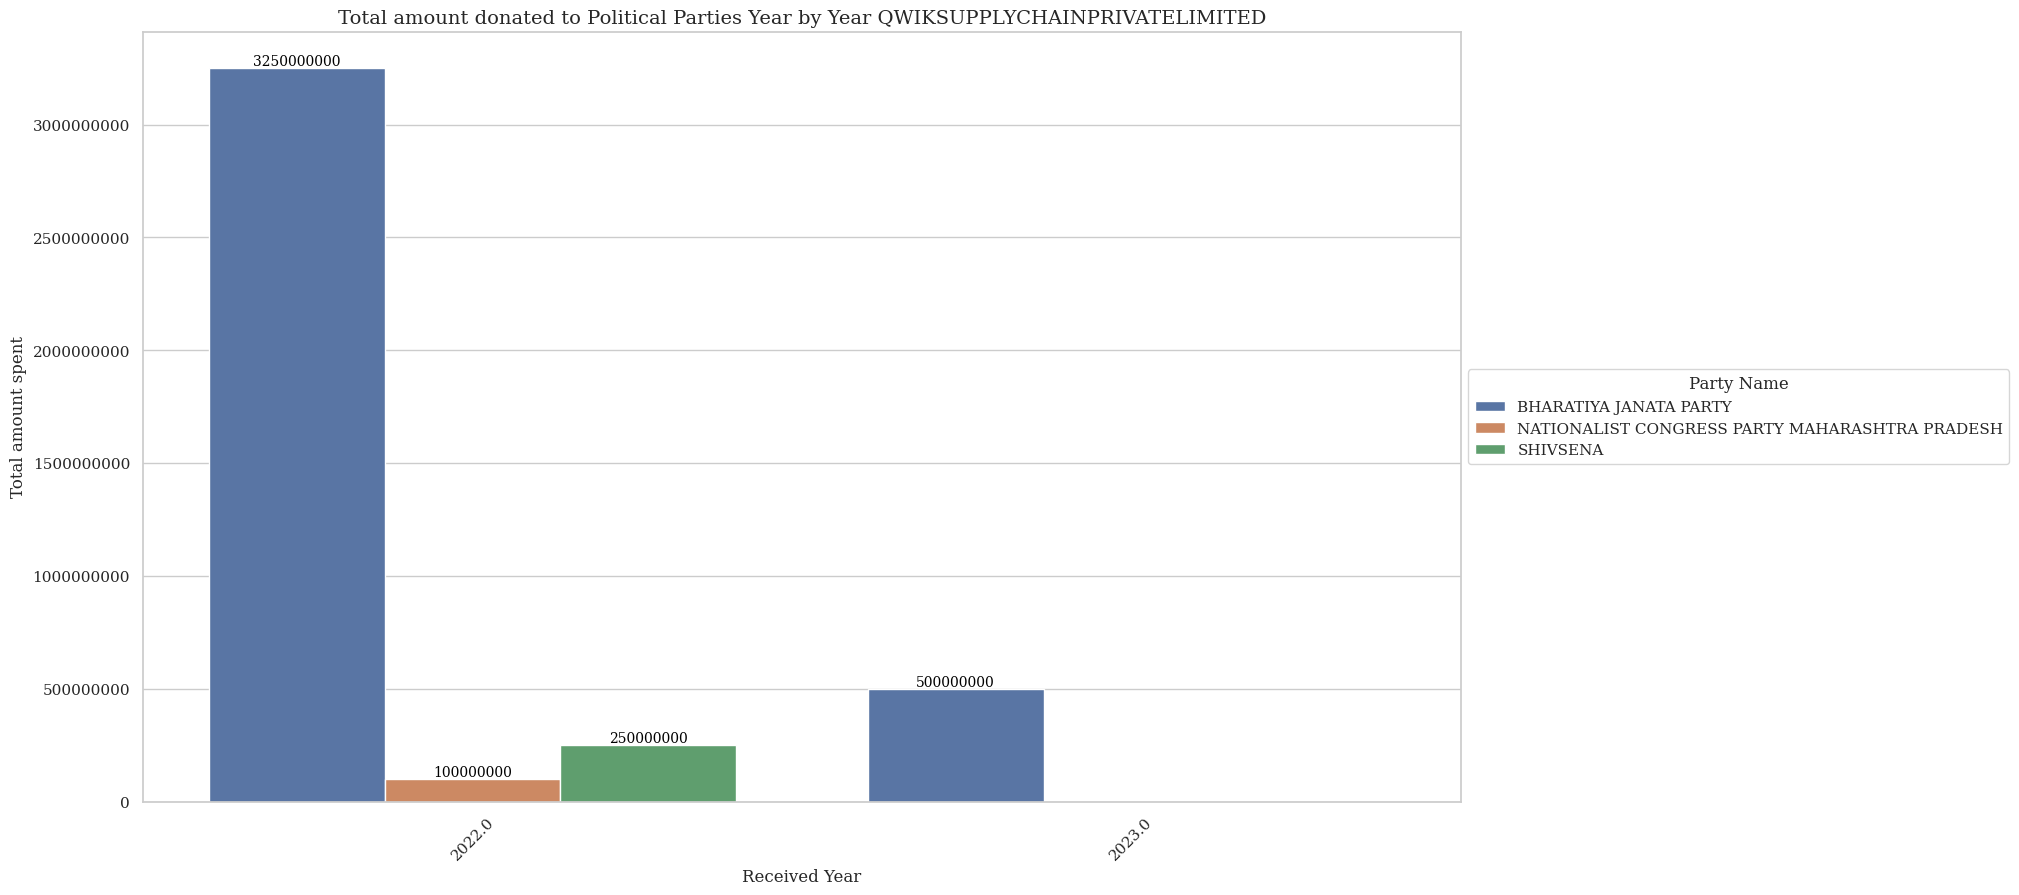

In [477]:
# Create the grouped bar plot
plt.figure(figsize=(17, 10))
ax = sns.barplot(data=company_amt_agg_partyname, x='PurchaserYear', y='Denominations_sum', hue='PartyName')

# Iterate over each container (group of bars)
for container in ax.containers:
    # Iterate over each bar in the container and add labels
    for bar in container:
        # Get the height of the bar
        height = bar.get_height()
        # Add the value label to the bar
        ax.annotate(f'{height:.0f}', 
                    (bar.get_x() + bar.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent', fontsize=12)
plt.title(f'Total amount donated to Political Parties Year by Year {company_name}', fontsize=14)

# Rotate y-axis labels by -45 degrees for better readability
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Move legend to the right and outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Party Name')

# Show the plot
plt.show()

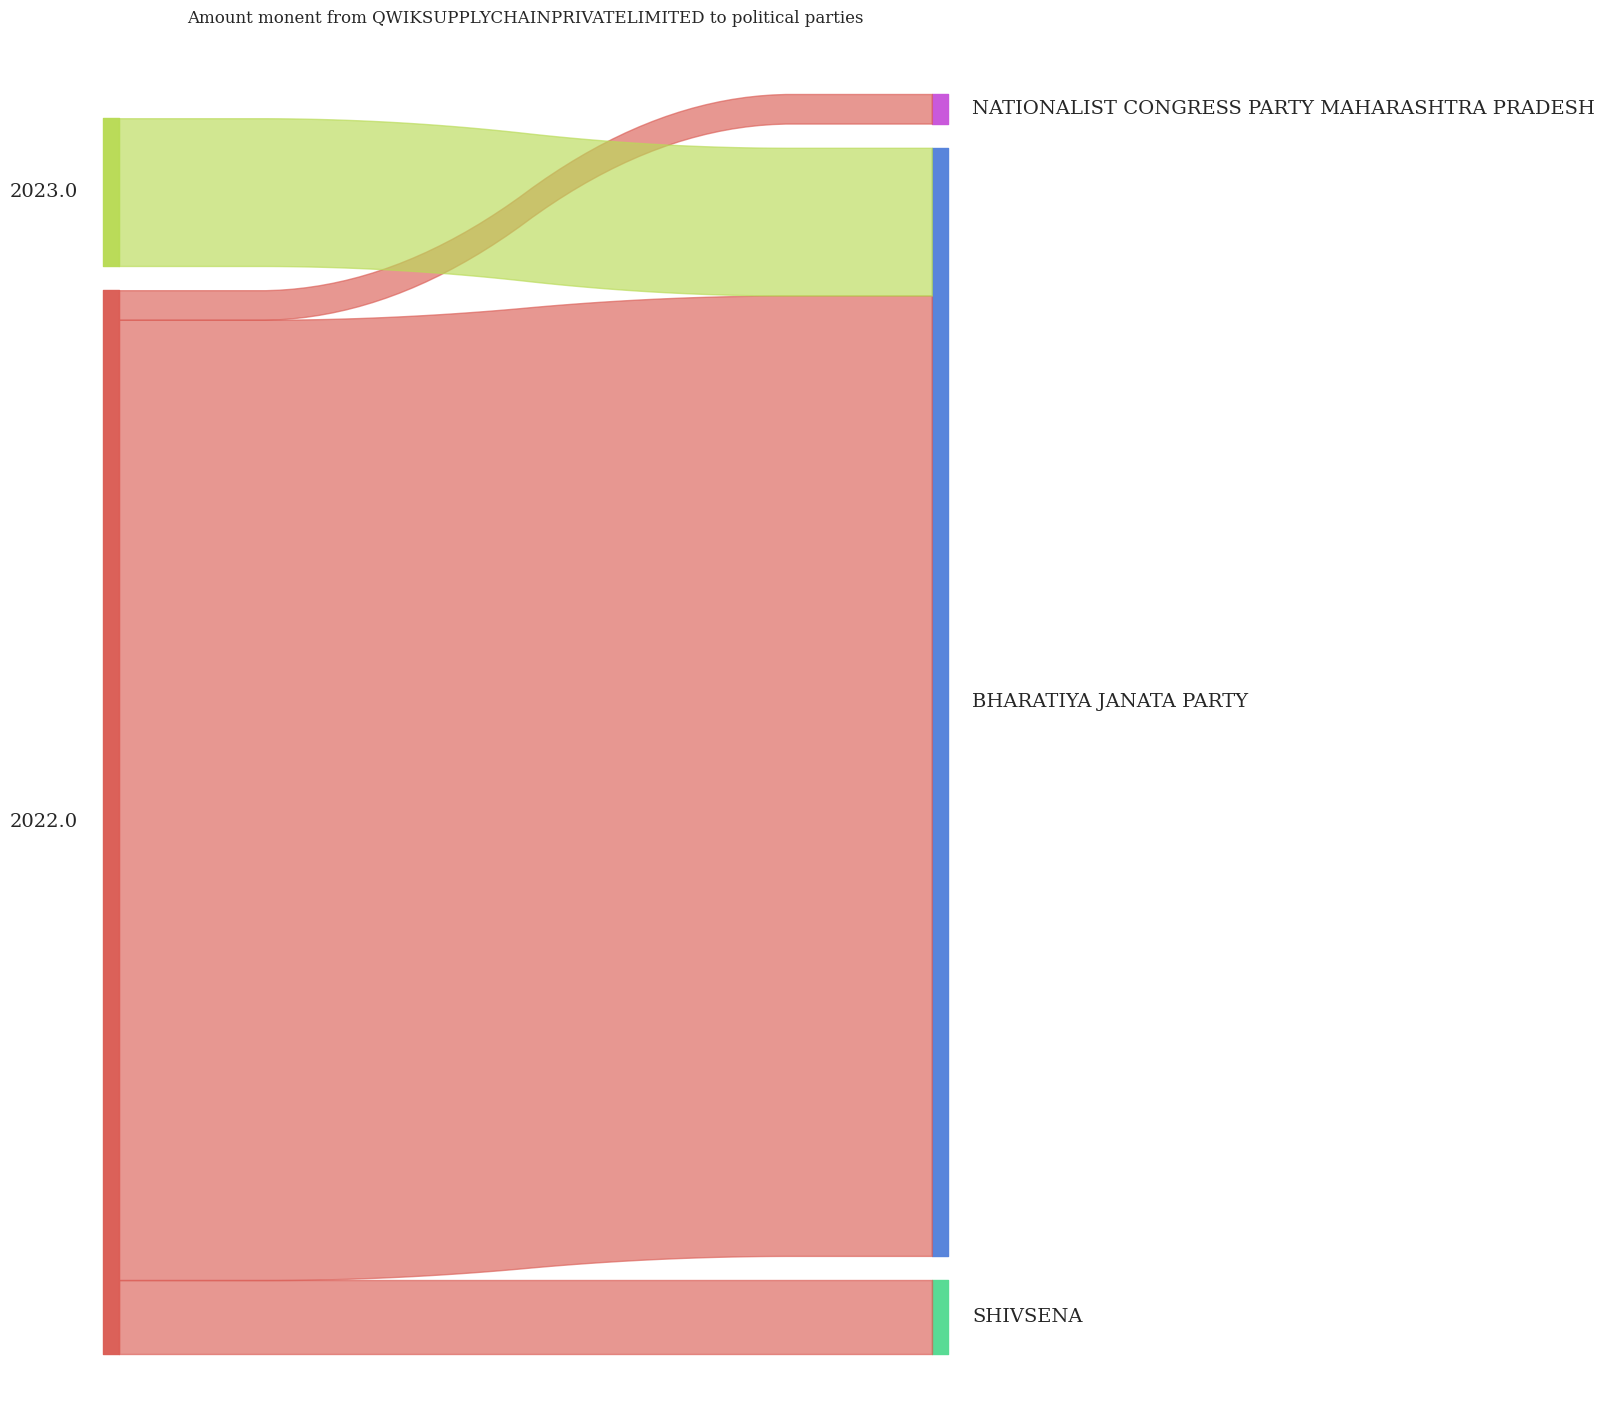

In [480]:
# Sankey chart from matplotlib
sankey(
    left        = company_name_data['PurchaserYear'],
    right       = company_name_data['PartyName'],
    leftWeight  = company_name_data['Denomination'],
    rightWeight = company_name_data['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

- QWIKSUPPLY CHAIN PRIVATELIMITED sponsored the most of their bonds to BHARTIYA JANTA PARTY in the year of 2022.

### HALDIA ENERGY LIMITED

In [481]:
company_name =  'HALDIA ENERGY LIMITED'
company_name_data = filtering[filtering['Purchaser'] == company_name] 
company_name_data

Urn JournalDate PurchaseDate ExpiryDate  \
110    1.202200e+18  2022-01-05   2022-01-05 2022-01-19   
112    1.202200e+18  2022-01-05   2022-01-05 2022-01-19   
114    1.202200e+18  2022-01-05   2022-01-05 2022-01-19   
116    1.202200e+18  2022-01-05   2022-01-05 2022-01-19   
118    1.202200e+18  2022-01-05   2022-01-05 2022-01-19   
...             ...         ...          ...        ...   
15575  1.201910e+18  2019-05-07   2019-05-07 2019-05-21   
15576  1.201910e+18  2019-05-07   2019-05-07 2019-05-21   
15577  1.201910e+18  2019-05-07   2019-05-07 2019-05-21   
15578  1.201910e+18  2019-05-07   2019-05-07 2019-05-21   
15579  1.201910e+18  2019-05-07   2019-05-07 2019-05-21   

                   Purchaser Prefix  BondNumber  IssueBranchCode  IssueTeller  \
110    HALDIA ENERGY LIMITED     OC     10111.0              1.0    6405134.0   
112    HALDIA ENERGY LIMITED     OC     10113.0              1.0    6405134.0   
114    HALDIA ENERGY LIMITED     OC     10115.0              1.0    6405134.0   
116    HALDIA ENERGY LIMITED     OC     10117.0              1.0    6405134.0   
118    HALDIA ENERGY LIMITED     OC     10119.0              1.0    6405134.0   
...                      ...    ...         ...              ...          ...   
15575  HALDIA ENERGY LIMITED     TL     11518.0              1.0    5899230.0   
15576  HALDIA ENERGY LIMITED     TL     11519.0              1.0    5899230.0   
15577  HALDIA ENERGY LIMITED     TL     11520.0              1.0    5899230.0   
15578  HALDIA ENERGY LIMITED     TL     11521.0              1.0    5899230.0   
15579  HALDIA ENERGY LIMITED     TL     11522.0              1.0    5899230.0   

                             IssueState  ...  DateEncashment  \
110    West Bengal and Andaman& Nicobar  ...      2022-01-13   
112    West Bengal and Andaman& Nicobar  ...      2022-01-13   
114    West Bengal and Andaman& Nicobar  ...      2022-01-13   
116    West Bengal and Andaman& Nicobar  ...      2022-01-13   
118    West Bengal and Andaman& Nicobar  ...      2022-01-13   
...                                 ...  ...             ...   
15575  West Bengal and Andaman& Nicobar  ...      2019-05-10   
15576  West Bengal and Andaman& Nicobar  ...      2019-05-10   
15577  West Bengal and Andaman& Nicobar  ...      2019-05-10   
15578  West Bengal and Andaman& Nicobar  ...      2019-05-10   
15579  West Bengal and Andaman& Nicobar  ...      2019-05-10   

                          PartyName   AccountNum  PayBranchCode  PayTeller  \
110    ALL INDIA TRINAMOOL CONGRESS  *******0688            1.0  3490777.0   
112    ALL INDIA TRINAMOOL CONGRESS  *******0688            1.0  3490777.0   
114    ALL INDIA TRINAMOOL CONGRESS  *******0688            1.0  3490777.0   
116    ALL INDIA TRINAMOOL CONGRESS  *******0688            1.0  3490777.0   
118    ALL INDIA TRINAMOOL CONGRESS  *******0688            1.0  3490777.0   
...                             ...          ...            ...        ...   
15575        BHARATIYA JANATA PARTY  *******8244          691.0  4567455.0   
15576        BHARATIYA JANATA PARTY  *******8244          691.0  4567455.0   
15577        BHARATIYA JANATA PARTY  *******8244          691.0  4567455.0   
15578        BHARATIYA JANATA PARTY  *******8244          691.0  4567455.0   
15579        BHARATIYA JANATA PARTY  *******8244          691.0  4567455.0   

      encashedyear                     EncashedState  EncashedBranchCode  \
110         2022.0  West Bengal and Andaman& Nicobar                 1.0   
112         2022.0  West Bengal and Andaman& Nicobar                 1.0   
114         2022.0  West Bengal and Andaman& Nicobar                 1.0   
116         2022.0  West Bengal and Andaman& Nicobar                 1.0   
118         2022.0  West Bengal and Andaman& Nicobar                 1.0   
...            ...                               ...                 ...   
15575       2019.0                             Delhi               691.0   
15576       2019.0  

In [483]:
company_amt_agg = company_name_data.groupby('PurchaserYear')['Denomination'].agg(
    Denominations_sum=('sum'),
    Denominations_count=('count')
).reset_index()
company_amt_agg

PurchaserYear  Denominations_sum  Denominations_count
0         2019.0       1.600000e+08                   34
1         2020.0       2.100000e+08                   21
2         2021.0       1.050000e+09                  105
3         2022.0       8.500000e+08                   85
4         2023.0       1.150000e+09                  115
5         2024.0       3.500000e+08                   35

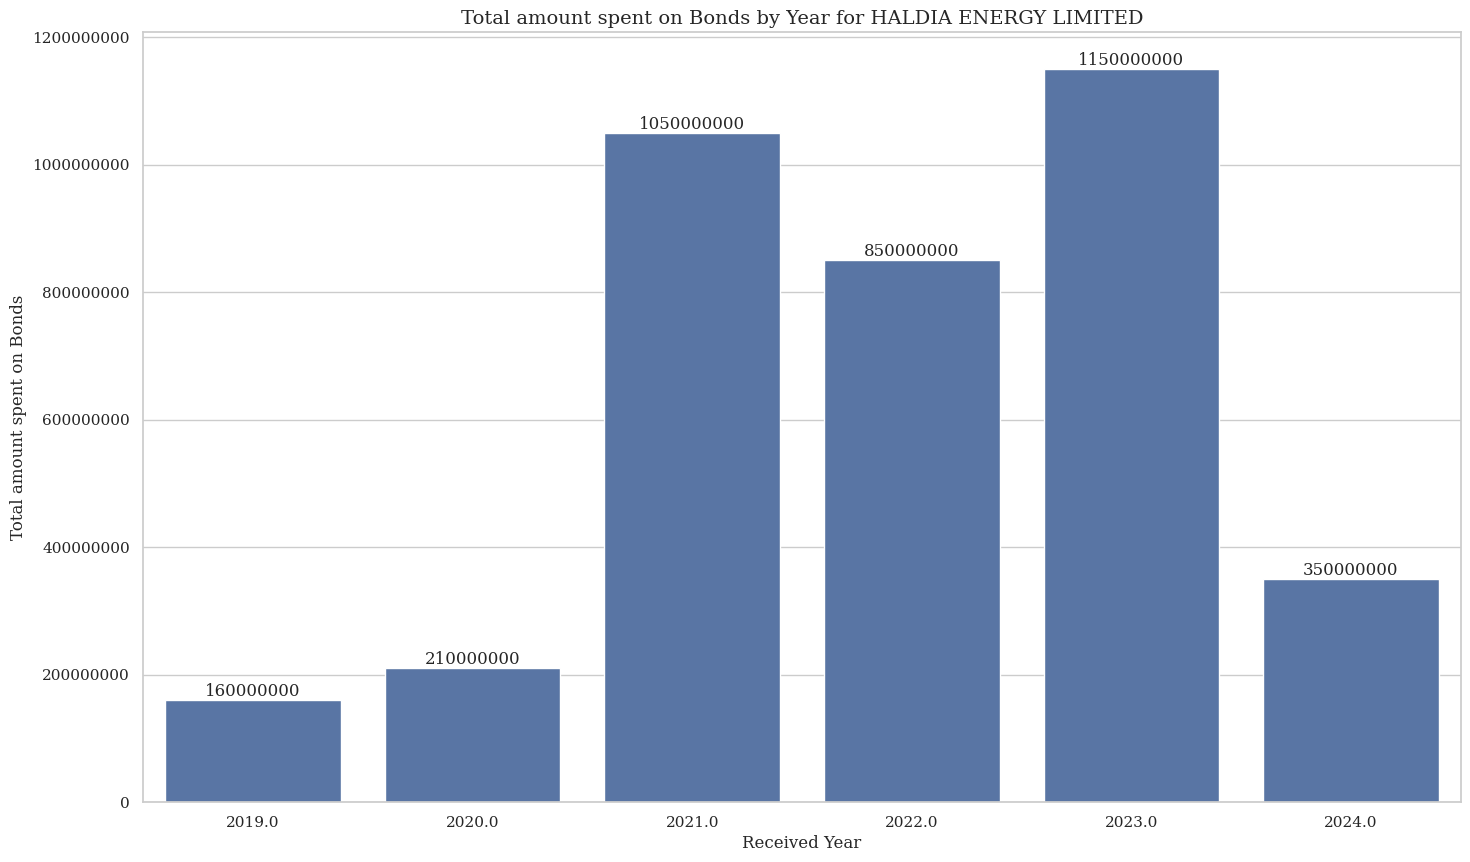

In [485]:
# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_amt_agg ,x='PurchaserYear', y='Denominations_sum')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total amount spent on Bonds by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

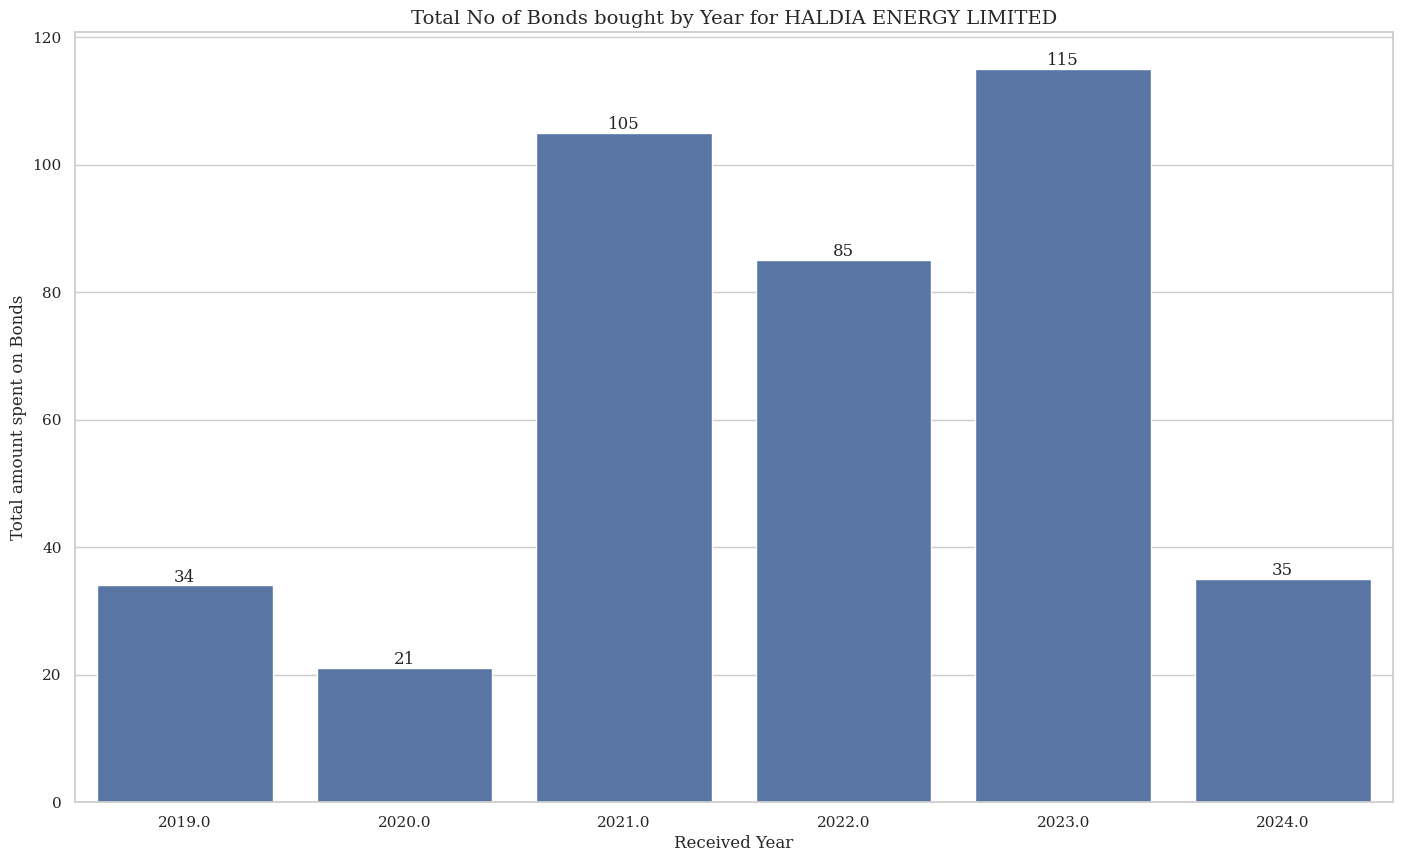

In [486]:
# Create the count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=company_amt_agg, x='PurchaserYear', y='Denominations_count')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent on Bonds', fontsize=12)
plt.title(f'Total No of Bonds bought by Year for {company_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [487]:
# Group by 'Year' and 'PartyName', and aggregate 'Denomination' using custom names for the aggregated columns
company_amt_agg_partyname = company_name_data.groupby(['PurchaserYear', 'PartyName']).agg(
    Denominations_sum=('Denomination', 'sum'),
    Denominations_count=('Denomination', 'count')
).reset_index()

company_amt_agg_partyname

PurchaserYear                                PartyName  Denominations_sum  \
0         2019.0                   BHARATIYA JANATA PARTY        160000000.0   
1         2020.0             ALL INDIA TRINAMOOL CONGRESS        210000000.0   
2         2021.0             ALL INDIA TRINAMOOL CONGRESS        550000000.0   
3         2021.0                   BHARATIYA JANATA PARTY        350000000.0   
4         2021.0  PRESIDENT, ALL INDIA CONGRESS COMMITTEE        150000000.0   
5         2022.0             ALL INDIA TRINAMOOL CONGRESS        750000000.0   
6         2022.0                   BHARATIYA JANATA PARTY        100000000.0   
7         2023.0             ALL INDIA TRINAMOOL CONGRESS        950000000.0   
8         2023.0                   BHARATIYA JANATA PARTY        200000000.0   
9         2024.0             ALL INDIA TRINAMOOL CONGRESS        350000000.0   

   Denominations_count  
0                   34  
1                   21  
2                   55  
3                   35  
4                   15  
5                   75  
6                   10  
7                   95  
8                   20  
9                   35

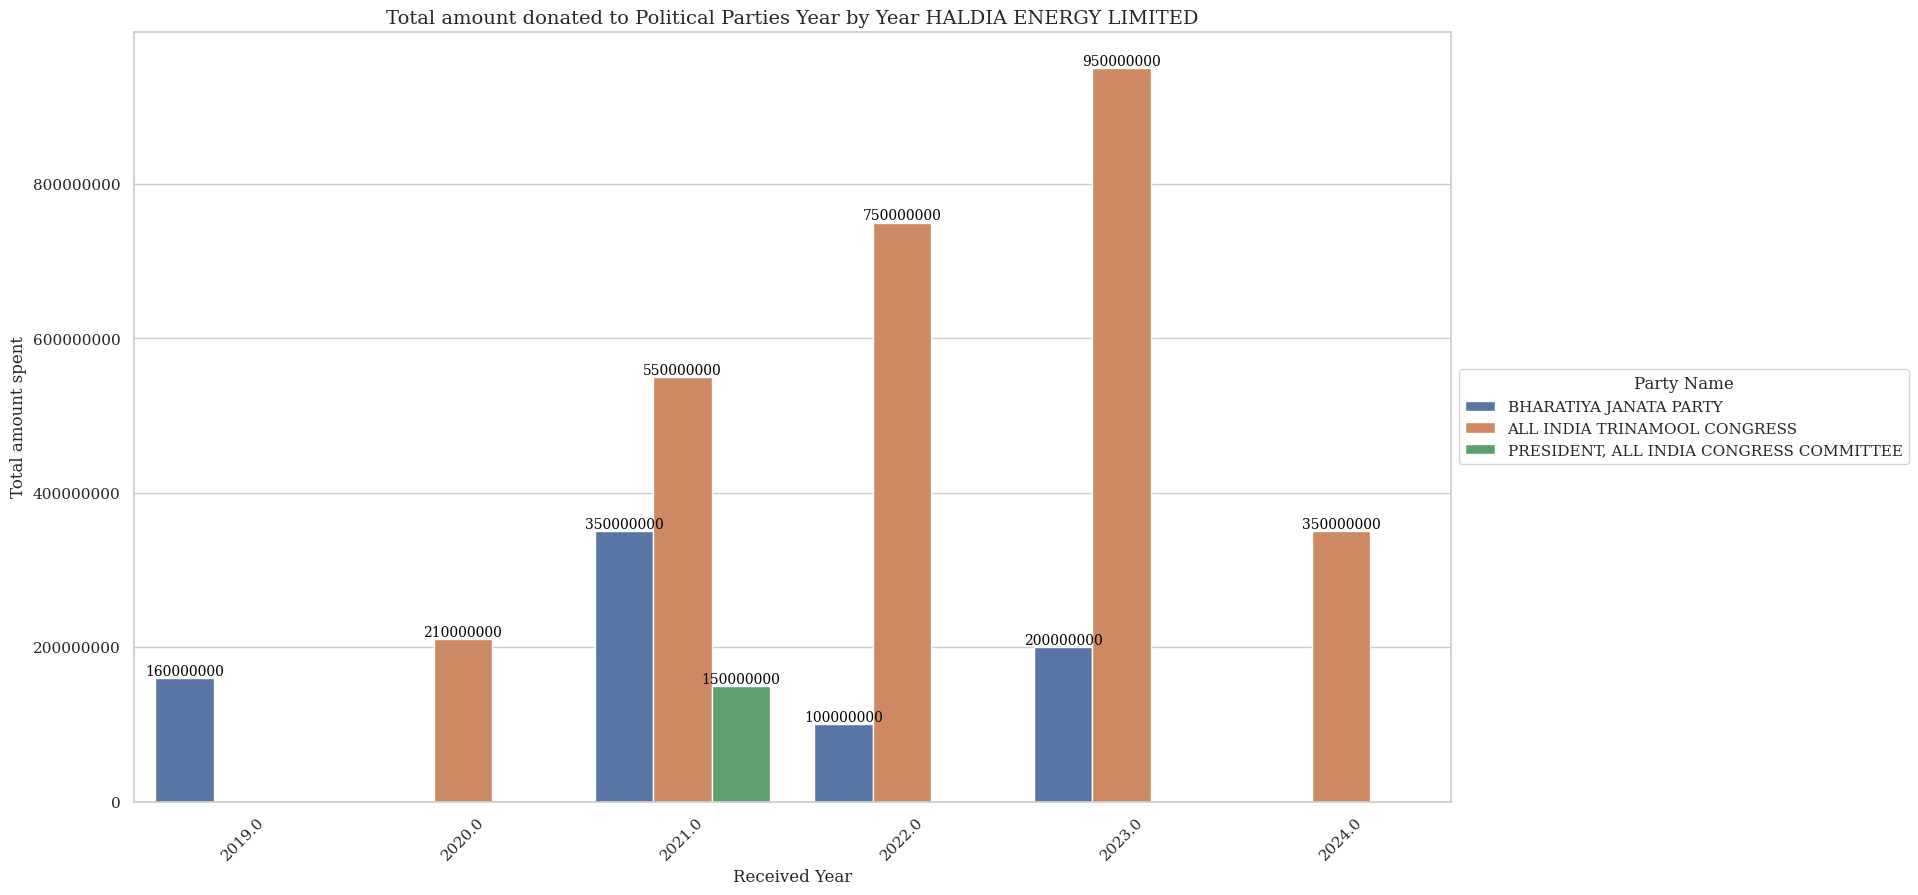

In [488]:
# Create the grouped bar plot
plt.figure(figsize=(17, 10))
ax = sns.barplot(data=company_amt_agg_partyname, x='PurchaserYear', y='Denominations_sum', hue='PartyName')

# Iterate over each container (group of bars)
for container in ax.containers:
    # Iterate over each bar in the container and add labels
    for bar in container:
        # Get the height of the bar
        height = bar.get_height()
        # Add the value label to the bar
        ax.annotate(f'{height:.0f}', 
                    (bar.get_x() + bar.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total amount spent', fontsize=12)
plt.title(f'Total amount donated to Political Parties Year by Year {company_name}', fontsize=14)

# Rotate y-axis labels by -45 degrees for better readability
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# Move legend to the right and outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Party Name')

# Show the plot
plt.show()

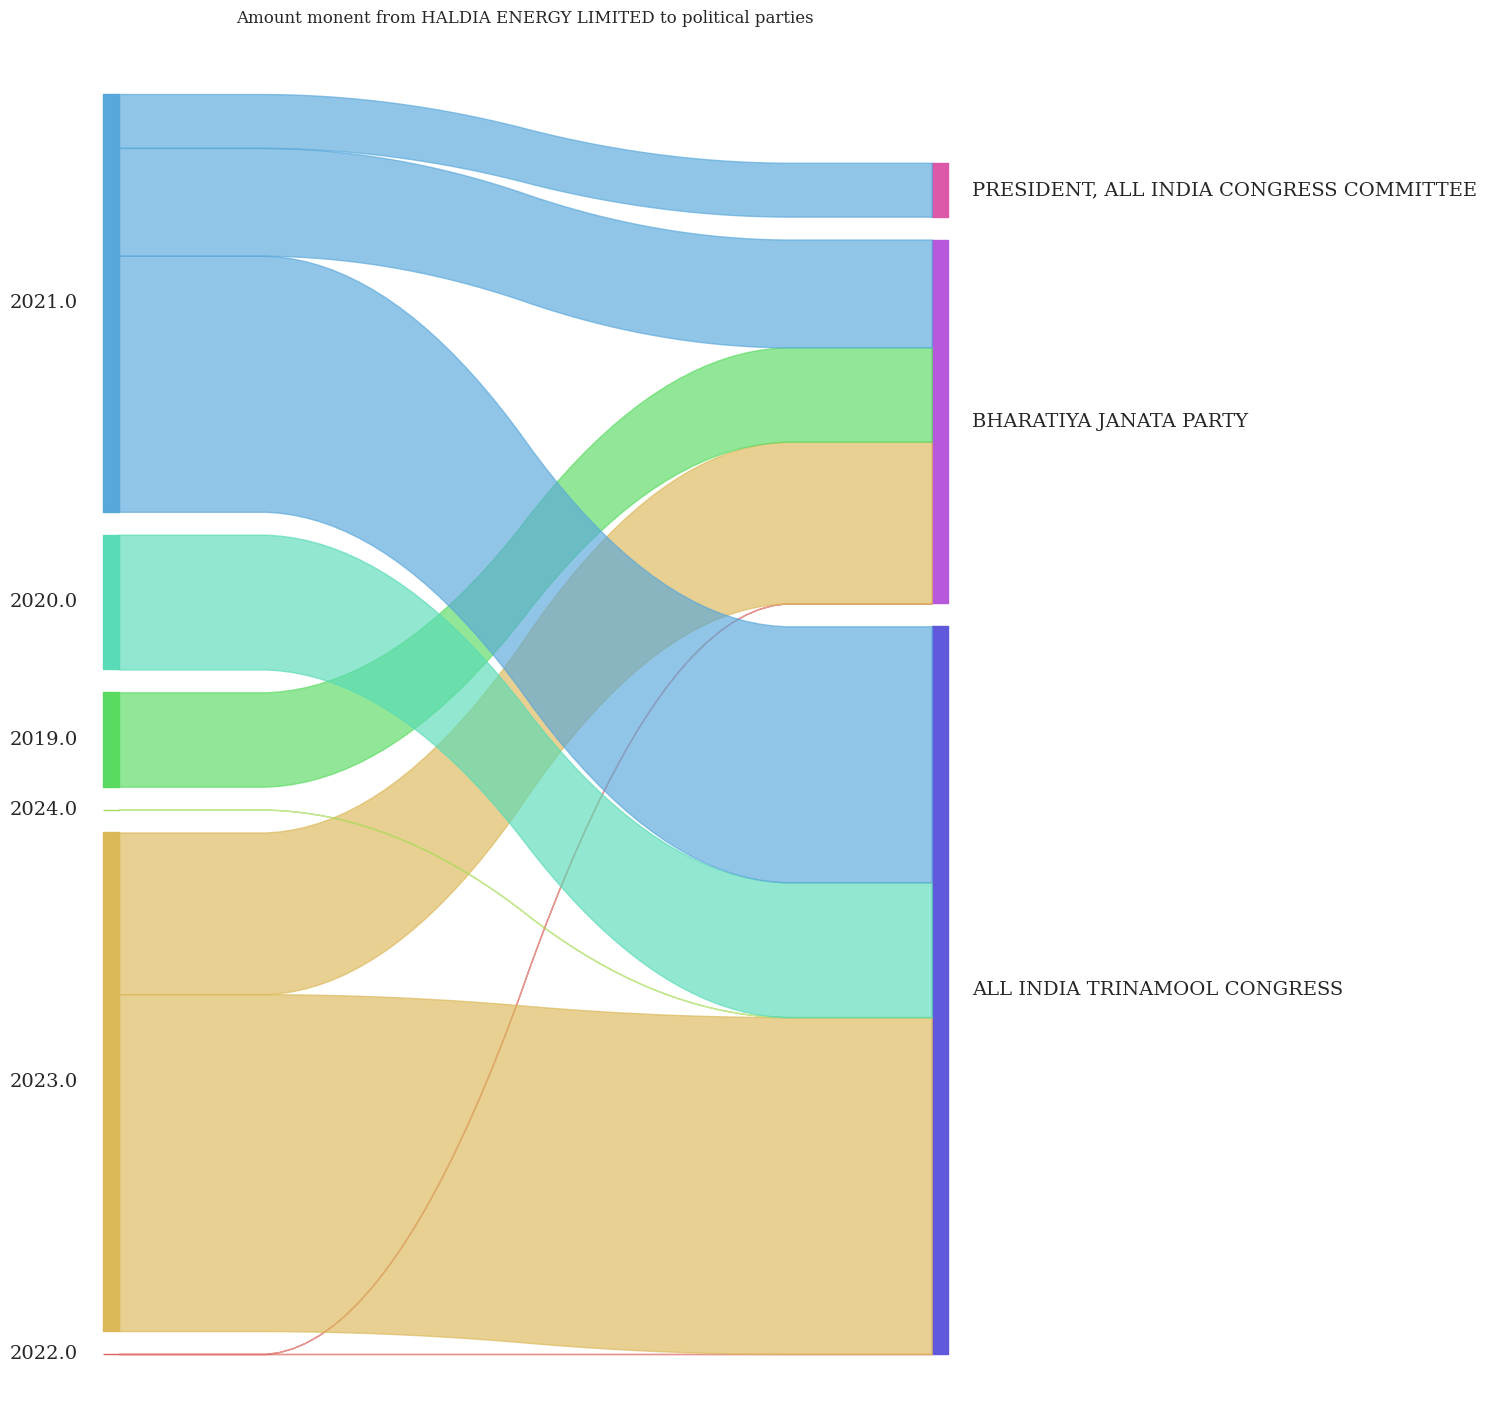

In [489]:
# Sankey chart from matplotlib
sankey(
    left        = company_name_data['PurchaserYear'],
    right       = company_name_data['PartyName'],
    leftWeight  = company_name_data['Denomination'],
    rightWeight = company_name_data['Denomination']
)
plt.gcf().set_size_inches((12,18))
plt.title(f'Amount monent from {company_name} to political parties') 
plt.show()

- HALDIA ENERGY LIMITED sponsored their electoral bonds to ALL INDIA TRINAMOOL CONGRESS  and secondly they sponsored to BHARATIYA JANATA PARTY.


### ANALYSIS ON TOP FIVE PARTYNAMES

In [494]:
common_recipient_data.columns

Index(['Sno', 'DateEncashment', 'PartyName', 'AccountNum', 'Prefix',
       'BondNumber', 'Denominations', 'PayBranchCode', 'PayTeller',
       'encashedyear', 'State', 'Branch code', 'Branch City', 'Unique_key'],
      dtype='object')

In [496]:
political_funds = common_recipient_data[['DateEncashment','PartyName','Denominations']]
# Create a new column 'ReceivedYear' based on the year component of 'DateEncashment'
political_funds['ReceivedYear'] = political_funds['DateEncashment'].dt.year
political_funds = political_funds.groupby(['PartyName','ReceivedYear']).agg(
    min_Denominations=('Denominations', 'min'),
    max_Denominations=('Denominations', 'max'),
    sum_Denominations=('Denominations', 'sum'),
    count_Denominations=('Denominations', 'count')).reset_index()
political_funds = political_funds.sort_values('PartyName')
political_funds

PartyName  ReceivedYear  \
0                                     AAM AADMI PARTY          2019   
1                                     AAM AADMI PARTY          2020   
2                                     AAM AADMI PARTY          2021   
3                                     AAM AADMI PARTY          2022   
4                                     AAM AADMI PARTY          2023   
..                                                ...           ...   
78  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...          2019   
79  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...          2020   
80  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...          2021   
81  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...          2022   
83  YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...          2024   

    min_Denominations  max_Denominations  sum_Denominations  \
0             1000000           10000000           22000000   
1             1000000           10000000           33000000   
2              100000           10000000           18500000   
3              100000           10000000          479500000   
4              100000           10000000          101500000   
..                ...                ...                ...   
78             100000           10000000           82500000   
79           10000000           10000000          890000000   
80             100000           10000000          662500000   
81             100000           10000000          520000000   
83           10000000           10000000           30000000   

    count_Denominations  
0                     4  
1                     6  
2                    23  
3                   187  
4                    25  
..                  ...  
78                   24  
79                   89  
80                  109  
81                  124  
83                    3  

[84 rows x 6 columns]

In [497]:
political_party_list = list(political_funds['PartyName'].unique())
political_party_list

['AAM AADMI PARTY',
 'ADYAKSHA SAMAJVADI PARTY',
 'ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM',
 'ALL INDIA TRINAMOOL CONGRESS',
 'BHARAT RASHTRA SAMITHI',
 'BHARATIYA JANATA PARTY',
 'BIHAR PRADESH JANTA DAL(UNITED)',
 'BIJU JANATA DAL',
 'DRAVIDA MUNNETRA KAZHAGAM (DMK)',
 'GOA FORWARD PARTY',
 'JAMMU AND KASHMIR NATIONAL CONFERENCE',
 'JANASENA PARTY',
 'JANATA DAL ( SECULAR )',
 'JHARKHAND MUKTI MORCHA',
 'MAHARASHTRAWADI GOMNTAK PARTY',
 'NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH',
 'PRESIDENT, ALL INDIA CONGRESS COMMITTEE',
 'RASHTRIYA JANTA DAL',
 'SHIROMANI AKALI DAL',
 'SHIVSENA',
 'SIKKIM DEMOCRATIC FRONT',
 'SIKKIM KRANTIKARI MORCHA',
 'TELUGU DESAM PARTY',
 'YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CONGRESS PARTY)']

In [499]:
sum_denominations = common_recipient_data.groupby('PartyName')['Denominations'].sum().sort_values(ascending=False).reset_index()
sum_denominations


PartyName  Denominations
0                              BHARATIYA JANATA PARTY    60605111000
1                        ALL INDIA TRINAMOOL CONGRESS    16095314000
2             PRESIDENT, ALL INDIA CONGRESS COMMITTEE    14218655000
3                              BHARAT RASHTRA SAMITHI    12147099000
4                                     BIJU JANATA DAL     7755000000
5                     DRAVIDA MUNNETRA KAZHAGAM (DMK)     6390000000
6   YSR CONGRESS PARTY (YUVAJANA SRAMIKA RYTHU CON...     3370000000
7                                  TELUGU DESAM PARTY     2188800000
8                                            SHIVSENA     1593814000
9                                 RASHTRIYA JANTA DAL      735000000
10                                    AAM AADMI PARTY      654500000
11                             JANATA DAL ( SECULAR )      435000000
12                           SIKKIM KRANTIKARI MORCHA      365000000
13     NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH      310000000
14                                     JANASENA PARTY      210000000
15                           ADYAKSHA SAMAJVADI PARTY      140500000
16                    BIHAR PRADESH JANTA DAL(UNITED)      140000000
17                             JHARKHAND MUKTI MORCHA      135000000
18                                SHIROMANI AKALI DAL       72600000
19           ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       60500000
20                            SIKKIM DEMOCRATIC FRONT       55000000
21                      MAHARASHTRAWADI GOMNTAK PARTY        5500000
22              JAMMU AND KASHMIR NATIONAL CONFERENCE        5000000
23                                  GOA FORWARD PARTY        3500000

### BHARATIYA JANATA PARTY

In [502]:
party_name =  'BHARATIYA JANATA PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

filtered_df

PartyName  ReceivedYear  min_Denominations  \
23  BHARATIYA JANATA PARTY          2024            1000000   
22  BHARATIYA JANATA PARTY          2023               1000   
21  BHARATIYA JANATA PARTY          2022               1000   
20  BHARATIYA JANATA PARTY          2021              10000   
19  BHARATIYA JANATA PARTY          2020             100000   
18  BHARATIYA JANATA PARTY          2019               1000   

    max_Denominations  sum_Denominations  count_Denominations  
23           10000000         2020000000                  220  
22           10000000        16763261000                 2111  
21           10000000        17635499000                 2177  
20           10000000         3729950000                  512  
19           10000000          738900000                   99  
18           10000000        19717501000                 3514

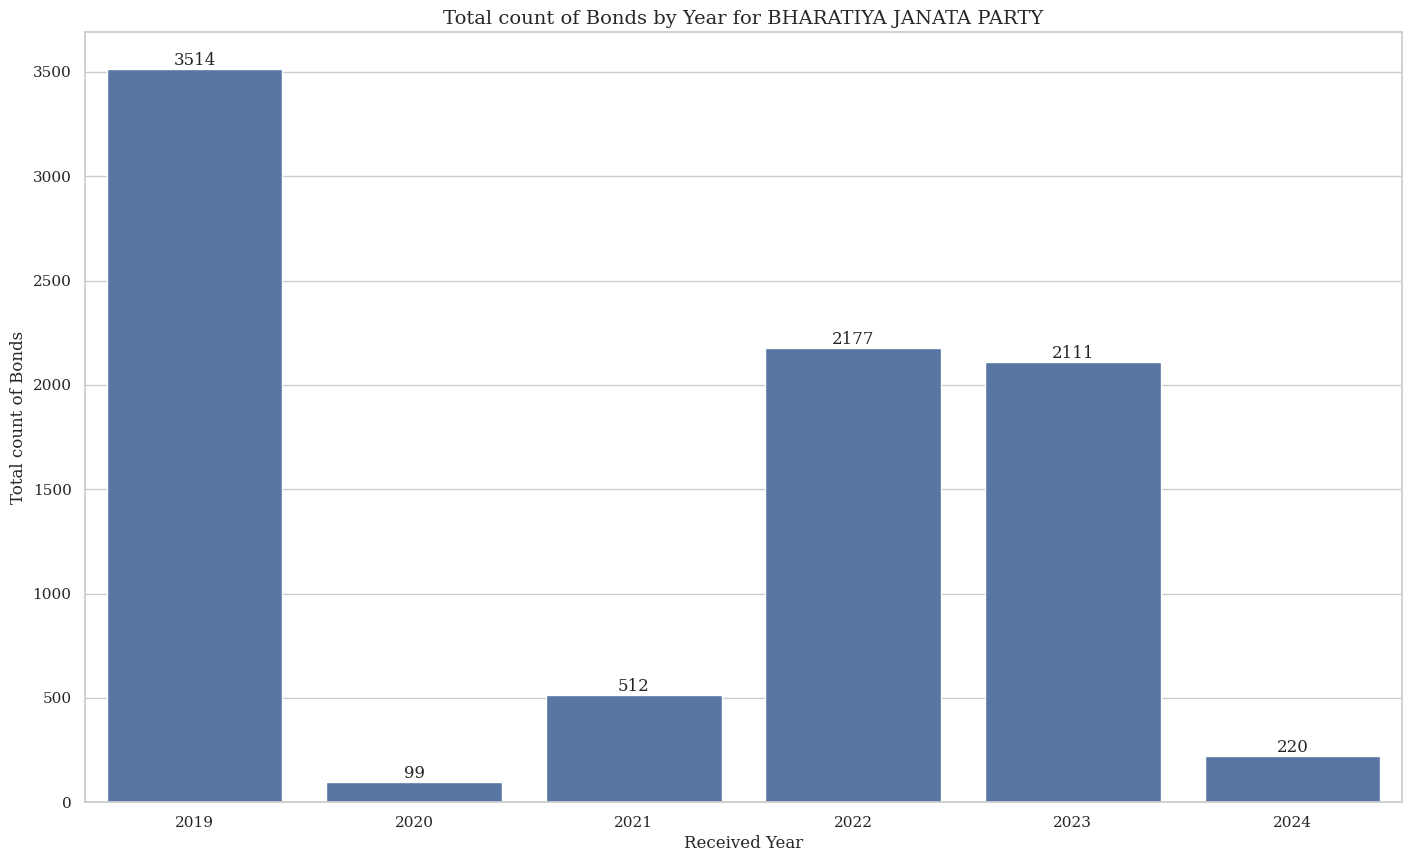

In [500]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'BHARATIYA JANATA PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

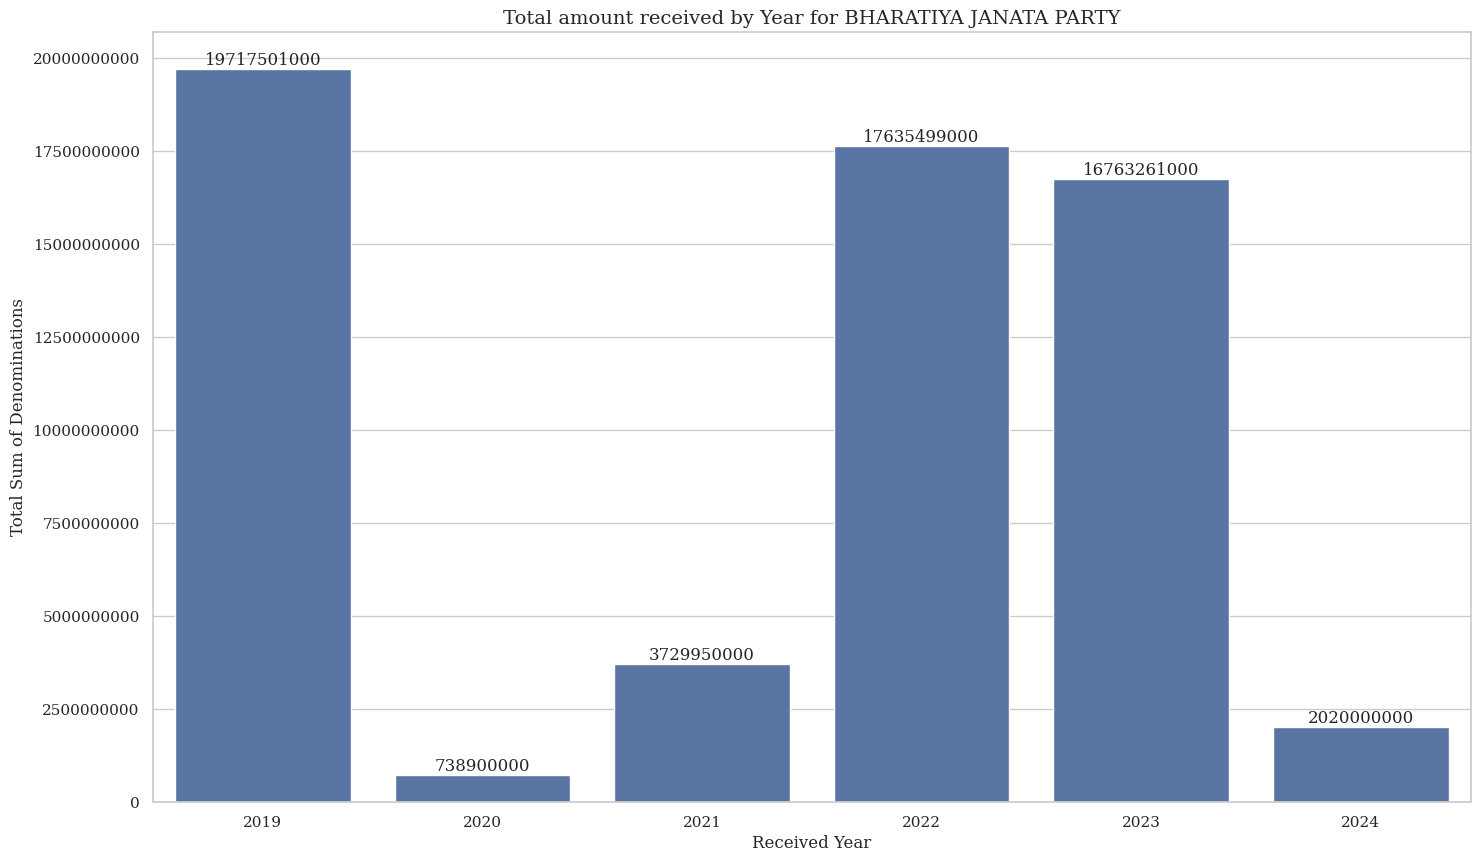

In [501]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'BHARATIYA JANATA PARTY'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

### ALL INDIA TRINAMOOL CONGRESS

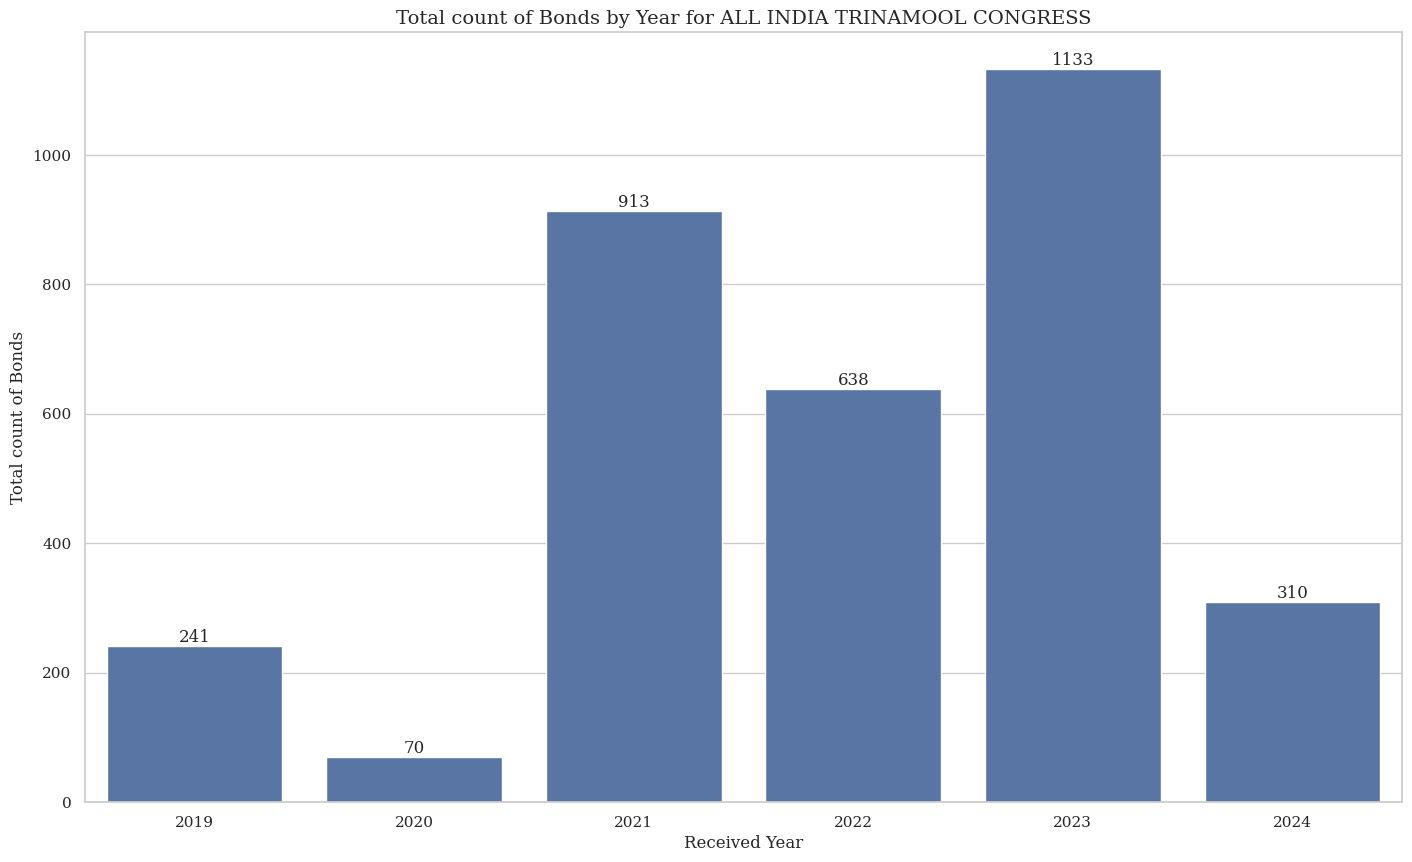

In [506]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'ALL INDIA TRINAMOOL CONGRESS'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='count_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total count of Bonds', fontsize=12)
plt.title(f'Total count of Bonds by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

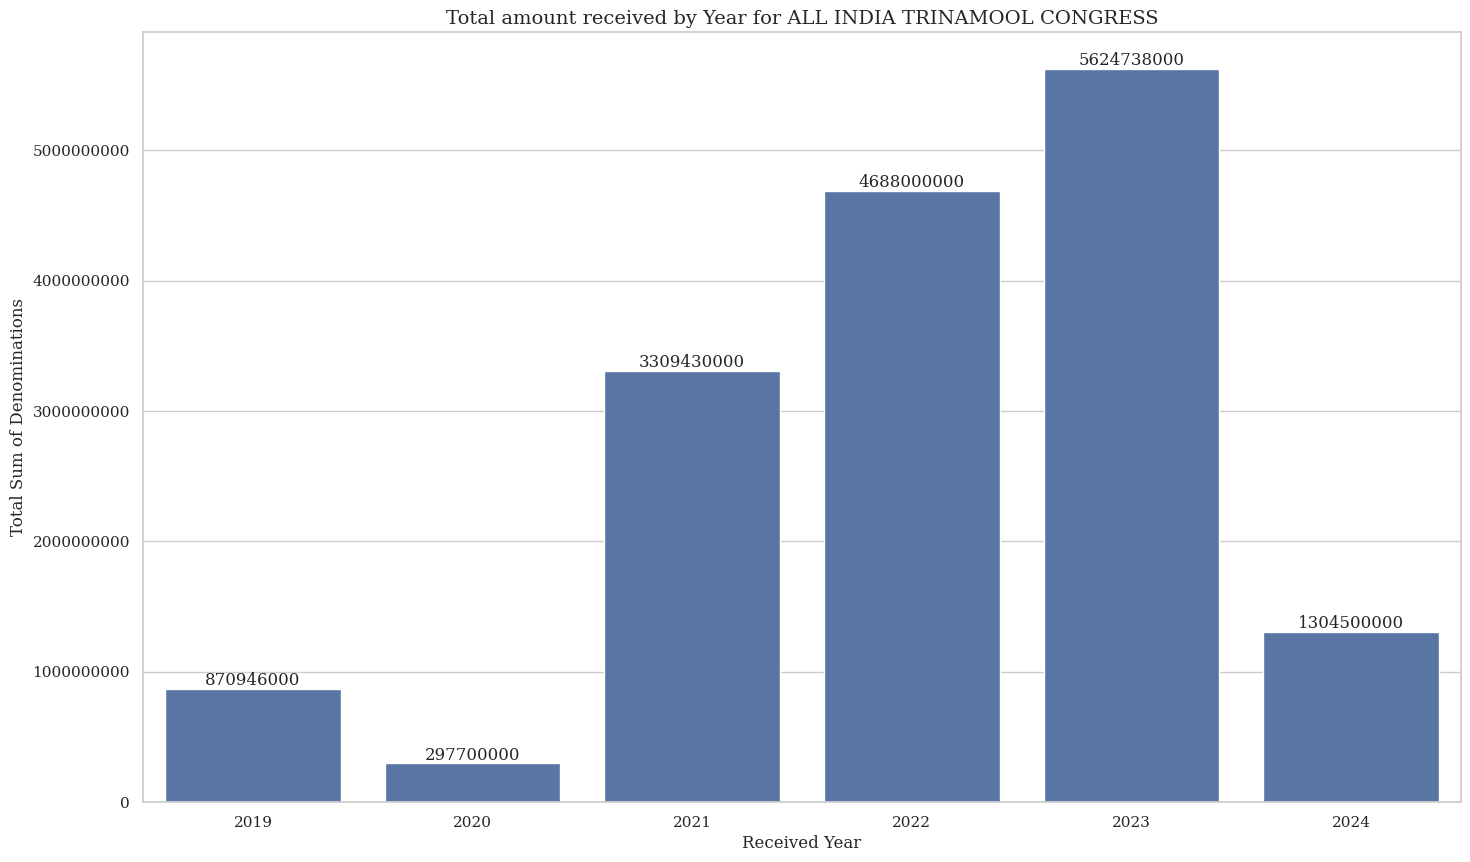

In [507]:
# Filter DataFrame for PartyName 'AAM AADMI PARTY'
party_name =  'ALL INDIA TRINAMOOL CONGRESS'

filtered_df = political_funds[political_funds['PartyName'] == party_name]

# Create the horizontal count plot for the top 20 purchasers
plt.figure(figsize=(17, 10))  # Set the figure size (height, width) in inches for a horizontal plot
ax = sns.barplot(data=filtered_df, x='ReceivedYear', y='sum_Denominations')  # Use y='Purchaser' for horizontal plot
ax.bar_label(ax.containers[0],labels=[f'{x.get_height():.0f}' for x in ax.containers[0]]) 
plt.xlabel('Received Year', fontsize=12)
plt.ylabel('Total Sum of Denominations', fontsize=12)
plt.title(f'Total amount received by Year for {party_name}', fontsize=14)
# Rotate y-axis labels by -45 degrees for better readability
plt.yticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.show()

In [508]:
filtered_df

PartyName  ReceivedYear  min_Denominations  \
13  ALL INDIA TRINAMOOL CONGRESS          2024             100000   
12  ALL INDIA TRINAMOOL CONGRESS          2023               1000   
11  ALL INDIA TRINAMOOL CONGRESS          2022             100000   
10  ALL INDIA TRINAMOOL CONGRESS          2021              10000   
9   ALL INDIA TRINAMOOL CONGRESS          2020             100000   
8   ALL INDIA TRINAMOOL CONGRESS          2019               1000   

    max_Denominations  sum_Denominations  count_Denominations  
13           10000000         1304500000                  310  
12           10000000         5624738000                 1133  
11           10000000         4688000000                  638  
10           10000000         3309430000                  913  
9            10000000          297700000                   70  
8            10000000          870946000                  241